## Data Fundamentals (H)
# Week 3: Scientific visualisation
## Graphs, charts and plots

------
 ##### DF(H) - University of Glasgow - John H. Williamson - 2020/2021

LaTeX commands

$$\newcommand{\vec}[1]<p><strong>SyntaxError</strong>: unexpected character after line continuation character (<ipython-input-3-470fb1740f13>, line 1)</p>
 
\newcommand{\real}{\mathbb{R}}
\DeclareMathOperator*{\argmin}{arg\,min}
\vec{x}
\real
$$

In [ ]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

# Summary
By the end of this unit you should know:
* what the grammar of graphics is: dataset, stat, scale, mapping, coord, geom, guide, layer, facet, figure, caption
* how elements of the grammar of graphics appear in a visualisation
* how to produce a correct, simple, scientific chart from numerical data
* the basic operation of `matplotlib`
* basic plot types: line plots, bar charts, scatter plots
* different ways of representing data in 2D plots
* the use of stats to transform data, including binning, summarisation and smoothing
* linear, log and polar coordinate systems and their uses
* the use of point, line and area geoms to represent data and standard aesthetic mappings for them
* appropriate aesthetic mappings for colour information
* how to criticise scientific visualisations
* how to represent uncertainty accurately in a plot

## What you should be able to do
* Make graphs that are:
    * **Conceptually** correct: data is represented visually in a way that makes sense.
    * **Technically** correct: details of data representation are complete and accurate.
    * **Aesthetically** correct: data is represented a visually pleasing way.
* Have the **language** and **concepts** to discuss, criticise and improve visual representations.

<img src="imgs/playfair_nightingale.svg" width="100%" >

## What is visualisation?
Visualisation is the representation of data for human visual perception. Visualisation encodes abstract mathematical objects, like vectors of numbers, into a form that *humans* can draw meaning from. It encompasses everything from the most elementary bar chart to the most sophisticated volume renderings.

Visualisation serves several purposes:
* to build intuition about *relationships and structure* in data;
* to *summarise* large quantities of data;
* to help decision-makers make quick judgments on specific questions.

### *Scientific* visualisations
This course will focus on scientific visualisations; in particular visualising numerical data. The focus is on precision, clarity and accuracy in visualisation. While visual design is important, the focus here is on the core principles of representing data clearly using simple, static graphs.

**The core of the lecture is: how should you render tables as pictures so that a reader can make judgements based upon them?**

----


#### The good, the bad and the ugly
<img src="imgs/visualisation_space.png">

*Image: A dimensional mapping of visualisations. Ugly->beautiful goes left to right; useless->informative goes bottom to top. Credits: top left: [Martin Grandjean](https://commons.wikimedia.org/wiki/File:Social_Network_Analysis_Visualization.png) CC-BY-SA 3.0 
bottom right: [Sheffno1gunner](https://commons.wikimedia.org/wiki/File:Opinion_Polling_Chart_for_the_2015_UK_General_Election.png) CC-BY-SA 3.0
bottom left: [unknown]
upper left: William Playfair, 1786(!)*

### Basic categories
We will focus on display of three basic categories:
* plots of **single 1D array** $\vec{x}$, like **histograms** (single columns)
* plots of **pairs of 1D arrays** $\vec{x}, \vec{y}$, like **scatterplots** (two columns)
* plots of single **2D arrays** $X$, like **contour plots** (whole tables)

These are all representations of datasets that can be represented as  **tables** of numbers. 

We'll discuss briefly some approaches for 3D data (*triplets of 1D arrays* $\vec{x}, \vec{y}, \vec{z}$ and 3D arrays), vector fields (pairs of 2D arrays), and higher dimensional data.

We will cover statistical transforms for visualisation and the appropriate representation of uncertainty in visualisations.



# Grammar of Graphics
The creation of scientific visualisations can be precisely specified in terms of a *graphical language*. This is a language which specifies how to turn data into images (construction) and how readers should interpret those images (intepretation). For the moment assume a **Dataset** is a table of numbers (e.g. a 2D NumPy array). Each column represents a different attribute; each row a collection of related attributes:

        year    price    margin
        -------------------------
        1990    0.01      0.005
        1991    0.018    -0.001
        1992    0.002    -0.1
        1993    0.02      0.005

There are various different ways of describing the graphical language used; the one described here follows the **Layered Grammar of Graphics** by Hadley Wickham (see the resources at the end). 


<img src="imgs/grammar.png" width="50%">

*Image: flowchart of the layered grammar of graphics. Gray text indicates **examples** for each of the elements. Note that one layer
may have several scales; one facet may have several layers; and one figure may have several facets. Everything above the dotted line is an abstract transformation of the dataset; everything below it is a visible feature of a graphical representation*


* **Stat**
A **stat** is a statistic computed from data which is then mapped onto visual features, with the intent of summarising the data compactly. For example, the mean and the standard deviation of a series of measurements would be **stats**. The binning of values in a histogram is another example of a **stat**.

* **Mapping**
A **mapping** represents a transformation of data attributes to visual values. It maps *selected attributes* (which includes **stats** or raw dataset values) to visual values using a **scale** to give units to the attribute.
    * **Scale** a scale specifies the transformation of the units in the dataset/stat to visual units. This might be from the Richter scale to x position, or from altitude to colour, or from condition number to point size. A scale typically specifies the **range** of values to be mapped.
    
    * **Guide**
    A **guide** is a visual reference which indicates the meaning of a mapping, including the scale and the attribute being mapped. This includes axis tick marks and labels, colour scales, and legends.
    
* **Geom**
A **geom** is the geometric representation of data after it has been mapped. Geoms include points (which may have size, colour, shape), lines (which may have colour, dash styles, thickness), and patches/polygons (which can have many attributes).

* **Coord**
A **coord** is a coordinate system, which connects mapped data onto points on the plane (or, in general, to higher-dimensional coordinates, like 3D positions). The spatial configuration of **geoms** and **guides** depends on the coordinate system. 

* **Layer** 
A **layer** of a plot is one set of geoms, with one mapping on one coordinate system. Multiple layers may be overlaid on a single coordinate system. For example, two different stats of the same dataset might be plotted on separate layers on the same coordinate system.

* **Facet**
A **facet** is a different view on the same dataset, on a separate coordinate system. For example, two conditions of an experiment might be plotted on two different facets. One facet might have several layers.

* **Figure**
A **figure** comprises a set of one or more **facets**
* **Caption** Every figure has a caption, which explains the visualisation to the reader.



# Anatomy of a figure

## Figure and caption
A **figure** is one or more facets that form a coherent visualisation of data. Many figures are single graphs (single facets), but some may include multiple facets. Every figure needs to have a clear **caption** which explains to the reader what they should see from the graph.

<img src="imgs/figure_caption.png">

*Image: the relationship between figure and a caption. **Every figure needs a clear caption.** Even this one.*

## The visual representation of plots: guides, geoms and coords

Good scientific plots have a well defined structure. Every plot should have proper use of **guides** to explain the **mapping** and **coordinate system**:

### Guides
* **Axes** which are labeled, with any applicable **units** shown. These are **guides** for the **coordinate system**.
    * **Ticks** indicating subdivisions of axes in labeled units for that axis.
* A **legend** explaining what markers and lines mean (if more than one present). These are **guides** which identifies different **layers** in the plot.
* A **title** explaining what the plot is

A plot might have:

* A **grid** to help the reader line up data with the axes (again, a **guide** for the **coordinate system**)
* A **annotations** to point out relevant features

### Geoms
To display data, plots have **geoms**, which are geometrical objects representing some element of the data to be plotted. These include:

* **Lines/curves** representing continuous functions, which have colours, thicknesses, and styles 
* **Markers** representing disconnected points, which have sizes, colours and styles
* **Patches** representing shapes with area (like bars in a bar chart), which can come in many forms





<img src="imgs/anatomy.png">

*Image: anatomy of a simple scientific graph, taken from the `matplotlib` documentation: http://matplotlib.org/examples/showcase/anatomy.html*

## matplotlib
We'll be using `matplotlib` for our examples. This is a sophisticated plotting package that integrates with `NumPy` and the scientific Python stacks. It is one of several options for plotting in Python, but is the standard for publication-quality figures; its features are similar to that offered by Matlab.

The specific details of `matplotlib` are less important than the general concepts of making good scientific visualisations. You will explore `matplotib` more thoroughly in the lab exercise for this unit. `Matplotlib` has many options and can produce a wide variety of plots, but we will be using a relatively small subset of available features.

In [1]:
import numpy as np

# these import matplotlib, and make it draw figures directly in the notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=180)



This is a quick but thorough example of `matplotlib` being used to plot some functions:

In [2]:
# a simple function, returns pulses with a shape determined by k
def pulse(x, k):
    return np.cos(x) * np.exp(np.cos(x) * k - k)

## generate an x value to be transformed
x = np.linspace(-np.pi, 5 * np.pi, 500)

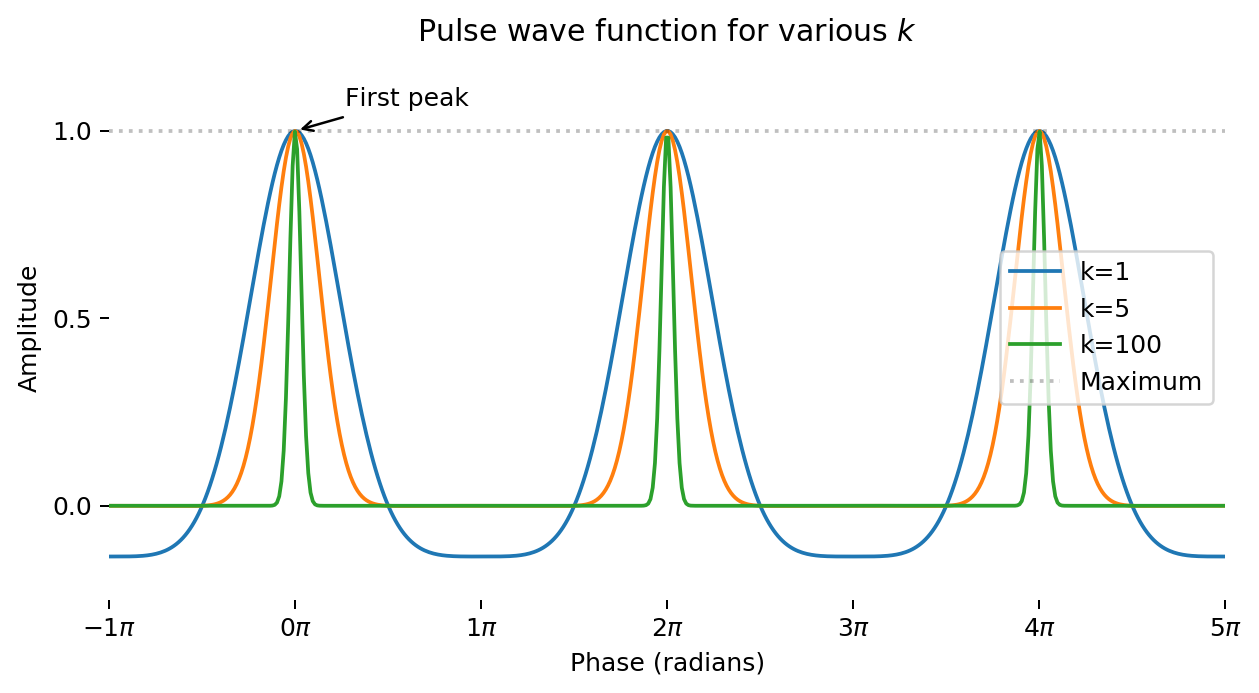

In [3]:
#### matplotlib plotting code
### This is relatively verbose, but each step is simple

fig = plt.figure()  # create a new figure

ax = fig.add_subplot(1, 1, 1)  # create a new subplot, returning a set of axes
# note: the call is formatted fig.add_subplot(rows, columns, index)
# which will create a subplot in a matrix of plots (of the given size)
# indexed by the index. The index increases column-wise, then row-wise, and starts from *1*
# for example, we could create a 3x2 array of plots, and select the middle-left plot
# using
# plt.add_subplot(3, 2, 3)
#    --------
#   | 1 | 2 |
#   | 3 | 4 |
#   | 5 | 6 |
#   ---------


# line plot of x against f(x, k) for fixed values of k
# each subsequent plot will be a new color
# all of the plots will be overlaid on the axis
# plot(x,y) is the basic line plotting command
ax.plot(x, pulse(x, 1), label='k=1')
ax.plot(x, pulse(x, 5), label='k=5')
ax.plot(x, pulse(x, 100), label='k=100')

# label the plot 
ax.set_xlabel("Phase (radians)")  # x-axis label
ax.set_ylabel("Amplitude")  # y-axis label
ax.set_title("Pulse wave function for various $k$")  # title of plot (appears above plot)

## set the limits of the plot
# (if this is omitted, sensible autoscaling will be applied)
ax.set_xlim(np.min(x), np.max(x))
ax.set_ylim(-0.25, 1.2)

# draw a dotted, semi-transparent horizontal line at the maximum possible value of the function
ax.axhline(1.0, color='k', linestyle=':', label="Maximum", alpha=0.25)

# draw an annotation directly on the plot
ax.annotate(
    "First peak",
    xy=(0, 1),
    xytext=(20, 10),
    textcoords='offset points',
    arrowprops={"arrowstyle": '->'})

ax.set_frame_on(False)
ax.set_xticks(np.arange(-1,6)*np.pi)
ax.set_xticklabels(["${i}\pi$".format(i=i) for i in np.arange(-1,6)])
ax.set_yticks([0.0, 0.5, 1.0])
# create a legend (key) for the plot, using the labels specified
# in the ax.plot() calls
ax.legend()

---

# Basic  2D plots

## Dependent and independent variables
Most *useful* plots only involve a small number of relations between variables. Often there are just two variables with a relation; one **independent** variable and one **dependent** variable, which depends on  the independent variable.

$$y = f(x),$$

where $x$ and $y$ are scalar variables. The purpose of the plot is to visually describe the function $f$.  The input to these plots are a *pair* of 1D vectors $\vec{x}, \vec{y}$. 


These are plotted with the **independent variable** on the x-axis (the variable that "causes" the relationship) and the **dependent value** on the y-axis (the "effect" of the relationship).  For example, if you are doing an experiment and fixing some value to various test values (e.g. the temperature of a solution) and measuring another (e.g. the pH of the solution), the variable being fixed is the independent variable and goes on the $x$ axis, and the variable being measured is the dependent variable and goes on the $y$ axis.

In some cases, there is no clear division between an the independent and dependent variable, and the order doesn't matter. This is unusual, however, and you should be careful to get the ordering right.

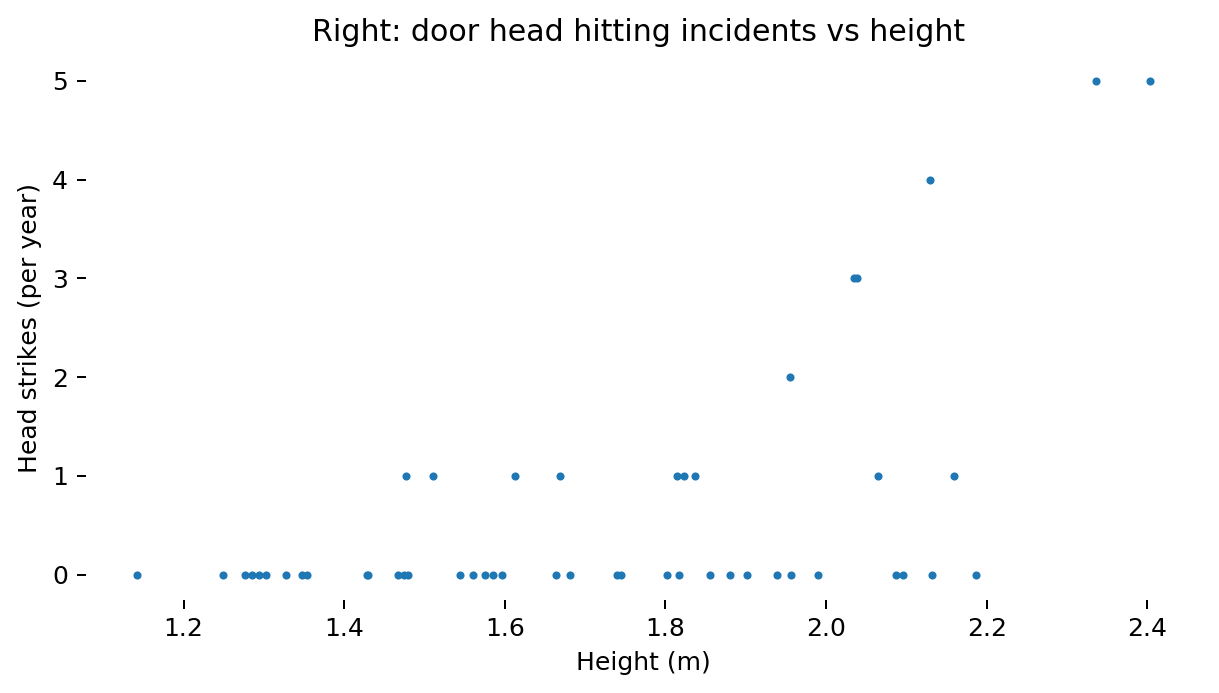

In [4]:
# simulate some data
np.random.seed(20181)
heights = np.random.normal(1.7, 0.3, 50)
head_hitting_incidents = np.floor(np.random.uniform(0,1,heights.shape) * np.exp((heights-1.4)*2))
  
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(heights, head_hitting_incidents, s=5)
ax.set_title("Right: door head hitting incidents vs height ")
ax.set_xlabel("Height (m)")
ax.set_ylabel("Head strikes (per year)")
ax.set_frame_on(False)

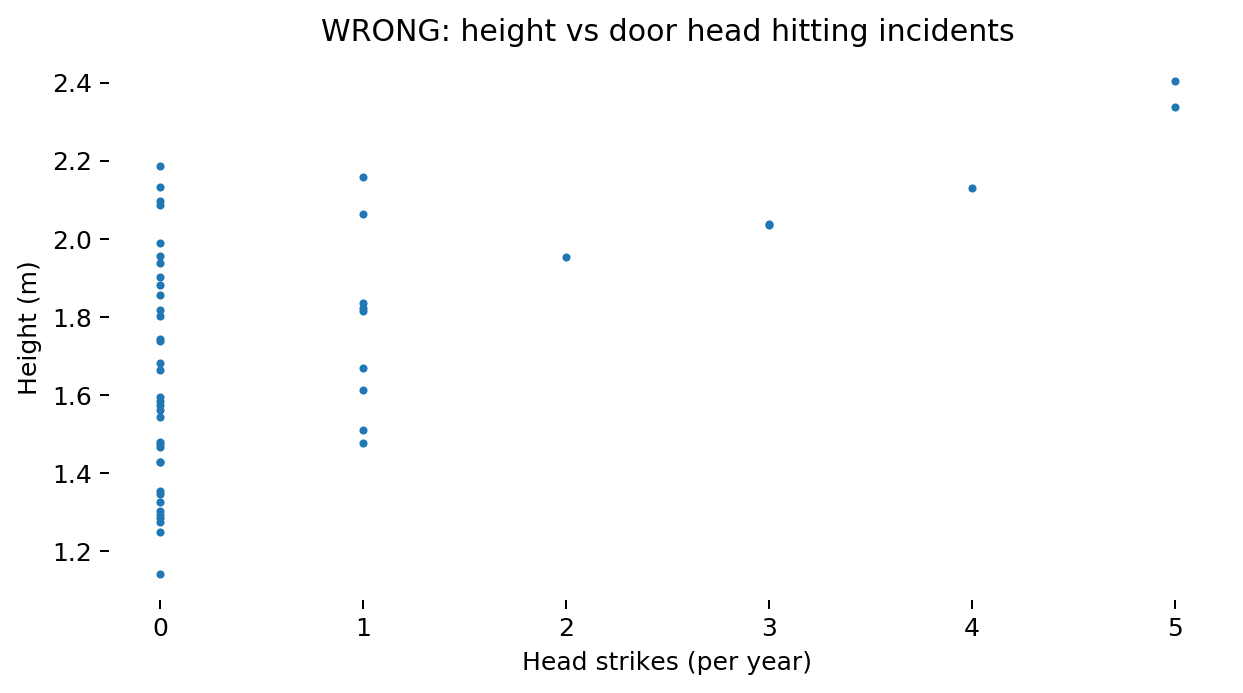

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(head_hitting_incidents, heights, s=5)
ax.set_title("WRONG: height vs door head hitting incidents")
ax.set_ylabel("Height (m)")
ax.set_xlabel("Head strikes (per year)")
ax.set_frame_on(False)

## Common 2D plot types
There are a few common 2D plot types. As always, we are working with arrays of data. Our mapping takes *two columns* of a dataset (or a stat of a dataset) and maps one to $x$ and one to $y$.

### Scatterplot

A scatter plot marks $(x,y)$ locations of measurements with *markers*. These are point **geoms**.

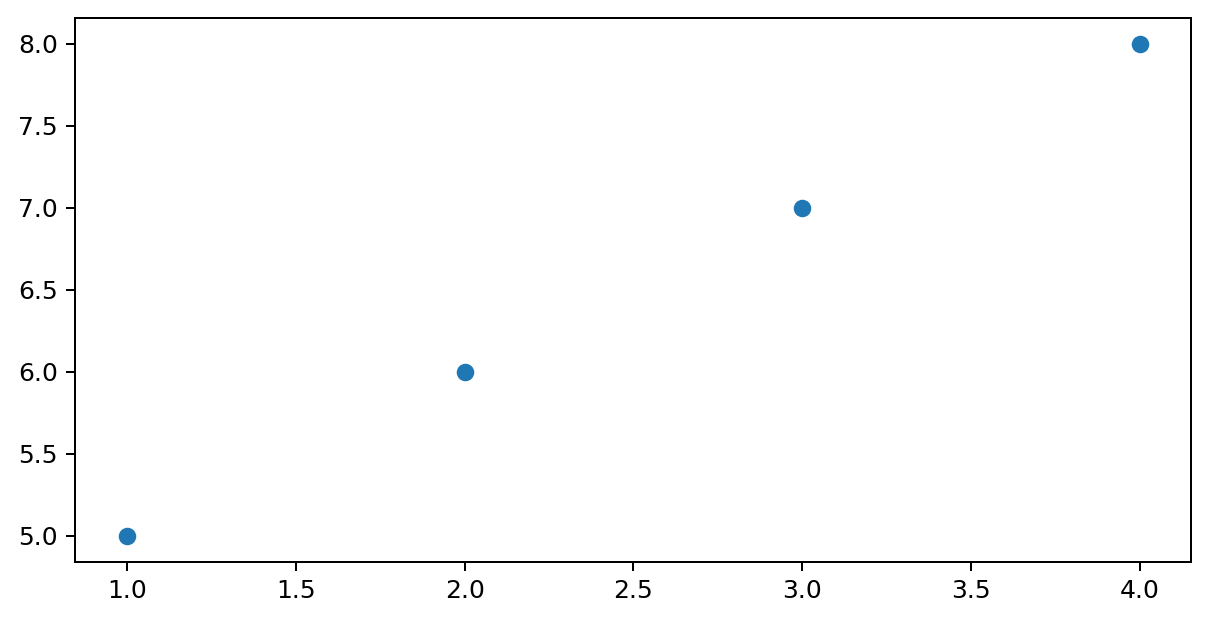

In [6]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
plt.scatter(x, y)

### Bar chart

A bar chart draws bars with height proportional to $y$ at position given by $x$.  These are patch **geoms**.

<BarContainer object of 4 artists>

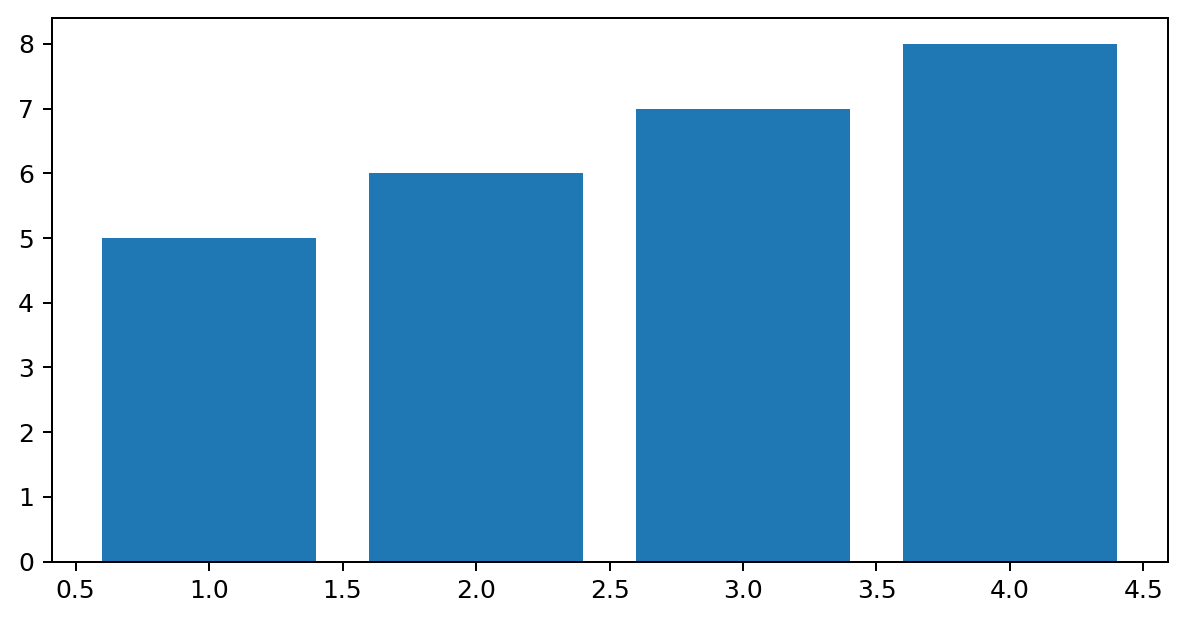

In [7]:
plt.bar(x,y) 

### Line plot

A line plot draws connected line segments between (x,y) positions, in the order that they are provided.  These are line **geoms**.

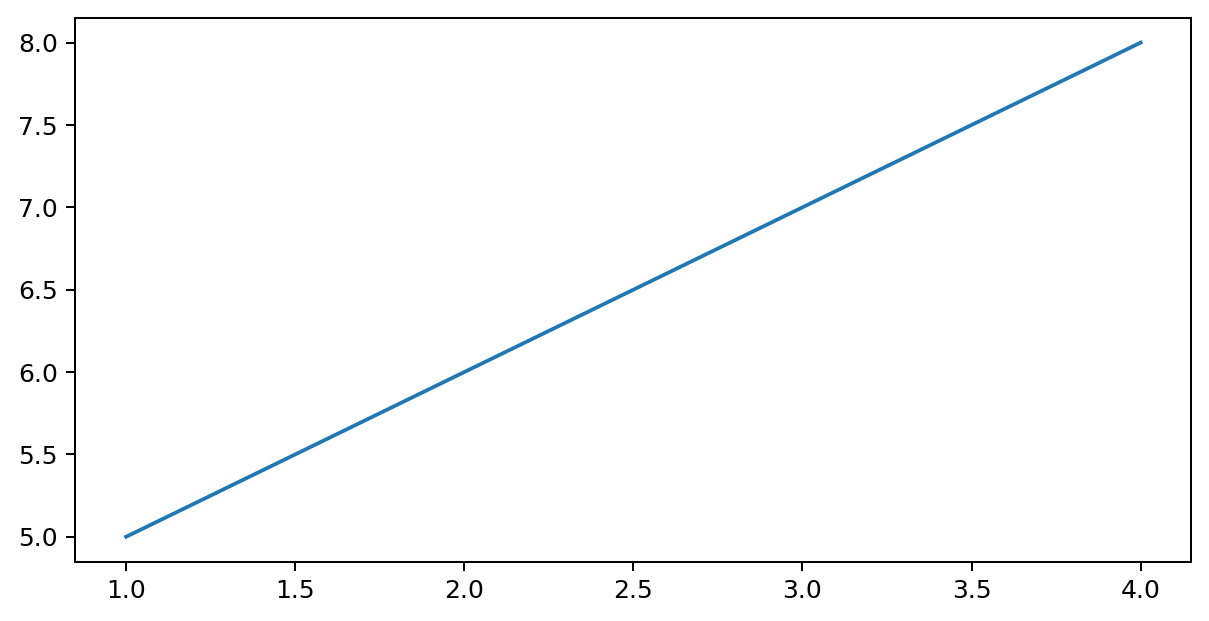

In [8]:
plt.plot(x,y) 

### Marking measurements
It is common to plot the explicit points at which measurements are available. This is a plot with two **layers**, which therefore share the same **coords**. 
One layer represents the data with **line geoms**, the second represents the same data with **point geoms** (markers).

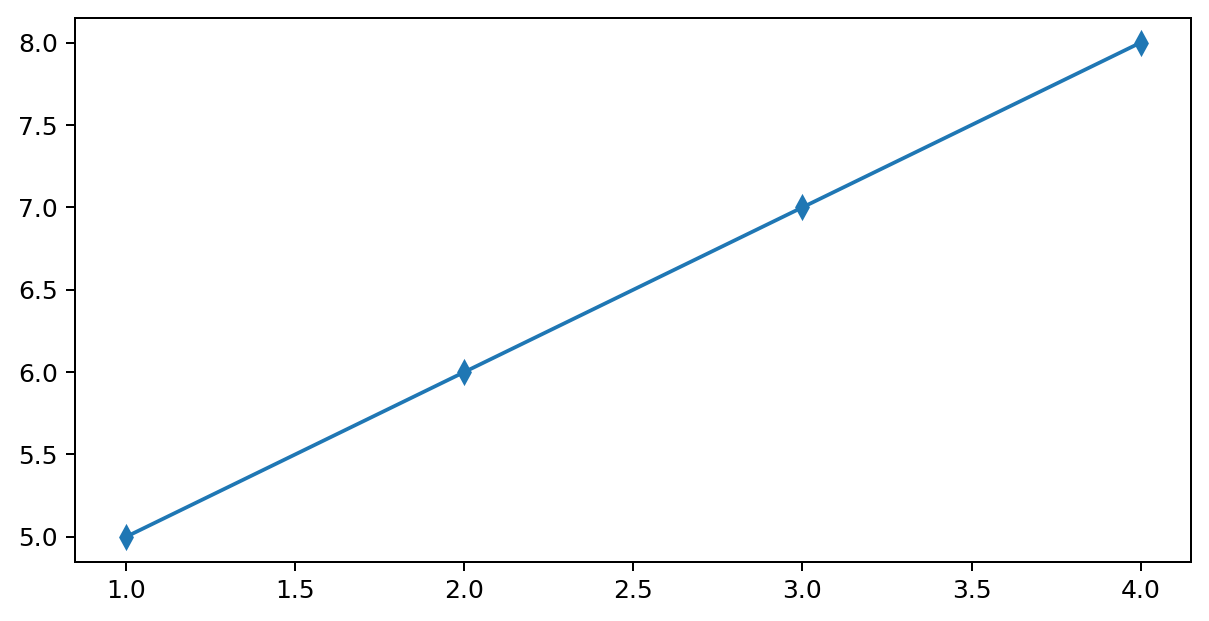

In [9]:
plt.plot(x,y, marker='d')  # sometimes we want to mark explicitly the measurement points

### Ribbon plots

If we have a triplet of vector $\vec{x},\vec{y_2},\vec{y_1}$, where both $y$s match the $x$ then the area between the two lines can be drawn using polygon **geoms**. This results in a **ribbon plot**, where the ribbon can have variable thickness (as the difference $y_1-y_2$ varies).

This can be also be thought of a line geom with variable width along the $x$ axis.

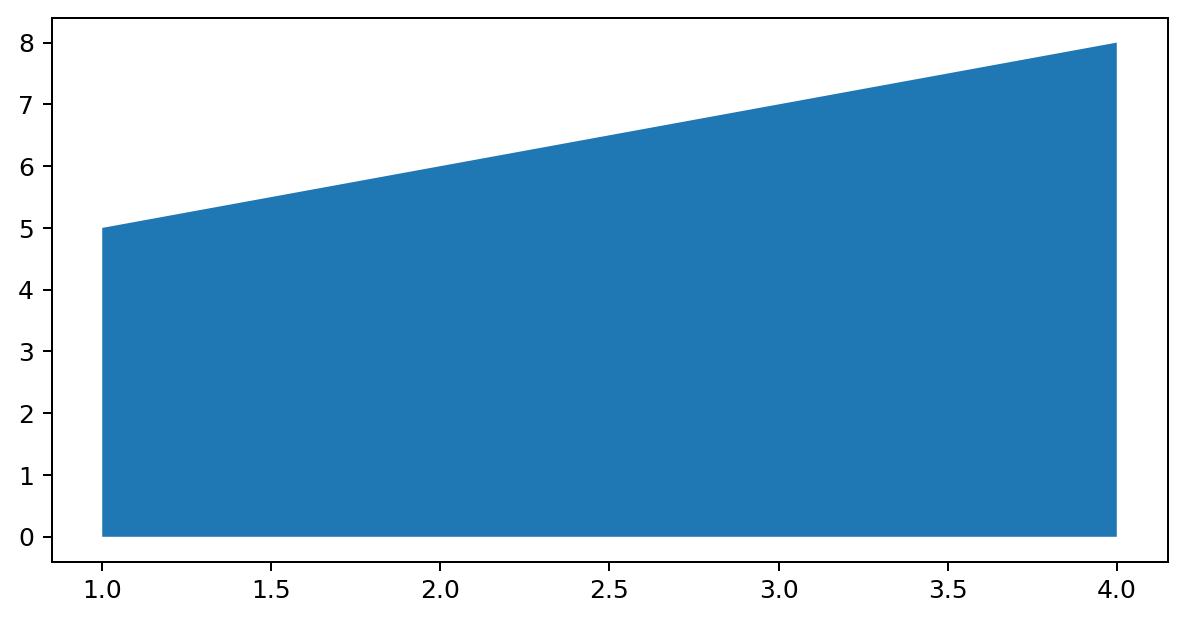

In [10]:
### Solid plot filled under curve
plt.fill_between(x, y, y*0) 

### Layering geoms
This often combined in a **layered** plot, showing the data with:
* line geoms for the trend of the data
* point geoms for notating the actual measurements
* area geoms to represent measurement uncertainty 

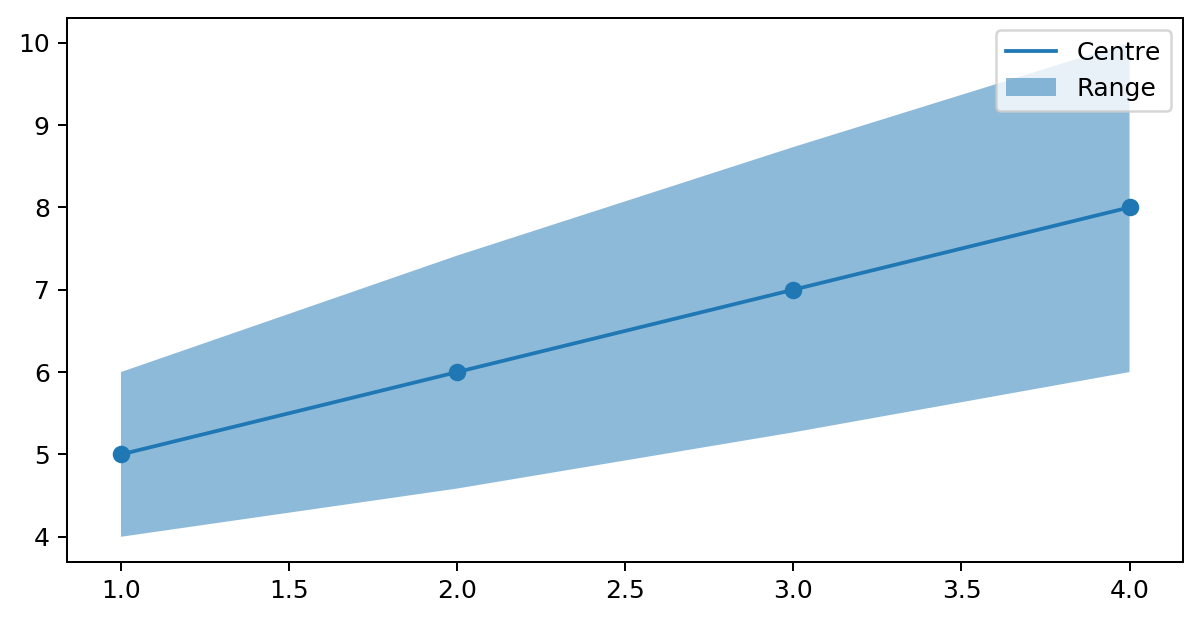

In [11]:
### Ribbon plot, with central line and markers

gap = x**0.5

plt.fill_between(x,y-gap, y+gap, alpha=0.5, label="Range")
plt.plot(x,y, label="Centre")
plt.scatter(x,y, c='C0')
plt.legend()

## Plotting data well

Let's load some test data, which is a study of the effect of vitamin C supplements on the [growth of Guinea pig teeth](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/doc/datasets/ToothGrowth.html)

The data measures the length of guinea pig teeth for various doses of Vitamin C, which are administered in two different forms (orange juice or vitamin capsule). 

<img src="imgs/guinea.jpg">

*Image credit: Mariposa Vet CC-BY-2.0  from https://www.flickr.com/photos/mariposavet/11078388266/*


In [12]:
# load the data
# columns: index, length of tooth (mm), 
# supplement type (VC or OJ), dose (mg/day)
guinea_pigs = np.loadtxt("data/guinea.csv", delimiter=',') 

In [14]:
# print the table nicely
# print first 10 rows
print(guinea_pigs[:10])

[[ 1.   4.2  0.   0.5]
 [ 2.  11.5  0.   0.5]
 [ 3.   7.3  0.   0.5]
 [ 4.   5.8  0.   0.5]
 [ 5.   6.4  0.   0.5]
 [ 6.  10.   0.   0.5]
 [ 7.  11.2  0.   0.5]
 [ 8.  11.2  0.   0.5]
 [ 9.   5.2  0.   0.5]
 [10.   7.   0.   0.5]]


In [15]:
# split the data into two sets: the vitamin set, 
# and the orange juice set
vc_pigs = guinea_pigs[guinea_pigs[:,2]==0]
oj_pigs = guinea_pigs[guinea_pigs[:,2]==1]

### This is how not to make a plot
Let's see an example of a really bad plot of this data:

(2.715, 35.385, 0.425, 2.075)

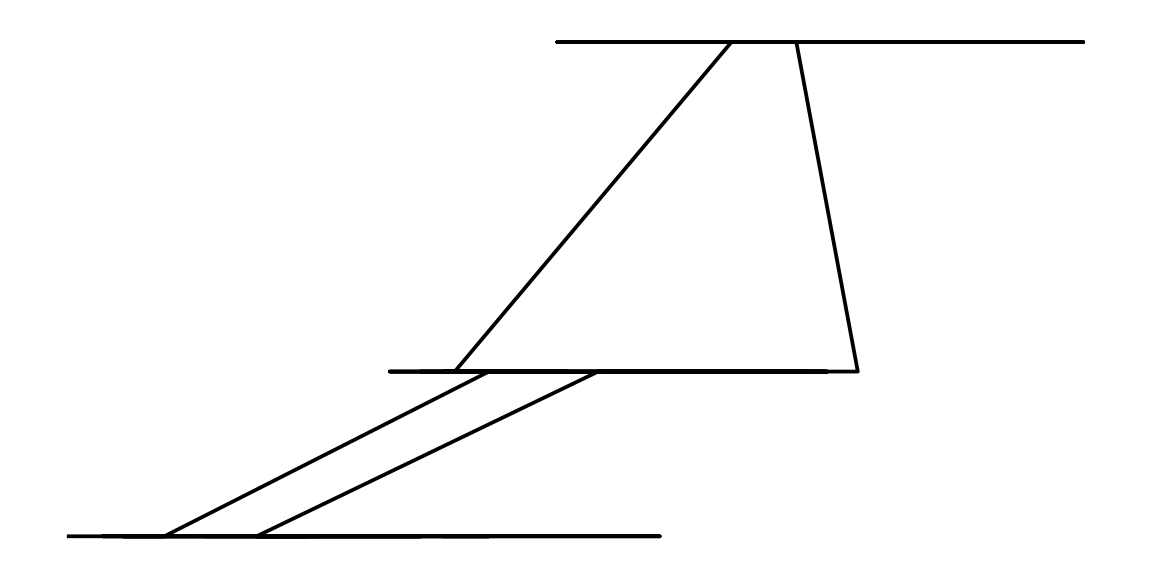

In [16]:
# how not to make a plot
# create a figure, add a subplot (just one subplot here)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# let's plot some data!
ax.plot(vc_pigs[:,1], vc_pigs[:,3], c='k')
ax.plot(oj_pigs[:,1], oj_pigs[:,3], c='k')
ax.axis("off")

### Criticism

This has:

* no **guides**
    * no axes
    * no ticks
    * no labels 
    * no units
    * no title
    * no legend
* bad **coords**
    * the dependent label on the x axis, and the independent on the y axis
* bad **mappings**
    * no distinct colours
* bad **geoms**
    * use of lines for data that is clearly not a continuous curve

It is a "valid" plot of the data, but totally unhelpful for the reader. There is no way a reader can make judgments (*should I give my guinea pig orange juice?*) from this graph.
    

### A slightly better plot

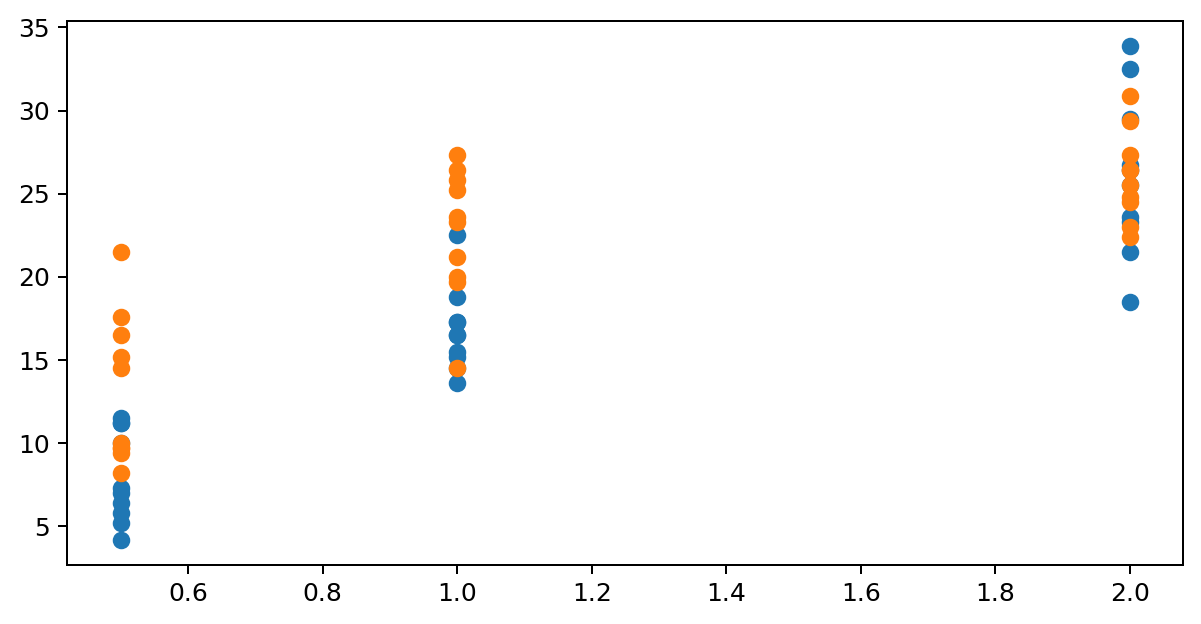

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(vc_pigs[:,3], vc_pigs[:,1])
ax.scatter(oj_pigs[:,3], oj_pigs[:,1])

Now,
* **guides**
    * There are axes with visible numbering
* **coords**
    * the dependent axis is $y$ and the independent is $x$
* **geoms**
    * a scatterplot is used instead of a line plot
* **mapping**
    * colours are distinct

However, it is still useless for making judgments from the plot alone, as it lacks any form of **labelling** to indicate what the geometry represents.

### Better still: Labelling

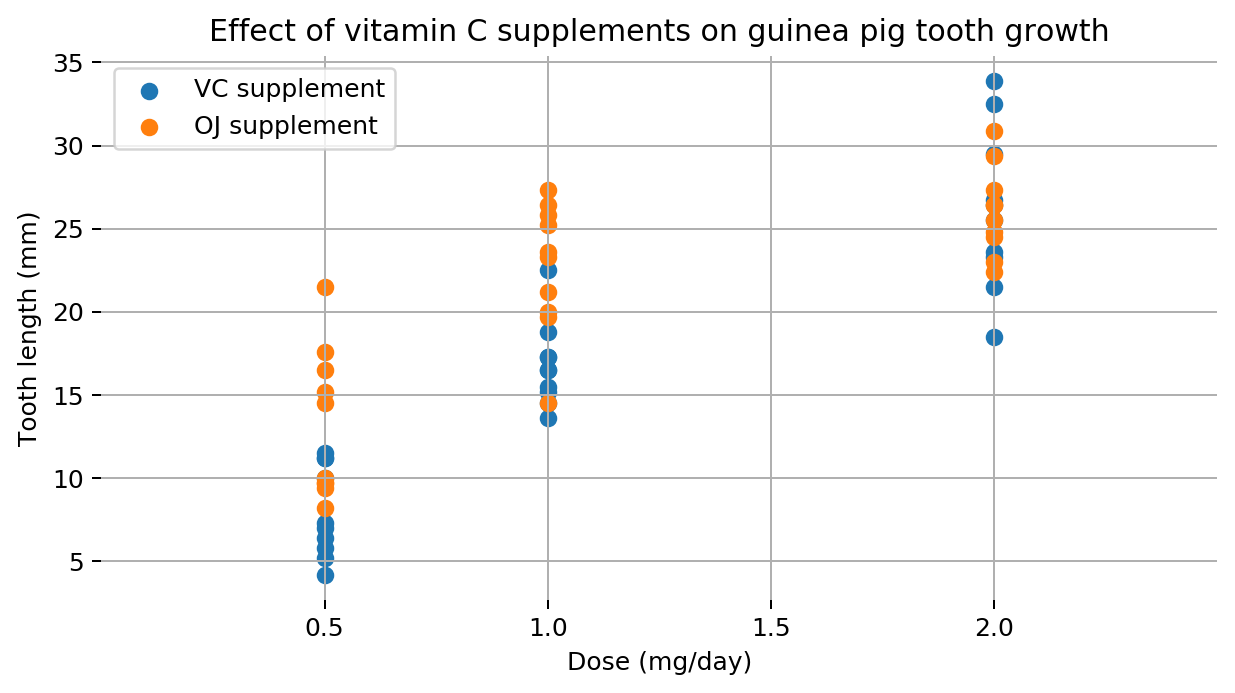

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(vc_pigs[:,3], vc_pigs[:,1], label="VC supplement")
ax.scatter(oj_pigs[:,3], oj_pigs[:,1], label="OJ supplement")
ax.set_xlabel('Dose (mg/day)')
ax.set_ylabel('Tooth length (mm)')
ax.set_xticks([0.5, 1.0, 1.5, 2.0])

ax.set_xlim(0,2.5)
ax.grid("on")
ax.set_frame_on(False)
ax.set_title("Effect of vitamin C supplements on guinea pig tooth growth")
ax.legend()


Now,
* **guides**
    * the plot has a **title**
    * the axes are labelled, with description and units
    * there is a **legend** indicating which colours match which condition
    * there is a **grid** for easier reading (this is more of an aesthetic choice than the other issues)
    * the *x ticks* are in sensible places.
    * the y axis extends from the origin

### Break: watch this
<video src="imgs/cleanup.webm" controls loop width="80%">

### Units
If an axes represents real world units (**dimensional quantities**), like  *millimeters, Joules, seconds, kg/month, hectares/gallon, rods/hogshead, nanometers/Coulomb/parsec* the units should *absolutely always* be specified in the axis labels. 

Use units that are of the appropriate scale. Don't use microseconds if all data points are in the month range. Don't use kilowatts if the data points are in nanowatts. There are exceptions to this if there is some standard unit that not using would be confusing. 



Only if the quantities are truly **dimensionless** (**bare numbers**), like in the graph of the pulses at the start of the lecture, should there be axes without visible units. In these cases the axis should be clearly labeled (e.g. "Relative growth", "Mach number", etc.).

Never use the index of an array as the $x$ axis unless it is the only reasonable choice. For example, if you have data measured in regular samples over time, give the units in real time elapsed (e.g. microseconds), not the sample number!

### Avoid rescaled units
Although `matplotlib` and other libraries will autoscale the numbers on the axis to sensible values and then insert a `1eN` label at the top, you should avoid this. This can lead to serious confusion and is hard to read.

Text(0, 0.5, 'Y')

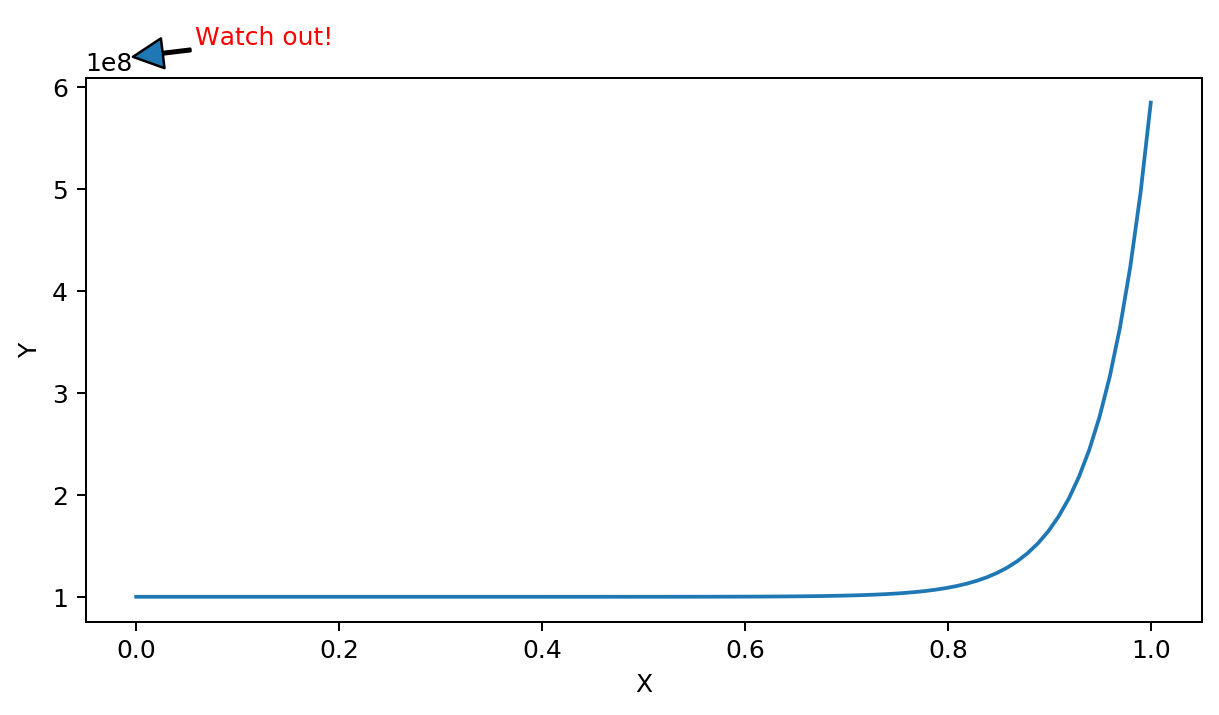

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(0,1,100)
y = 1e8 + np.exp(x*20)


ax.plot(x,y)
ax.annotate(xy=(0.109,0.92), xycoords='figure fraction', s='Watch out!', 
            textcoords='offset points', xytext=(25,5), arrowprops={'width':1}, color='red')
ax.set_xlabel("X")
ax.set_ylabel("Y")

If possible, rescale the units yourself and insert the scaling in the axis label.

Text(0, 0.5, 'Y (billions)')

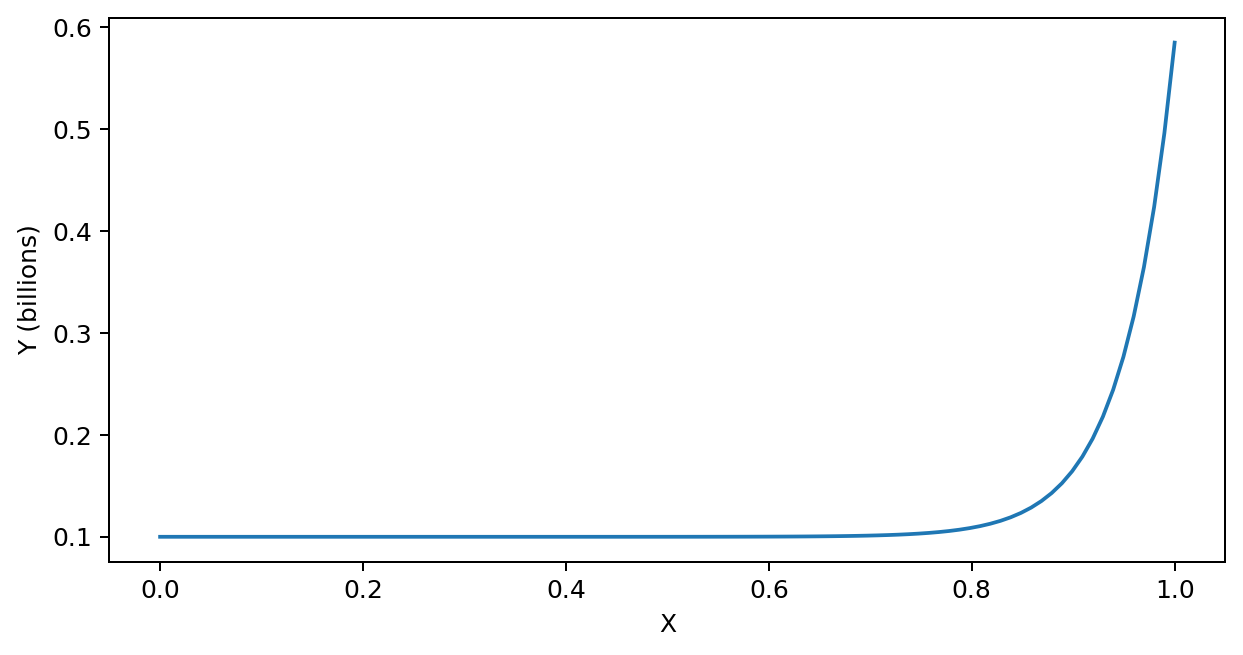

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(x,y/1e9) # convert to billions
ax.set_xlabel("X")
ax.set_ylabel("Y (billions)")

## Axes and coordinate transform
An **axis** is used to refer to the visual representation of a dimension on a graph (e.g. "the x axis"), and the object which *transforms data from measurement units to visual units*. In other words, the axis specifies the scaling and offset of data: a coordinate system or **coord**. 

The mapping of data is determined by **axis limits** which specify the minimum and maximum measurement values to be displayed.

For example, it may be better in the example above to show the range for dose and tooth length starting at zero:


(0, 40)

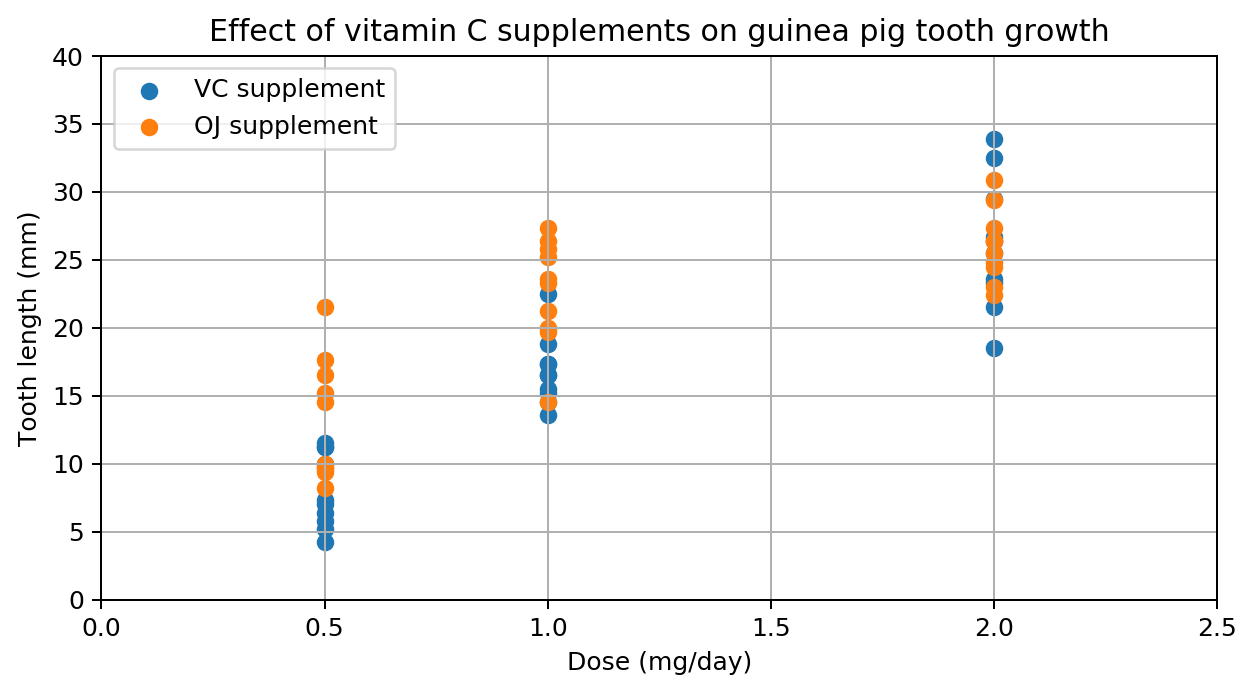

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(vc_pigs[:,3], vc_pigs[:,1], label="VC supplement")
ax.scatter(oj_pigs[:,3], oj_pigs[:,1], label="OJ supplement")
ax.set_xlabel('Dose (mg/day)')
ax.set_ylabel('Tooth length (mm)')
ax.grid("on")
ax.set_title("Effect of vitamin C supplements on guinea pig tooth growth")
ax.legend()

# set the axis limits for x and y
ax.set_xlim(0, 2.5)
ax.set_ylim(0, 40)

### Don't deceive
It is a very common "trick" to use axes that don't span the full scale to make differences look larger than they seem. This is often seen in political and advertising material. This should be avoided *unless* it makes the graph clearer and more precise.


### Layered versus faceted
This is a **layered** plot. Two different view of the dataset (the "OJ" selection and the "VC" selection) are overlaid on the same coordinate system. We could alternatively plot this as a **faceted** visualisation, separating the OJ and VC views onto two separate coordinate systems *which have the same scaling (for easy comparision)*
.

This corresponds to creating multiple `subplots`, one for each coordinate system.

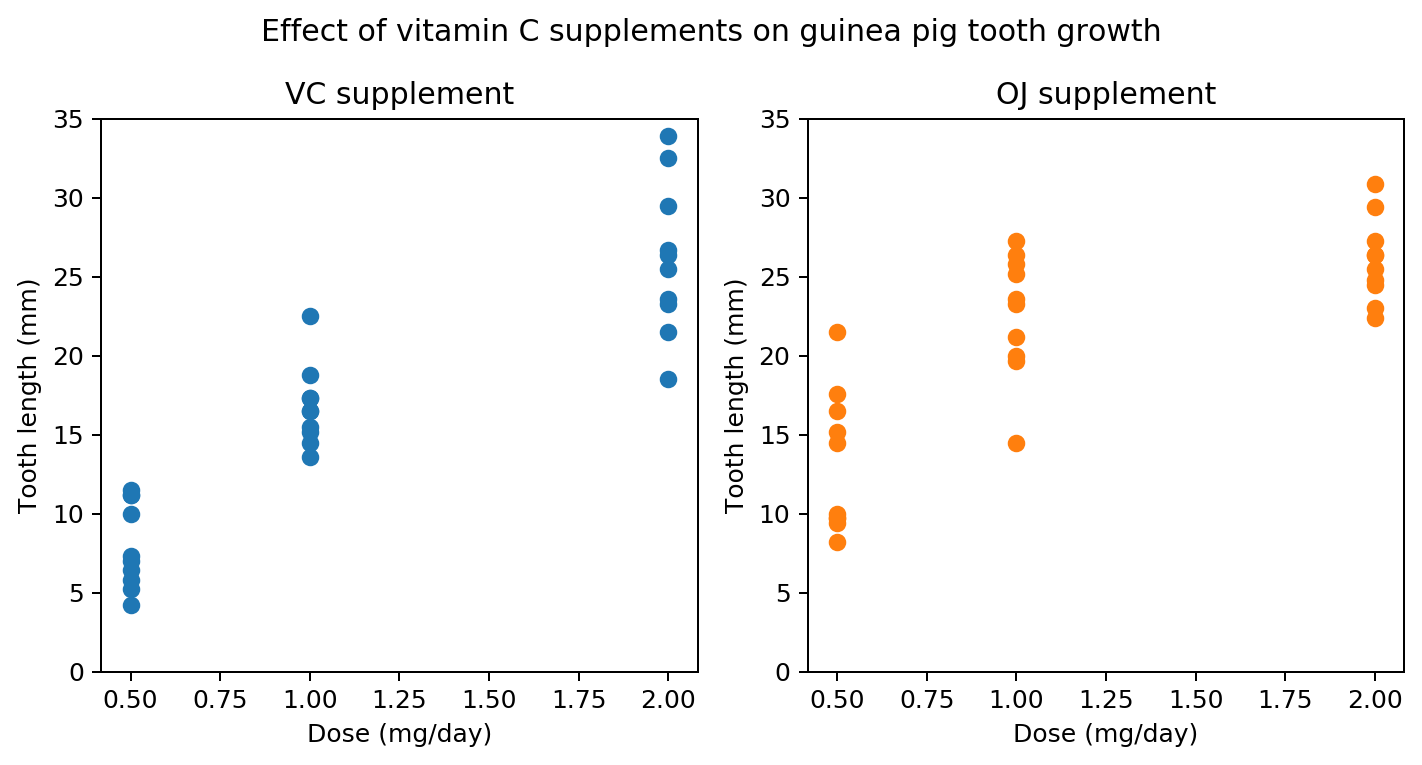

In [24]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.scatter(vc_pigs[:,3], vc_pigs[:,1], label="VC supplement")
ax.set_title("VC supplement")
ax.set_xlabel('Dose (mg/day)')
ax.set_ylabel('Tooth length (mm)')
ax.set_ylim(0,35) # note that the y axis is scaled exactly the same in both plots

ax = fig.add_subplot(1,2,2)
ax.scatter(oj_pigs[:,3], oj_pigs[:,1], c='C1')
ax.set_title("OJ supplement")
ax.set_xlabel('Dose (mg/day)')
ax.set_ylabel('Tooth length (mm)')
ax.set_ylim(0,35)

fig.suptitle("Effect of vitamin C supplements on guinea pig tooth growth", y=1.05)
fig.tight_layout()


# One dataset, many views
A visualisation must communicate meaning to a reader. A visualisation is not defined by a dataset -- some visualisation types are good for certain kinds of dataset and worse for others, but the visualisation choice comes down to what the purpose of the visualisation is. It's often helpful to think of the **caption** that you would want to be able to write before creating the visualisation.


We'll look at a straightforward dataset, which consists of quarterly measurements of the gas used in the UK, recorded from 1960 to 1986. This is a simple relationship of the type $$y=f(x),$$ where $x$ is the year and $y$ is the gas used.

The original units are megatherms. 1 megatherm is about 30,000,000 kWh.

In [25]:
## test data: UK gas usage, quarterly
# columns: index, year, gas (megatherms)
gas = np.loadtxt("data/gas.csv", delimiter=',')

In [26]:
np.set_printoptions(suppress=True)
print(gas[:10, :])

[[   1.   1960.    160.1 ]
 [   2.   1960.25  129.7 ]
 [   3.   1960.5    84.8 ]
 [   4.   1960.75  120.1 ]
 [   5.   1961.    160.1 ]
 [   6.   1961.25  124.9 ]
 [   7.   1961.5    84.8 ]
 [   8.   1961.75  116.9 ]
 [   9.   1962.    169.7 ]
 [  10.   1962.25  140.9 ]]


## Straghtforward plot, line+marker

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986')

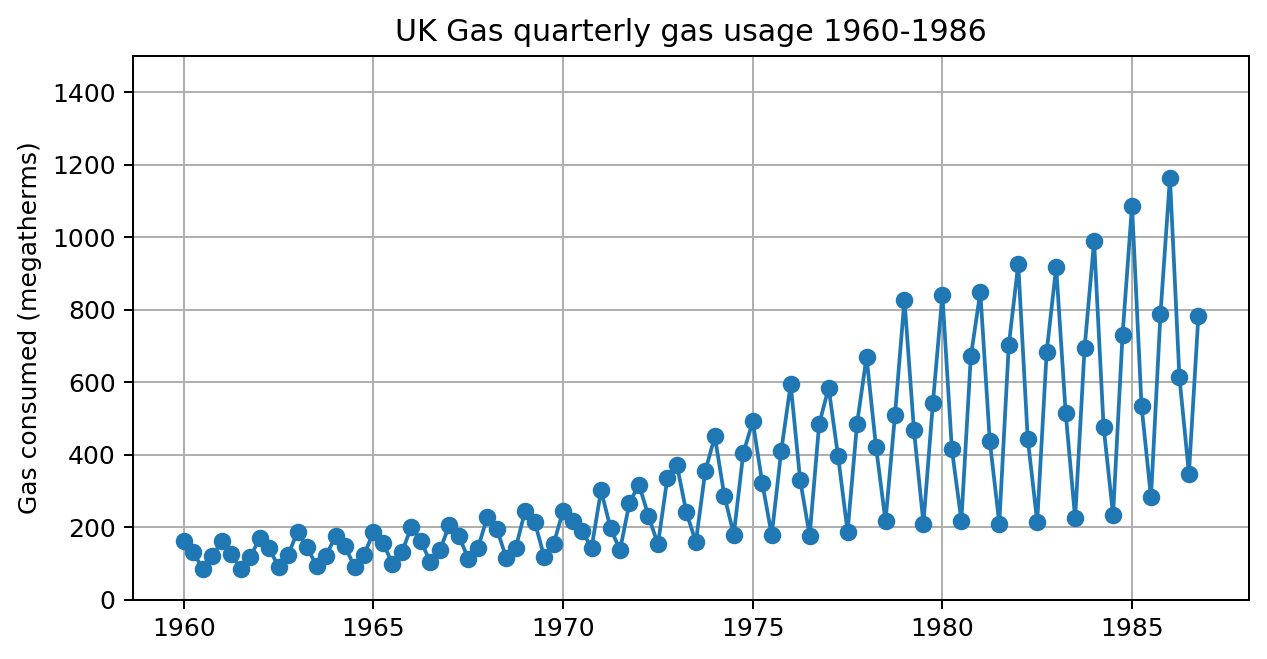

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gas[:, 1], gas[:, 2], "-o")
ax.set_ylabel("Gas consumed (megatherms)")
ax.grid("on")
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")


**Figure 1:** Gas usage in the UK, 1960-1986. Gas usage follows a strongly seasonal pattern, with an overall increase in gas usage. Variability across seasons has increased over time.
   

## Simplified plot

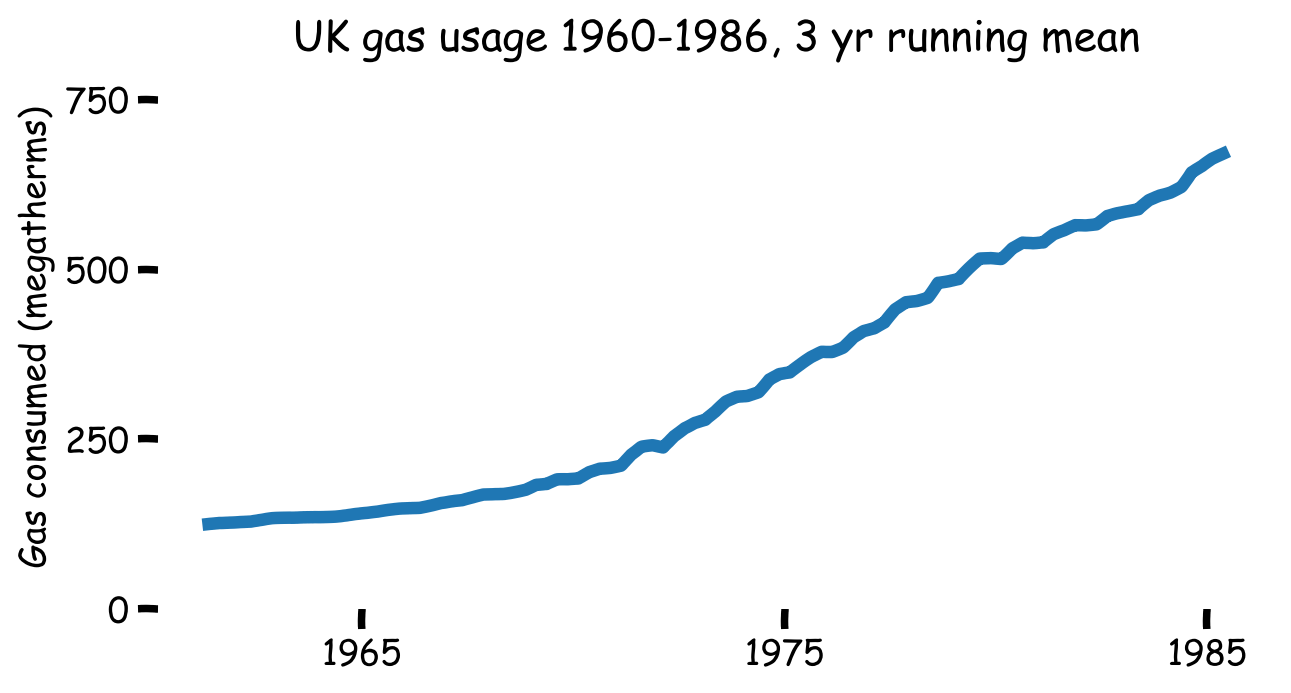

In [28]:
# use the xkcd style
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # don't worry how this works: but it computes a 12 element
    # running mean of the data
    N = 12
    smoothed = np.convolve(gas[:, 2], np.ones((N,)) / N, mode="valid")
    smoothed_t = np.convolve(gas[:, 1], np.ones((N,)) / N, mode="valid")
    ax.plot(smoothed_t, smoothed, linewidth=5)

    ax.set_ylabel("Gas consumed (megatherms)")
    ax.grid("on")
    ax.set_frame_on(False)
    ax.set_xticks([1965, 1975, 1985])
    ax.set_yticks([0, 250, 500, 750])
    ax.set_ylim(0, 800)
    ax.set_title("UK gas usage 1960-1986, 3 yr running mean")

**Figure 2:** Gas usage in the UK, 1960-1986. Gas usage has increased over time, with a notable increase in the trend after 1970.

## Layered plot, split by quarters

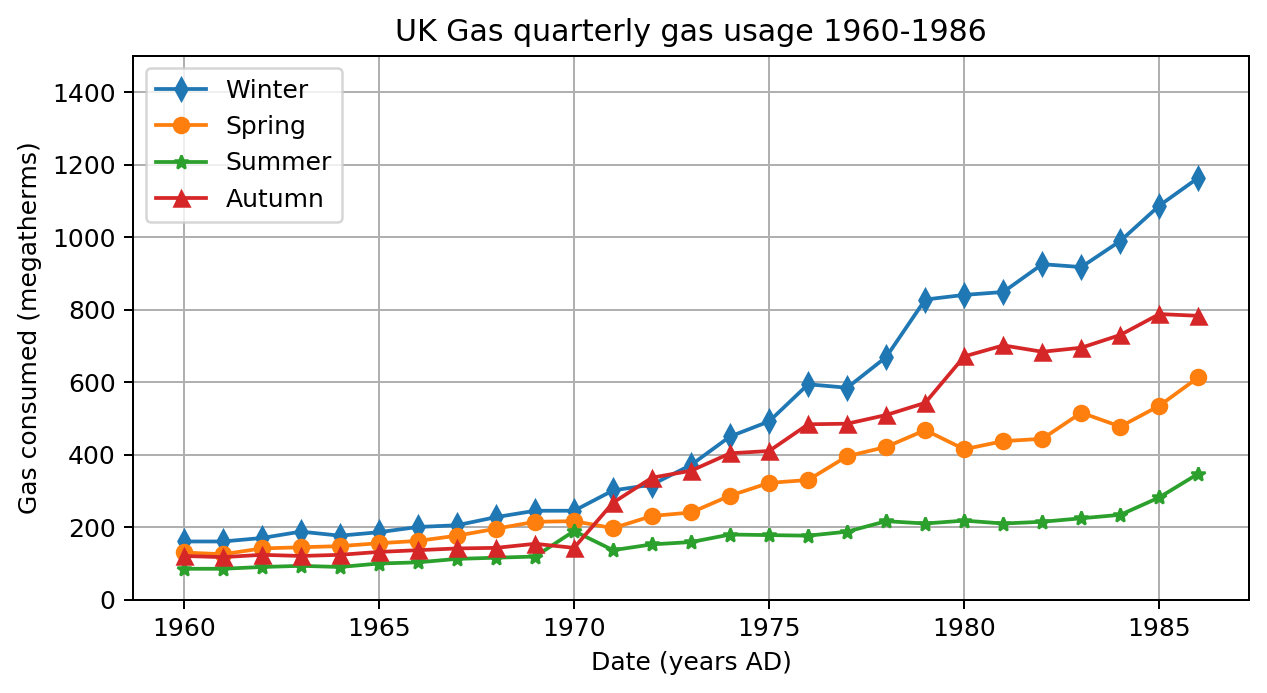

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# split into quarterly lines (every fourth element)
q1 = gas[::4, :]
q2 = gas[1::4, :]
q3 = gas[2::4, :]
q4 = gas[3::4, :]

ax.plot(q1[:,1], q1[:,2], label='Winter', marker='d')
ax.plot(q1[:,1], q2[:,2], label='Spring', marker='o')
ax.plot(q1[:,1], q3[:,2], label='Summer', marker='*')
ax.plot(q1[:,1], q4[:,2], label='Autumn', marker='^')

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

**Figure 3:** Gas usage in the UK, 1960-1986, split by quarters. There is marked difference in gas usage across seasons. Winter use  increased dramatically between 1970 and 1985, although summer use remained almost constant, although early signs of an uptick in summer gas use seem to be present.

## Faceted plot

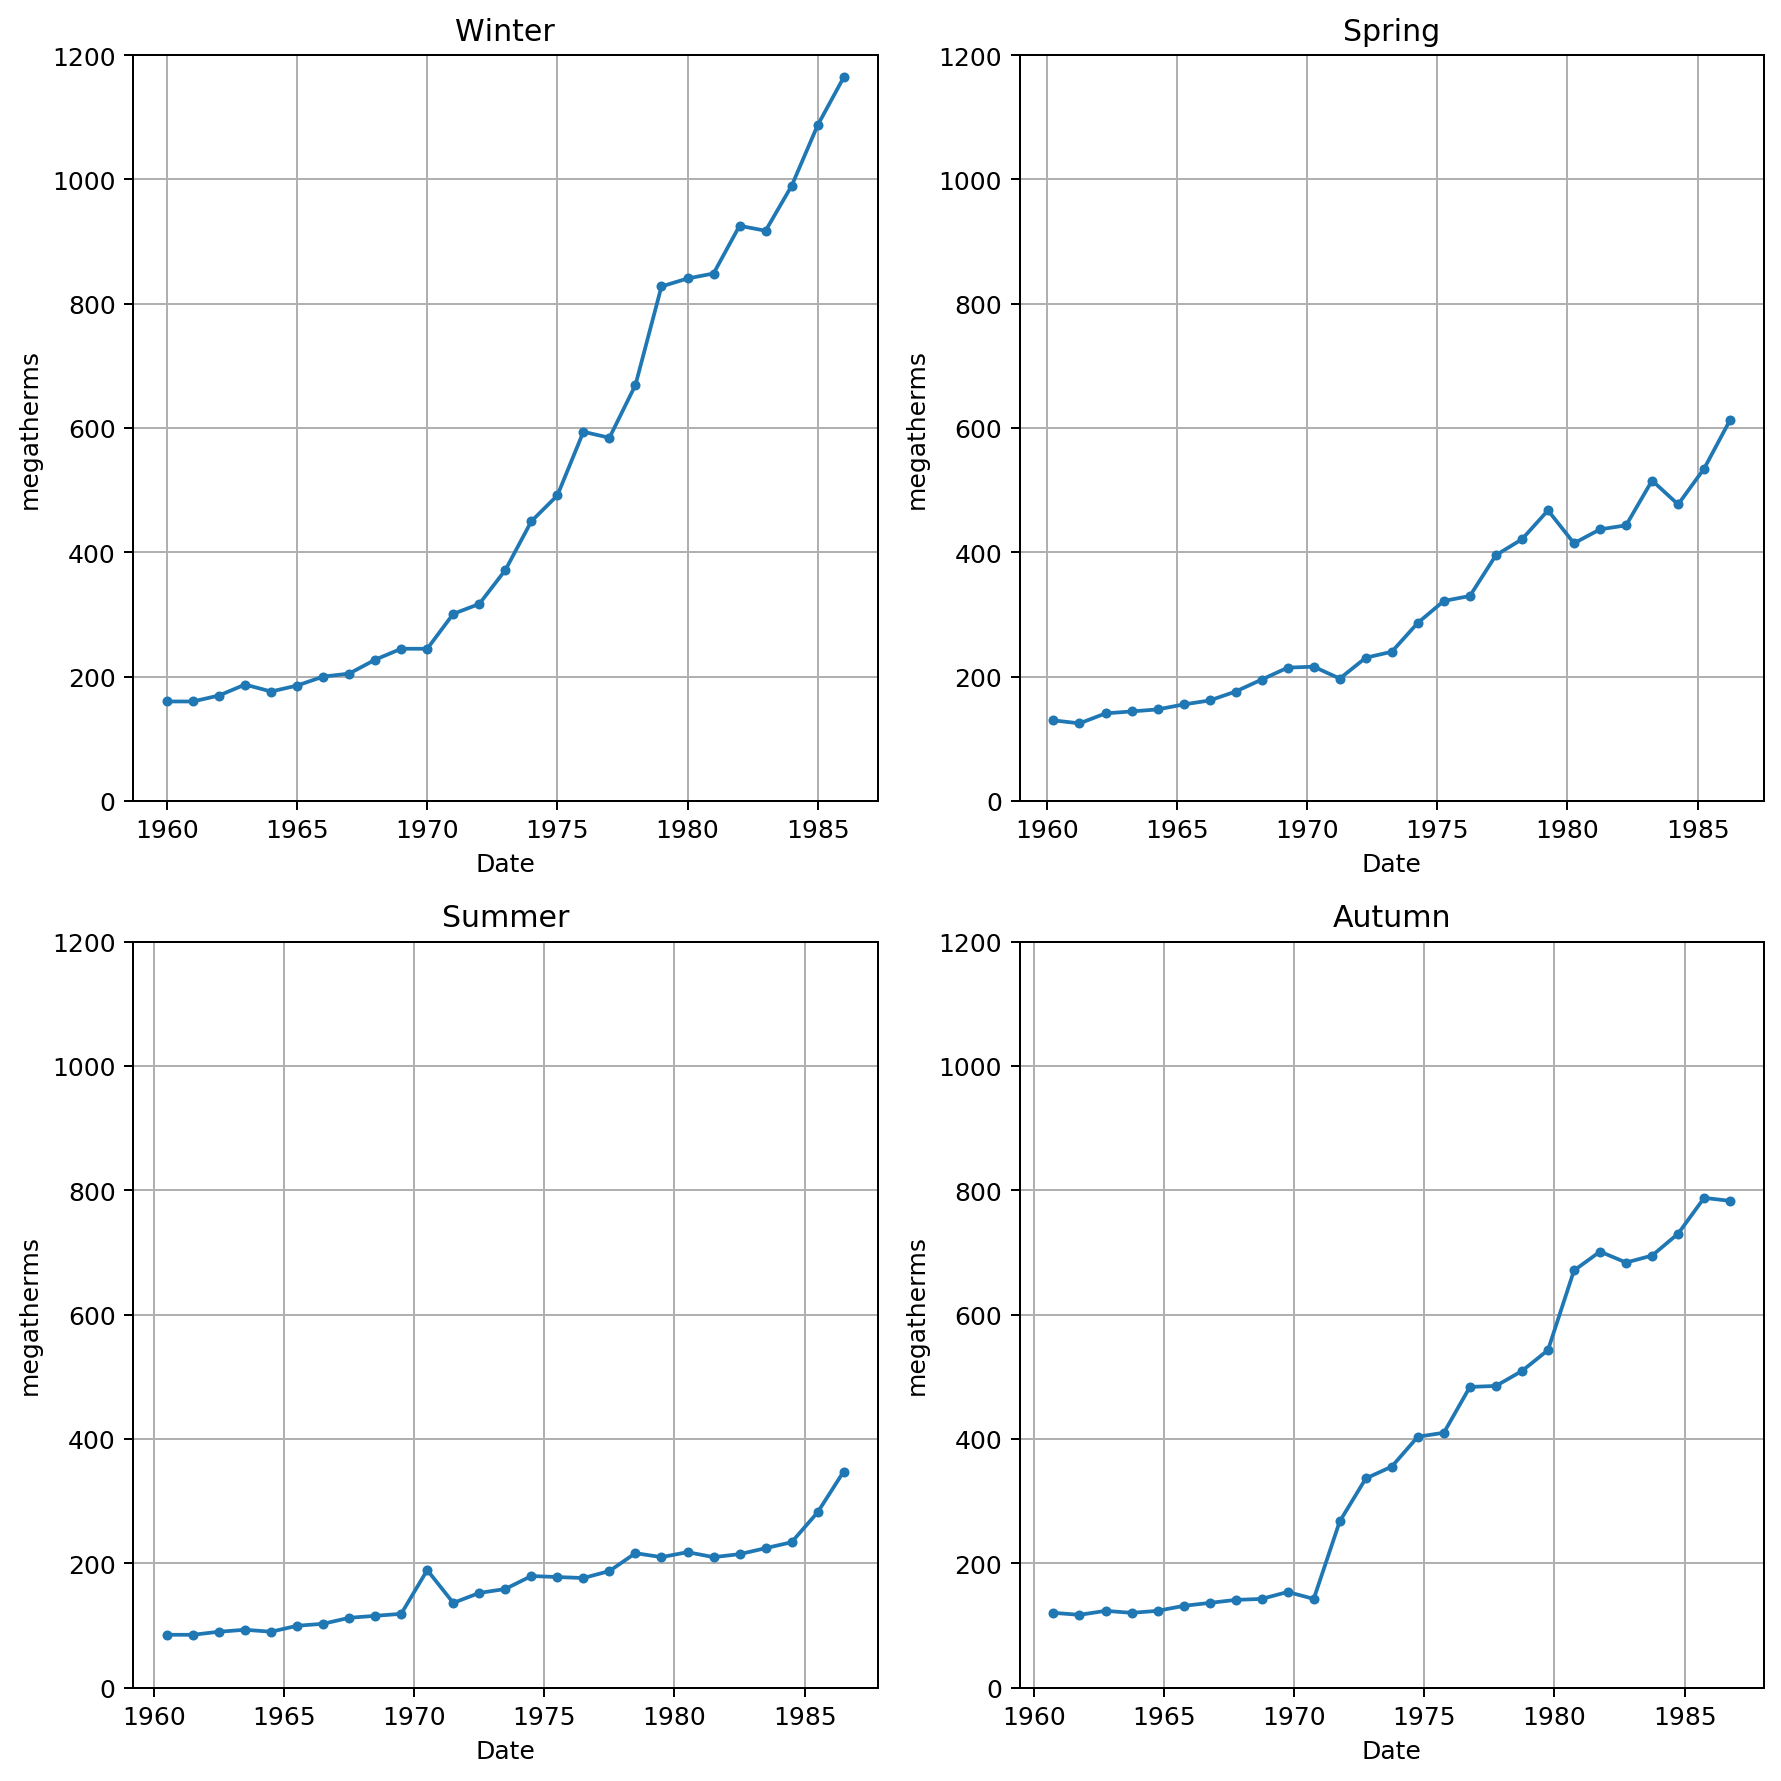

In [30]:
fig = plt.figure(figsize=(10, 10))

# iterate over quarters
for ix, quarter, season in zip(
    [1, 2, 3, 4], [q1, q2, q3, q4], ["Winter", "Spring", "Summer", "Autumn"]
):
    ax = fig.add_subplot(2, 2, ix)

    ax.plot(quarter[:, 1], quarter[:, 2], marker=".")
    ax.set_xlabel("Date")
    ax.set_ylabel("megatherms")
    ax.grid("on")
    ax.set_title(season)
    ax.set_ylim(0, 1200)

fig.tight_layout()  # fix overlapping plots!

**Figure 4:** Gas usage in the UK, 1960-1986, split by quarters. There is marked difference in gas usage across seasons. Autumn use remained constant from 1960-1971, but rose very rapidly after 1971. Winter gas use increases super-linearly, while spring and summer use show more gradual increases. Summer 1971 appeared to have particularly high gas usage.

## Statistcally transformed plot, binned by season

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986')

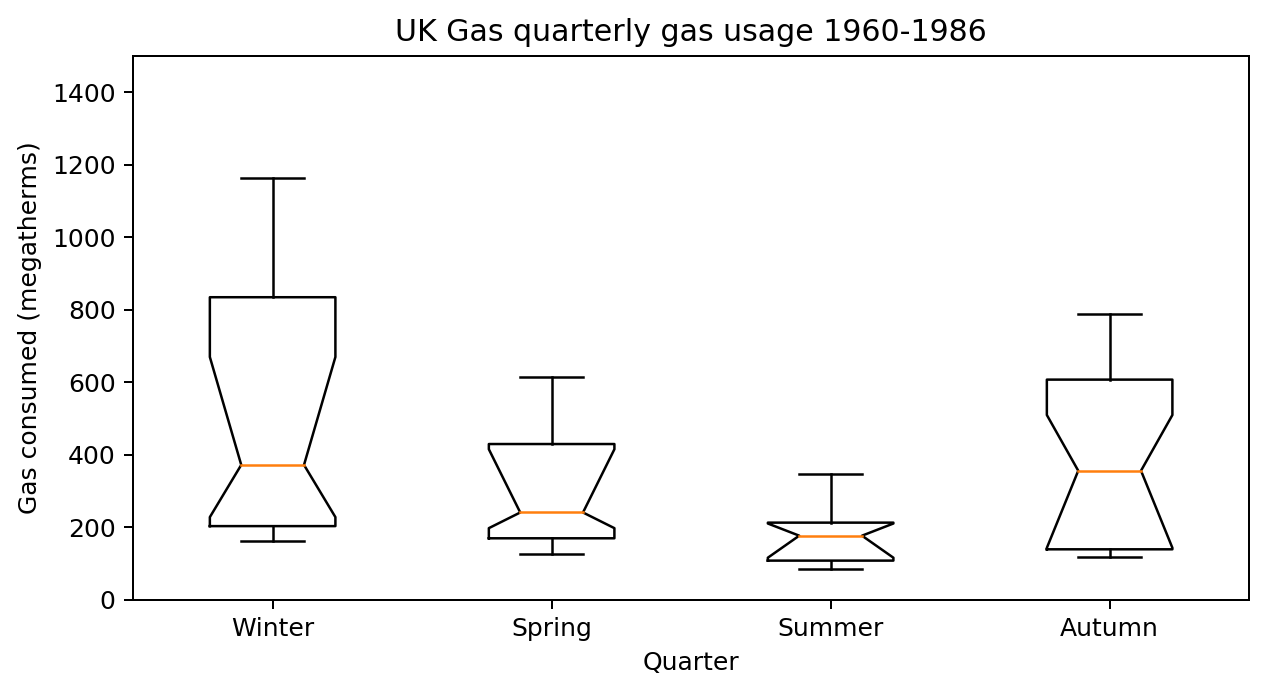

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(
    [q1[:, 2], q2[:, 2], q3[:, 2], q4[:, 2]],
    labels=["Winter", "Spring", "Summer", "Autumn"],
    notch=True,
    bootstrap=1000,
)

ax.set_xlabel("Quarter")
ax.set_ylabel("Gas consumed (megatherms)")
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")

**Figure 5:** Gas usage in the UK, 1960-1986, split by quarters. Winter gas use is higher than other seasons, but also has significantly higher variability. Summer gas use varies little over the years.

## Ribbon plot, showing mean and range

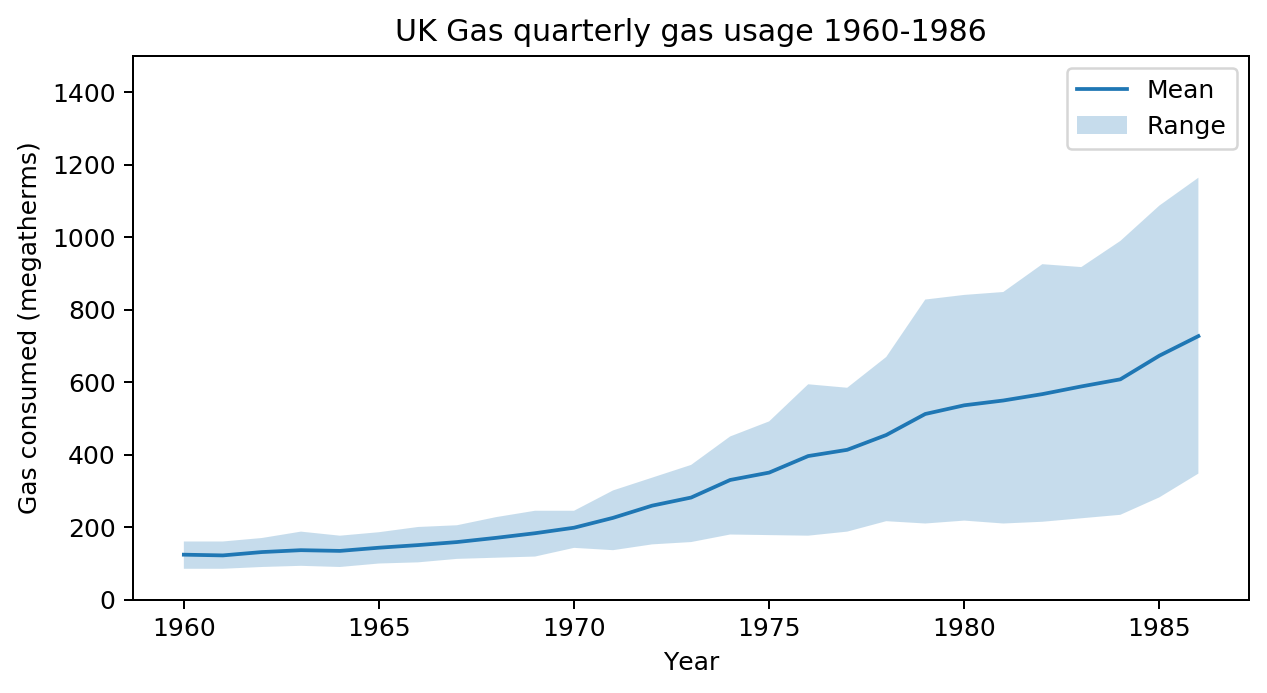

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

all_seasons = np.vstack([q1[:, 2], q2[:, 2], q3[:, 2], q4[:, 2]])

mean = np.mean(all_seasons, axis=0)
qmax = np.max(all_seasons, axis=0)
qmin = np.min(all_seasons, axis=0)
ax.plot(q1[:, 1], mean, label="Mean")
ax.fill_between(q1[:, 1], qmin, qmax, alpha=0.25, label="Range")


ax.set_xlabel("Year")
ax.set_ylabel("Gas consumed (megatherms)")
ax.legend()
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

**Figure 6:** Gas usage in the UK, 1960-1986, split by quarters. Gas use shows an increasing trend, though leveling off in the 1980s. The variation between winter and summer use has increased dramatically during the 1970s and 1980s.

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986, min/max usage versus median usage')

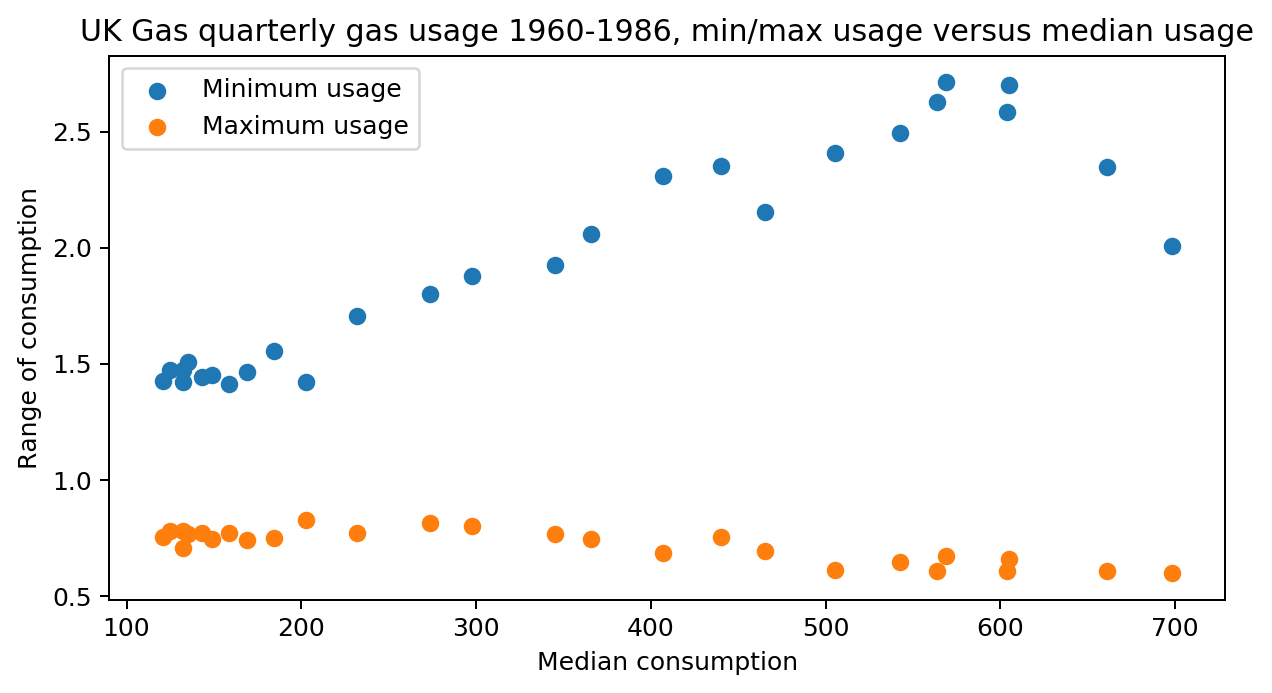

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

all_seasons = np.vstack([q1[:, 2], q2[:, 2], q3[:, 2], q4[:, 2]])

mean = np.median(all_seasons, axis=0)
qmax = np.max(all_seasons, axis=0)
qmin = np.min(all_seasons, axis=0)

ax.scatter(mean, mean / qmin, label="Minimum usage")
ax.scatter(mean, mean / qmax, label="Maximum usage")


ax.set_xlabel("Median consumption")
ax.set_ylabel("Range of consumption")
ax.legend()
ax.set_title("UK Gas quarterly gas usage 1960-1986, min/max usage versus median usage")

**Figure 7:** Gas usage in the UK, 1960-1986. Plot shows the median consumption in each year versus the minimum and maximum seasonal use.  Gas consumption is virtually always in the range 0.75 to 2.5 times the mean usage, but the maximum use has increased as the median use has crept up. In years with the highest median consumption, however, the maximum consumption is only around 1.8 times the median use.


Text(0.5, 1.0, 'UK Gas cumulative CO2 produced from gas since 1960')

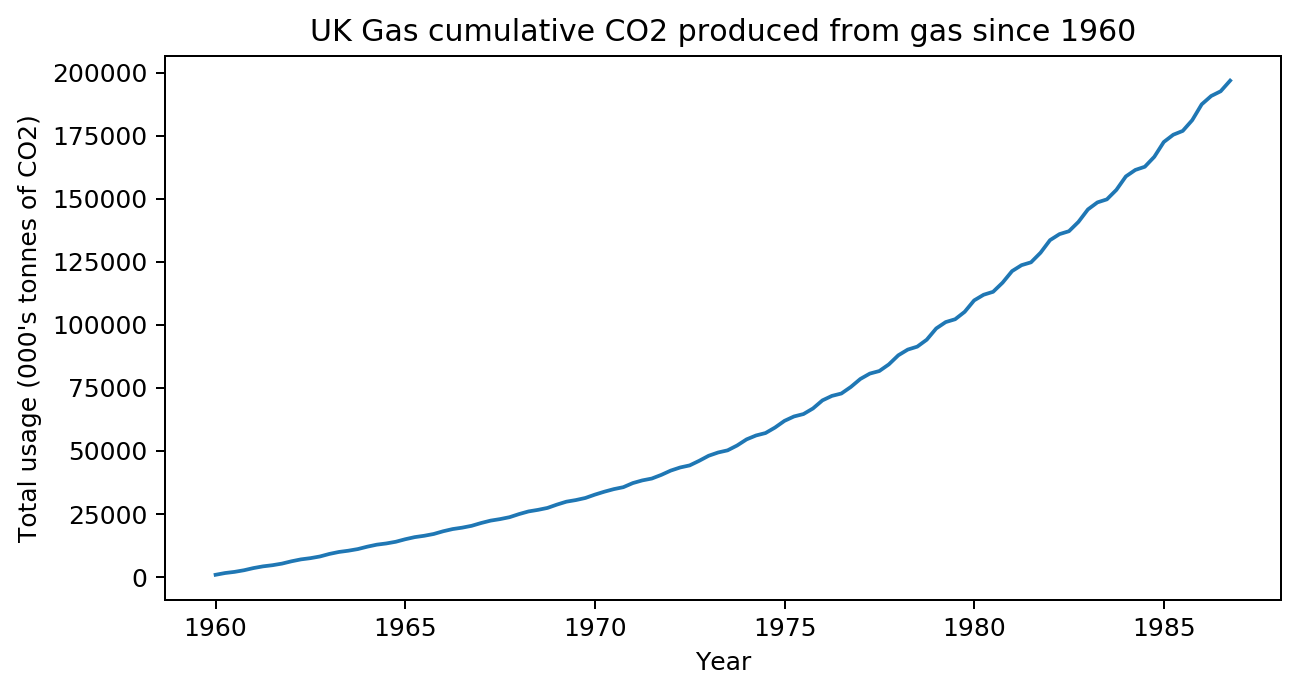

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 1 therm of natural gas = 5.397 kg of CO2
# 1 megatherm = 5397 tonnes of CO2
co2 = 5.397 * gas[:, 2]
ax.plot(gas[:, 1], np.cumsum(co2))
ax.set_xlabel("Year")
ax.set_ylabel("Total usage (000's tonnes of CO2)")
ax.set_title("UK Gas cumulative CO2 produced from gas since 1960")

**Figure 8:** Gas usage in the UK, 1960-1986. Megatherms of gas are shown converted to metric tonnes of CO2 emitted, accumulated over the period 1960 to 1985. Cumulative CO2 emissions appear to be increasing almost quadratically, and more than 200,000,000 tonnes of CO2 were emitted by the UK through natural gas burning by 1986.

---

# Stats

A **stat** is a statistic of a **Dataset** (i.e. a function of the data). Statistics *summarise* data in some way. Common examples of stats are:

* **aggregate summary statistics**, like measures of central tendency (mean, median) and deviation (standard deviation, max/min, interquartile range)
* **binning operations**, which categorise data into a number of discrete **bins** and count the data points falling into those bins
* **smoothing and regression**, which find approximating functions to datasets, like linear regression which fits a line through data

Plots of a single 1D array of numbers $[x_1, x_2, \dots, x_n]$ usually involve displaying *statistics* (**stats**)  to transform the dataset into forms that 2D plotting forms can be applied to. Very often these plot types are used with multiple arrays (data that has been grouped in some way) to show differences between the groups.


## Binning operations
A **binning** operation divides data into a number of discrete groups, or **bins**. This can help summarise data, particularly for continuous data where every observation will be different if measured precisely enough (for example, a very precise thermometer will *always* show a different temperature to the same time yesterday).

### Histograms: showing distributions
A **histogram** is the combination of a **binning operation** (a kind of **stat**) with a standard 2D bar chart (the bars being the **geoms**). It  shows the count of values which fall into a certain range. It is useful when we want to visualise the *distribution* of values.

A histogram does not have spaces between bars, as the bin regions represent contiguous divisions of the input space.

Text(0, 0.5, 'Count of quarters')

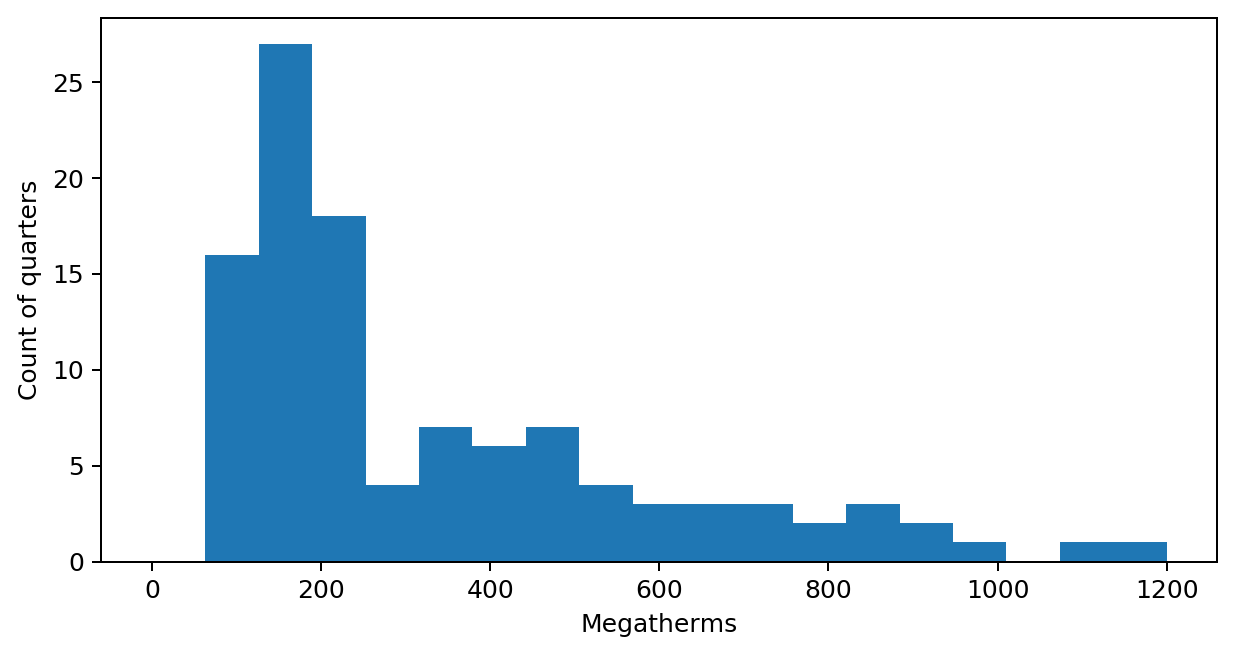

In [35]:

x = gas[:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bins = np.linspace(0,1200,20)
ax.hist(x, bins=np.linspace(0,1200,20));
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count of quarters")

Text(0, 0.5, 'Count')

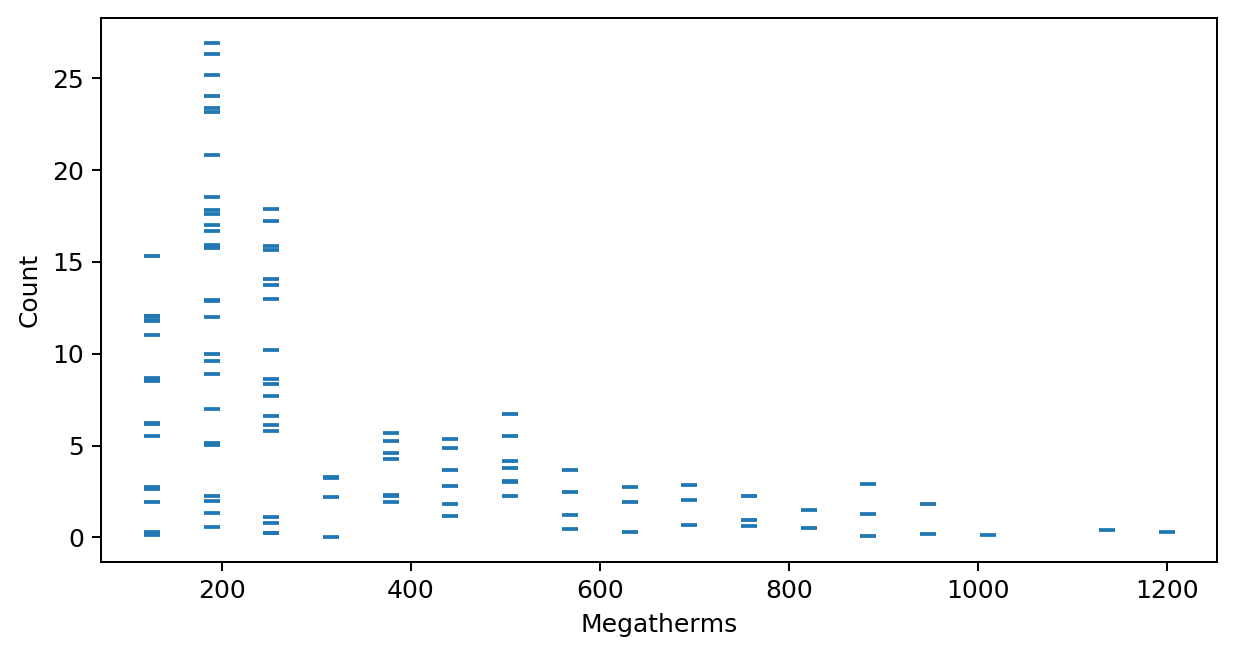

In [36]:
# show what is going on in a histogram
# each point is "binned" into one of a number of regions and then the count
# is plotted on the y-axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xs = np.digitize(x, bins)
count = np.bincount(xs)

plt.scatter(bins[np.clip(xs,0,len(bins)-1)],np.random.uniform(0,count[np.clip(xs,0,len(bins)-1)],x.shape), 
            s=45, marker='_')
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count")

The results of a histogram depend heavily on the bins chosen. Too many bins means that the result is sparse and "gappy" -- the overall trend is obscured. Too few bins means the result is overly smoothed and details are lost. 



Text(0.5, 1.0, 'Too many bins')

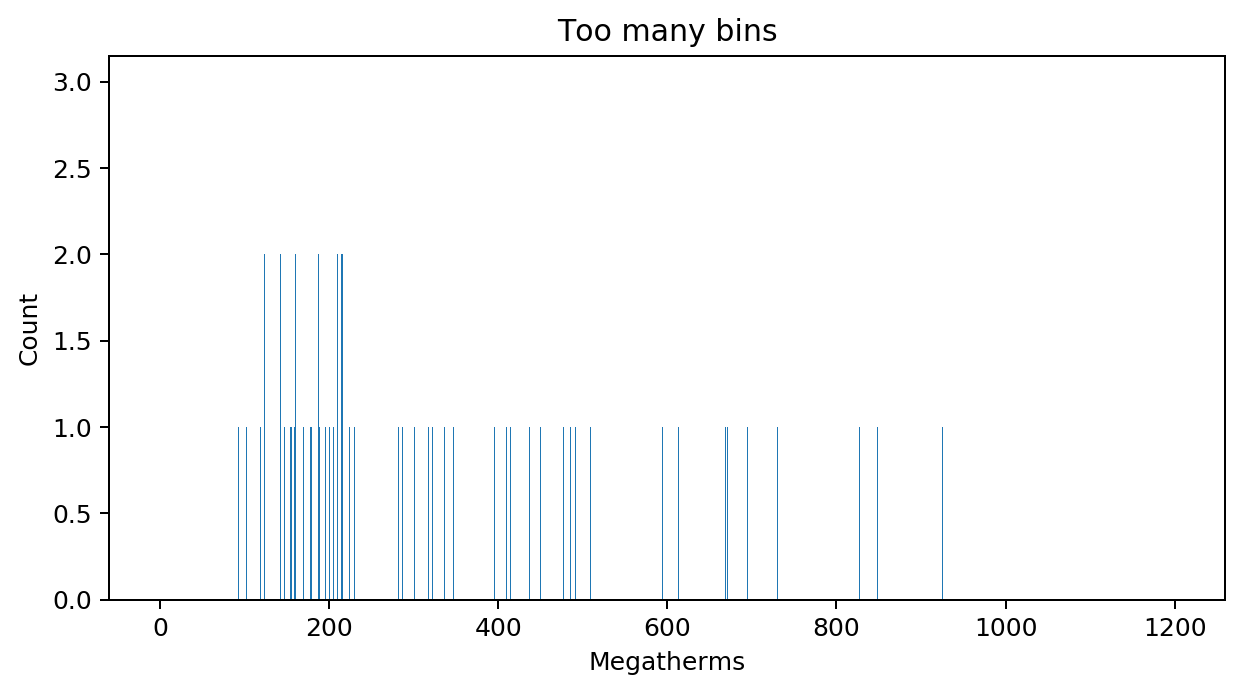

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x, bins = np.linspace(0,1200,2000));
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count")
ax.set_title("Too many bins")

Text(0.5, 1.0, 'Too few bins')

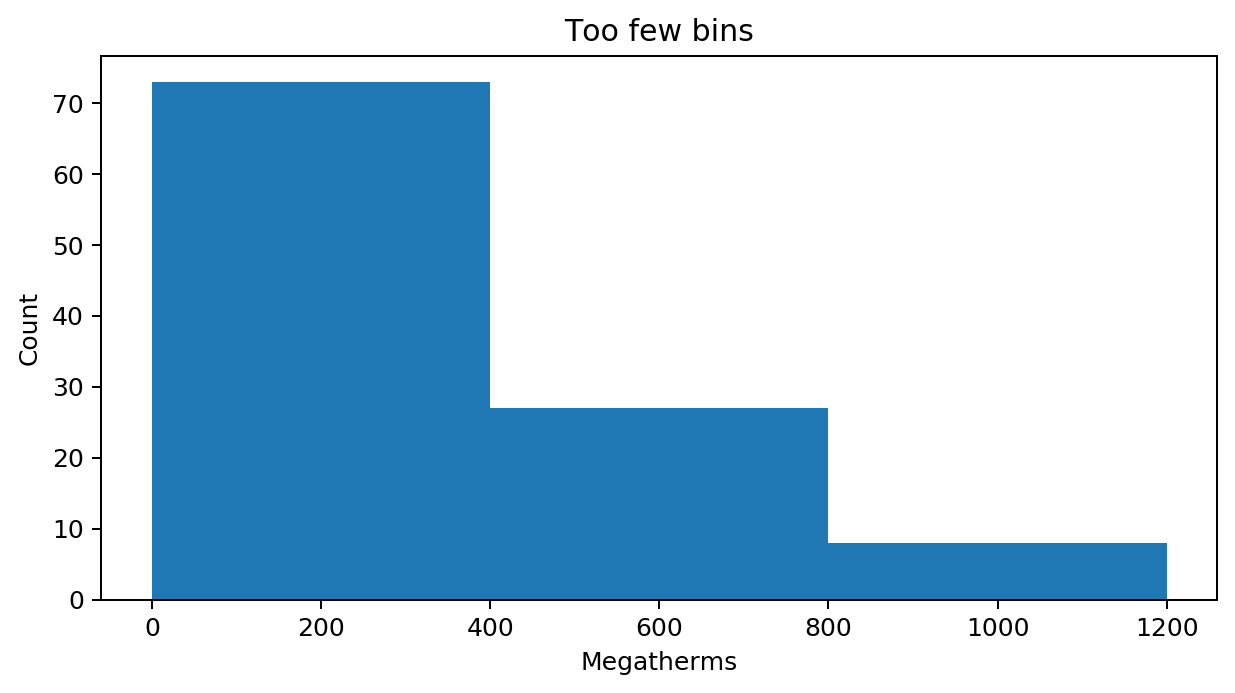

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x, bins = np.linspace(0,1200,4));
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count")
ax.set_title("Too few bins")

If the bins are placed in the wrong area, then they will not capture any meaningful portion of the data.

Text(0.5, 1.0, 'Badly placed bins')

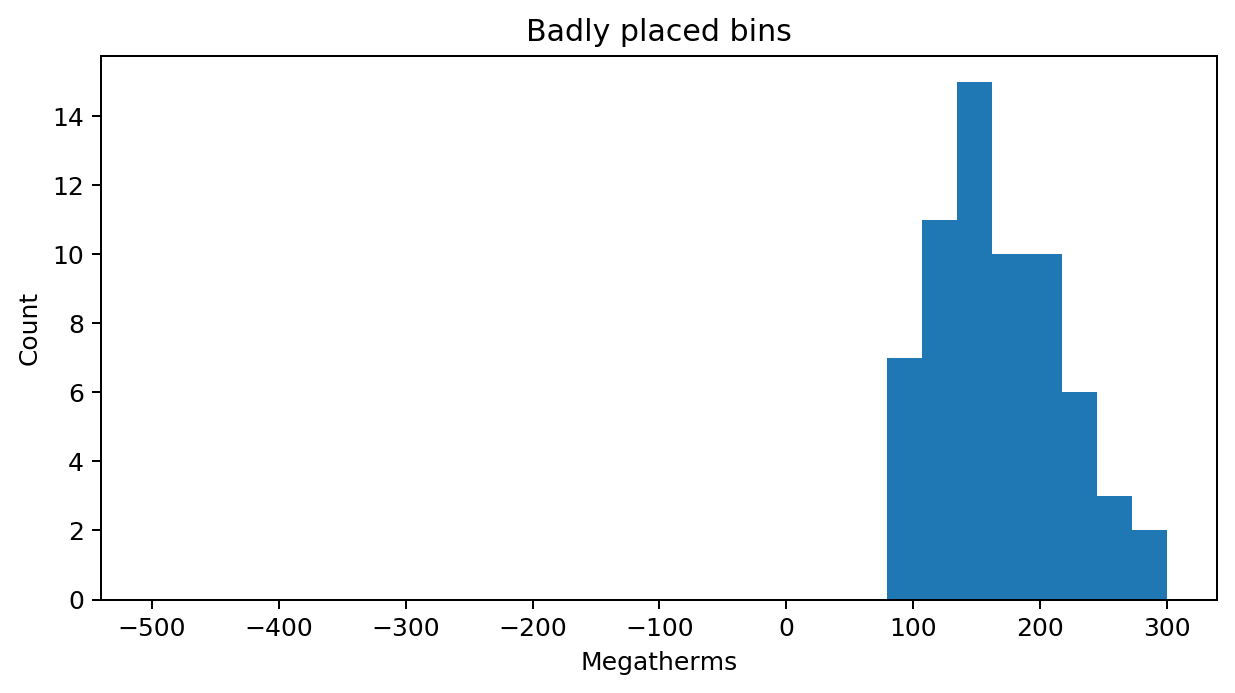

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(x, bins = np.linspace(-500,300,30));
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count")
ax.set_title("Badly placed bins")

Binning can work in any dimension. We'll see in future lectures why this gets less useful as dimension increases, however.

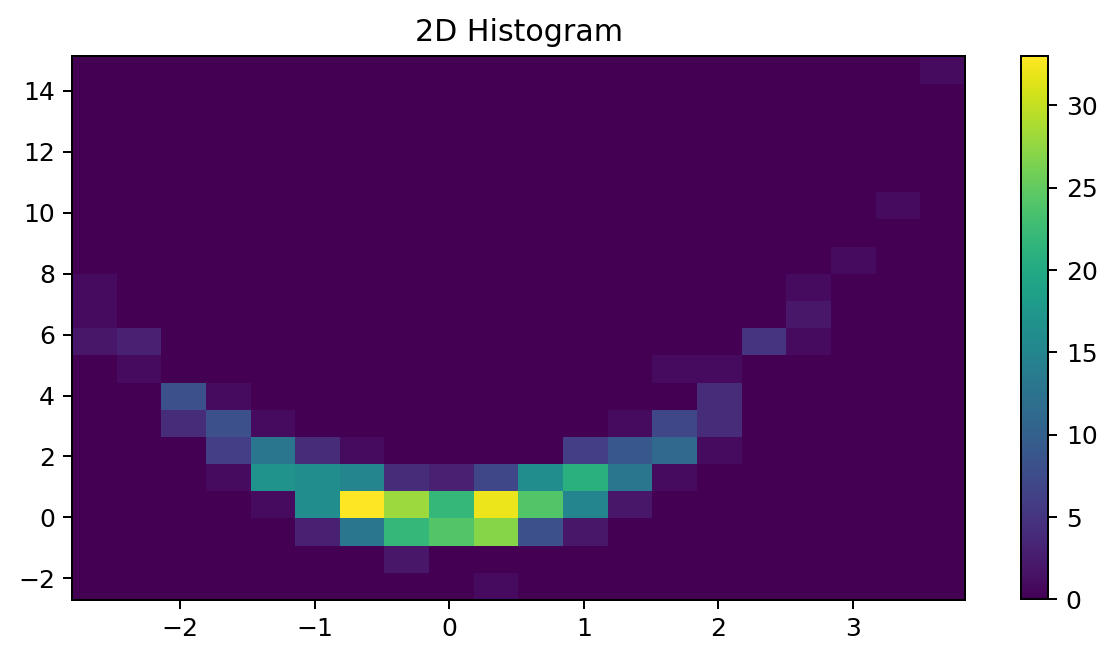

In [40]:
fig = plt.figure()
x = np.random.normal(0,1, (500,))
y = x**2 + np.random.normal(0,0.5, (500,))
ax = fig.add_subplot(1,1,1)
_,_,_,img = ax.hist2d(x,y, bins=(20,20))

ax.set_title("2D Histogram")
fig.colorbar(img)

c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in square
  if __name__ == '__main__':
c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in absolute
  # Remove the CWD from sys.path while we load stuff.
c:\local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


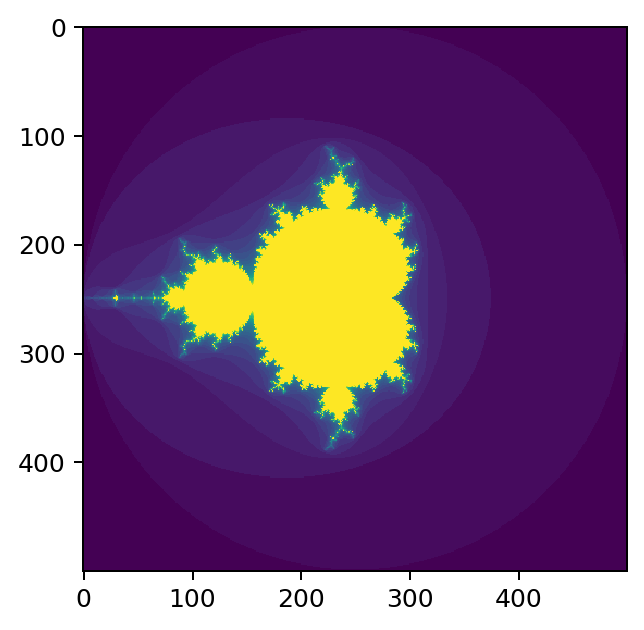

In [41]:
c = np.linspace(-2, 2, 500)
cr, ci = np.meshgrid(c, c)

c = cr + ci * 1j
z = c * 0
m = cr * 0

for i in range(32):
    z = z ** 2 + c
    m = np.where(np.abs(z) < 2, m + 1, m)
    
plt.imshow(m)

## Ranking operations
### Sorted bar chart
An alternative view of a 1D vector is a sorted chart or **rank plot**, which is a plot of a value against its rank within the array. The value-to-rank operation is the **stat** which is applied. 

Text(0.5, 1.0, 'Rank plot (bars)')

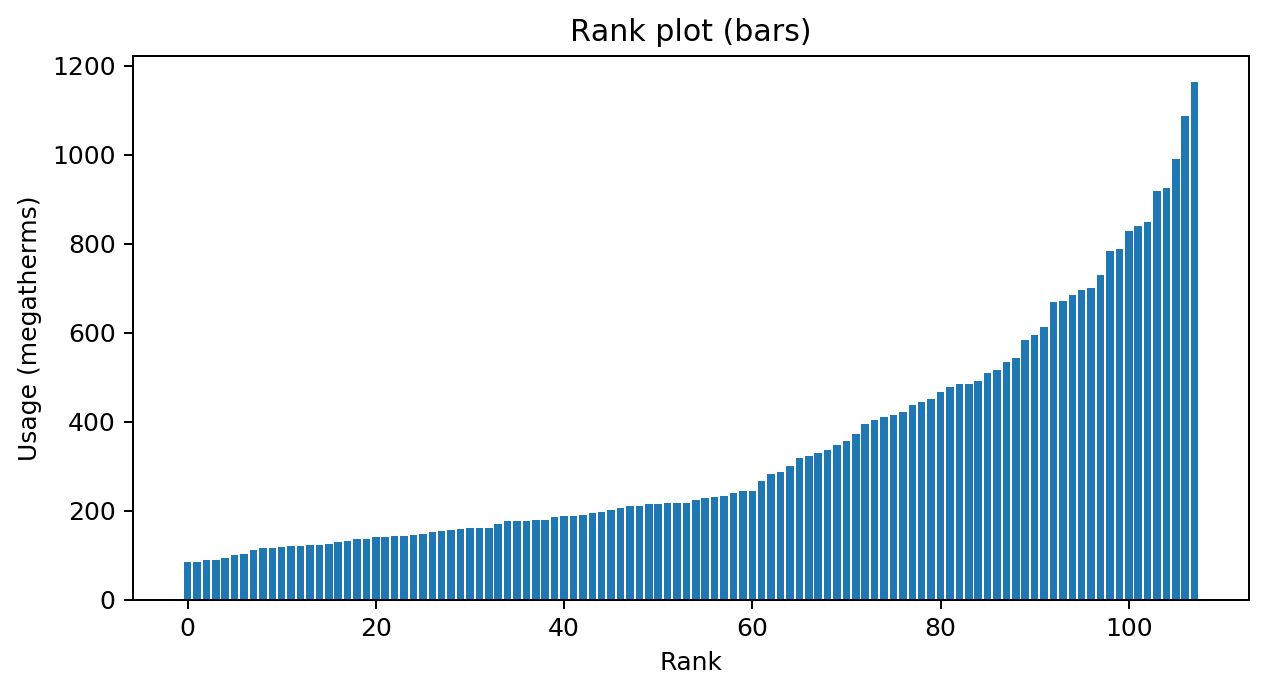

In [42]:
x = gas[:, 2]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(len(x)), np.sort(x))
ax.set_xlabel("Rank")
ax.set_ylabel("Usage (megatherms)")
ax.set_title("Rank plot (bars)")

Text(0.5, 1.0, 'Rank plot (points)')

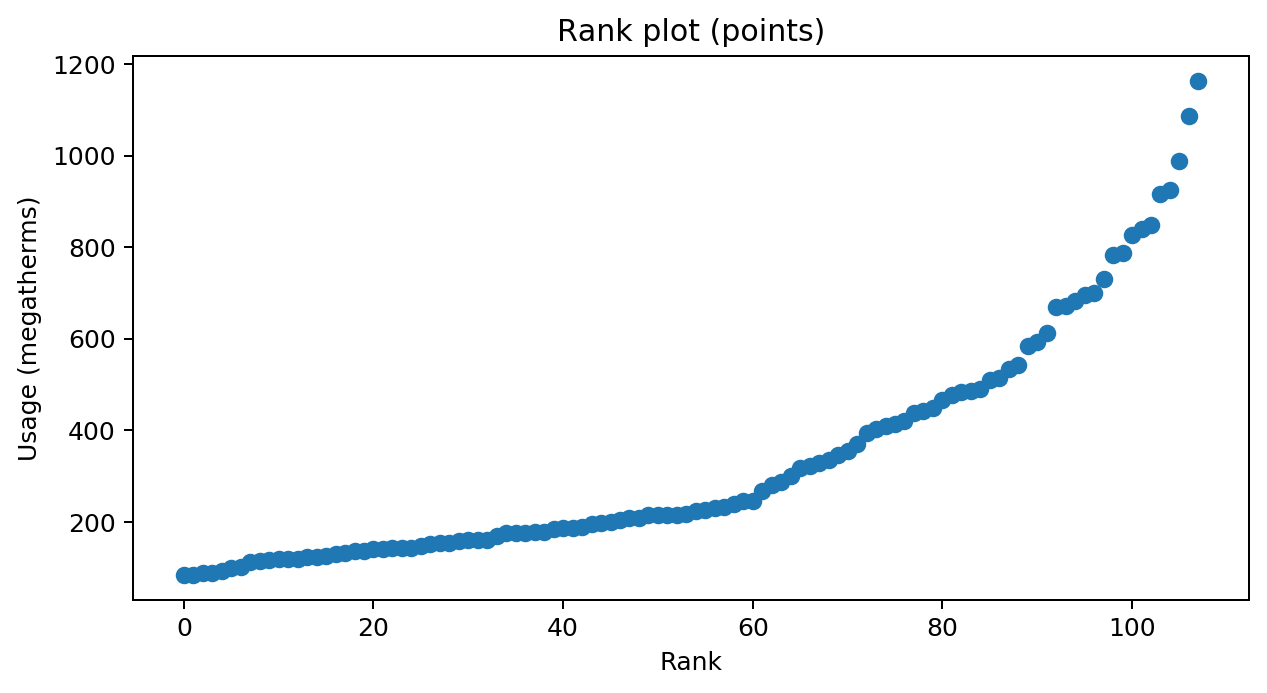

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(x)), np.sort(x), "o")
ax.set_xlabel("Rank")
ax.set_ylabel("Usage (megatherms)")
ax.set_title("Rank plot (points)")

## Aggregate summaries
Any standard summary statistic can be used in a plotting operation. A particularly common statistical transform is to represent ranges of data using either the minimum/maximum, the standard deviation, or the interquartile range. These are often ranges of **groupings** of data (e.g. conditions of an experiment).

The plots below show the gas data, summarised over quarters using three different **stats**:
* mean and standard deviation
* minimum, maximum and arithmetic mean of the minimum and maximum
* median and interquartile range

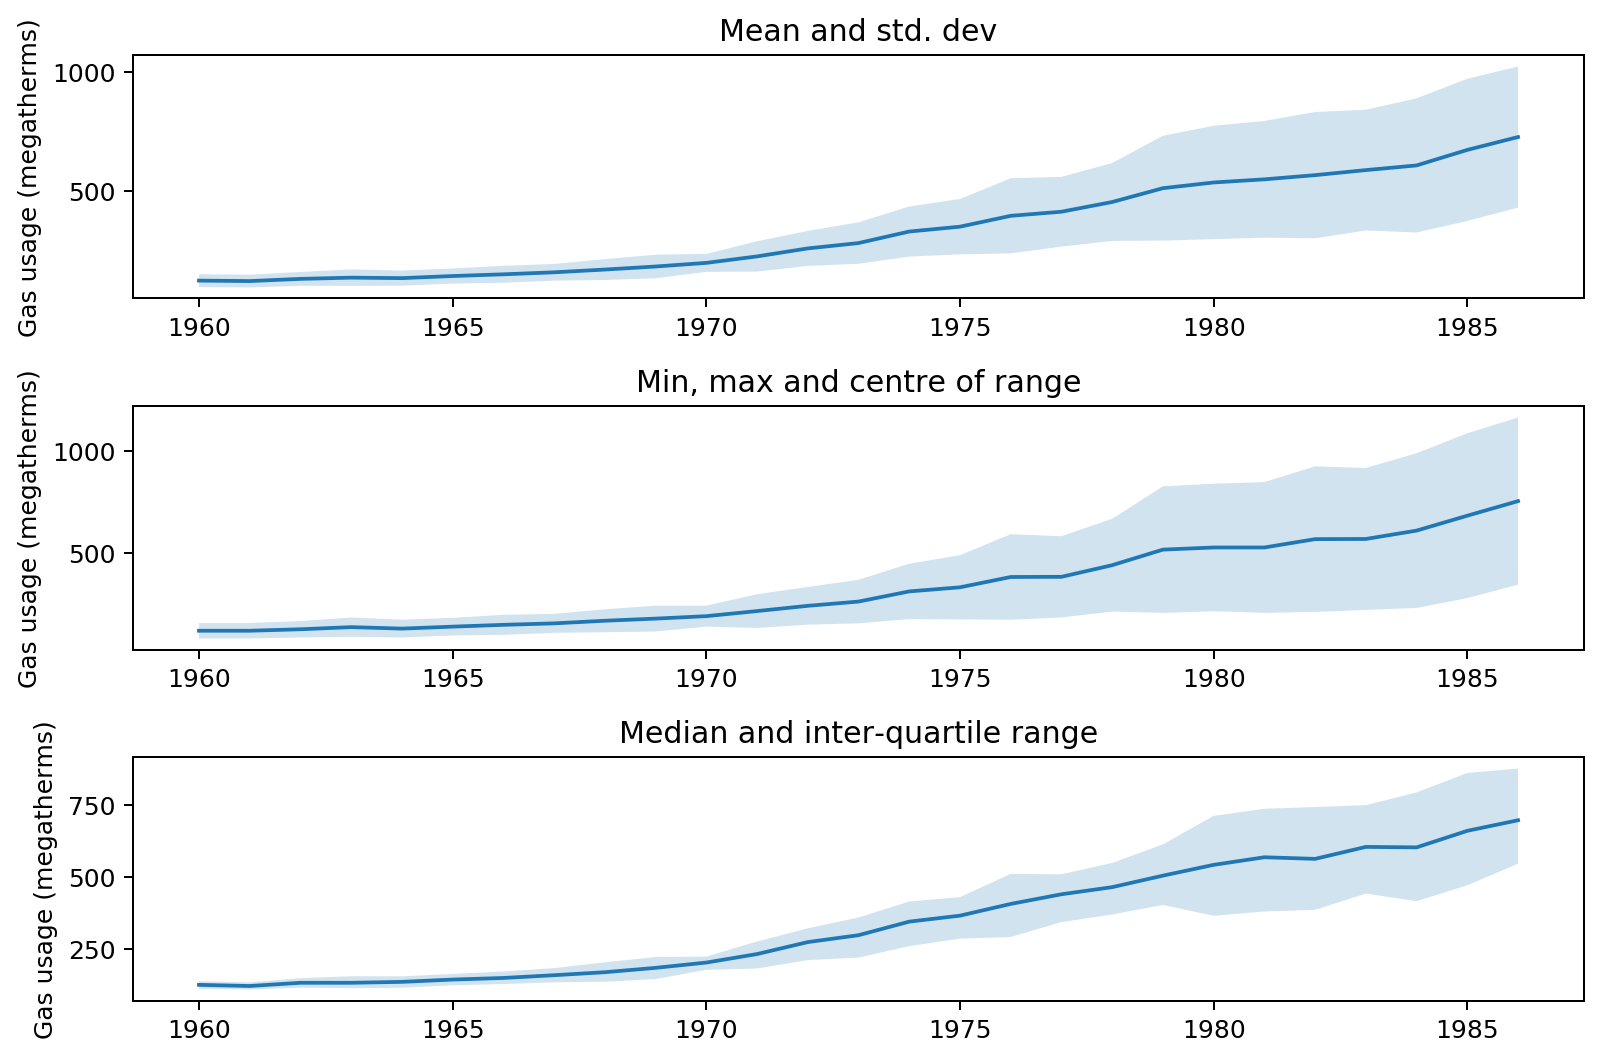

In [44]:
quarters = np.stack([q1,q2,q3,q4])


mean_gas = np.mean(quarters[:,:,2], axis=0)
std_gas = np.std(quarters[:,:,2], axis=0)
                 
max_gas = np.max(quarters[:,:,2], axis=0)
min_gas = np.min(quarters[:,:,2], axis=0)
                 
median_gas = np.median(quarters[:,:,2], axis=0)    
iq1 = np.percentile(quarters[:,:,2], 25, axis=0)
iq2 = np.percentile(quarters[:,:,2], 75, axis=0)


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(3,1,1)
ax.set_title("Mean and std. dev")
ax.set_ylabel("Gas usage (megatherms)")
ax.plot(quarters[0,:,1], mean_gas)
ax.fill_between(quarters[0,:,1], mean_gas+std_gas, mean_gas-std_gas, alpha=0.2)



ax = fig.add_subplot(3,1,2)
ax.set_title("Min, max and centre of range")
ax.set_ylabel("Gas usage (megatherms)")

ax.plot(quarters[0,:,1], (max_gas+min_gas)/2)
ax.fill_between(quarters[0,:,1], max_gas, min_gas, alpha=0.2)


ax = fig.add_subplot(3,1,3)
ax.set_ylabel("Gas usage (megatherms)")
ax.plot(quarters[0,:,1], median_gas)
ax.set_title("Median and inter-quartile range")
ax.fill_between(quarters[0,:,1], iq1, iq2, alpha=0.2)

plt.tight_layout() # fix overlapping plot titles




### Box plot
A **Box plot** (this is actually named after George Box of Box-Cox fame, not because it looks like a box!) is a visual summary of an array of values. It computes multiple **stats** of a dataset, and shows them in a single **geom** which has multiple components.
It is an extremely useful plot for comparing the *distribution* of values.

The value shown are usually:
* the **interquartile range** (the range between the 75% and 25% percentiles of the dataset), shown as a box
* the **median** value, shown as a horizontal line, sometimes with a "notch" in the box at this point.
* the **extrema**, which can vary between plots, but often represent the 2.5% and 98.5% percentiles (i.e. span 95% of the range). They are drawn as *whiskers*, lines with a short crossbar at the end.
* **outliers**, which are all dataset points outside of the extrema, usually marked with crosses or circles.

Text(0.5, 1.0, 'Box plot')

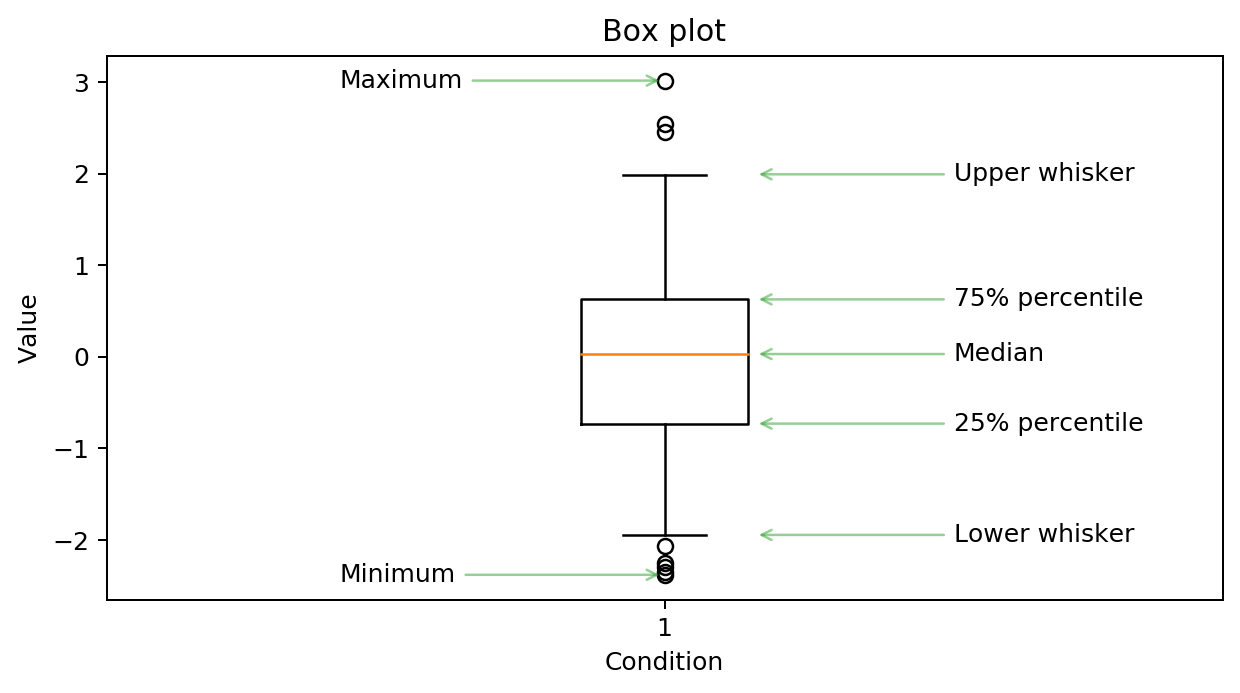

In [45]:
x = np.random.normal(0,1,200)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(x, whis=[2.5, 98.5])
percentiles = np.percentile(x, [2.5, 25, 50, 75, 98.5])
min_x, max_x = np.min(x), np.max(x)

def annotate(y, s, left=False):
    offset = 80 if left else -130
    touch = 1.08 if left else 1.0
    ax.annotate(xy=(touch, y), s=s, xytext=(offset,0), va='center', textcoords='offset points',
           arrowprops = dict(arrowstyle='->', color='C2', alpha=0.5))
    
annotate(min_x, 'Minimum')
annotate(max_x, 'Maximum')
annotate(percentiles[2], 'Median', True)
annotate(percentiles[0], 'Lower whisker', True)
annotate(percentiles[1], '25% percentile', True)
annotate(percentiles[3], '75% percentile', True)
annotate(percentiles[4], 'Upper whisker', True)
ax.set_xlabel("Condition")
ax.set_ylabel("Value")
ax.set_title("Box plot")

The typical use case is to compare multiple vectors; for example two different conditions of an experiment:

Text(0.5, 1.0, 'Box plot comparison')

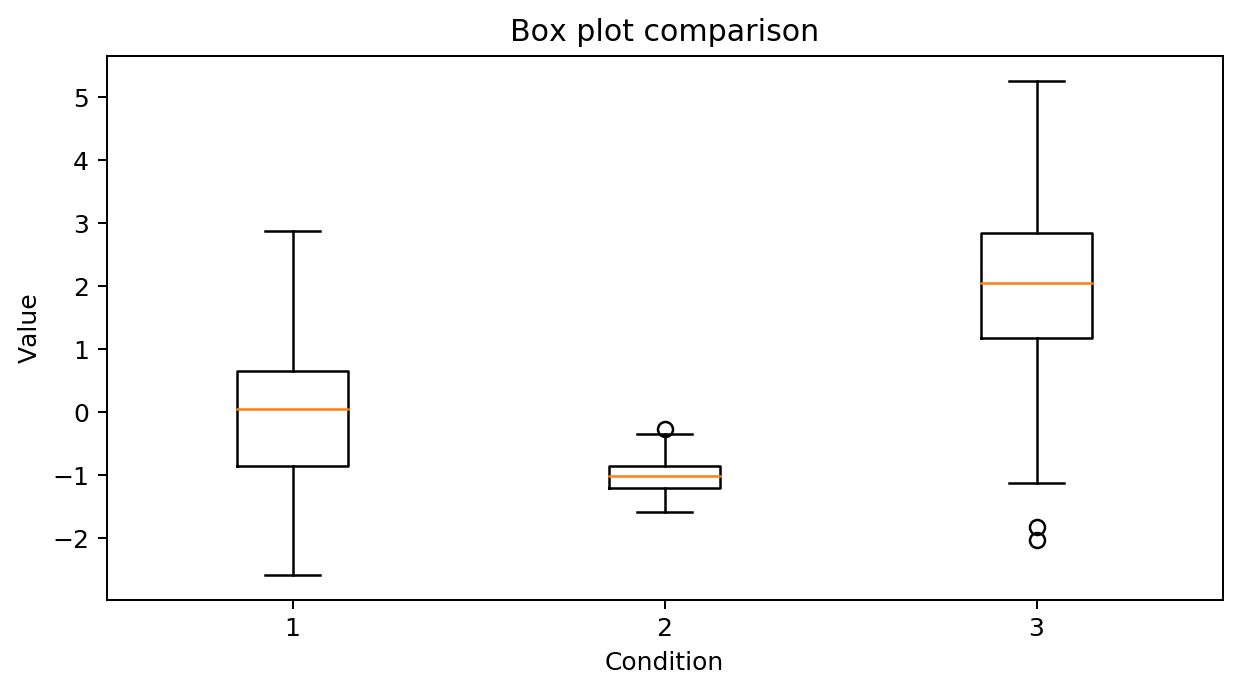

In [46]:
x,y,z = np.random.normal(0,1,200), np.random.normal(-1, 0.25, 200),  np.random.normal(2, 1.25, 200)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot([x,y,z], notch=False, bootstrap=1000)
ax.set_xlabel("Condition")
ax.set_ylabel("Value")
ax.set_title("Box plot comparison")

The notches give an estimate of how representative the median is of the expected population median.

### Violin plot
The **violin plot** extends the Box plot to show the distribution of data more precisely. Rather than just a simple box, the full distribution of data is plotted, using a smoothing technique called a **kernel density estimate**.


In [48]:
import seaborn as sns

Text(0.5, 1.0, 'Violin plot comparison')

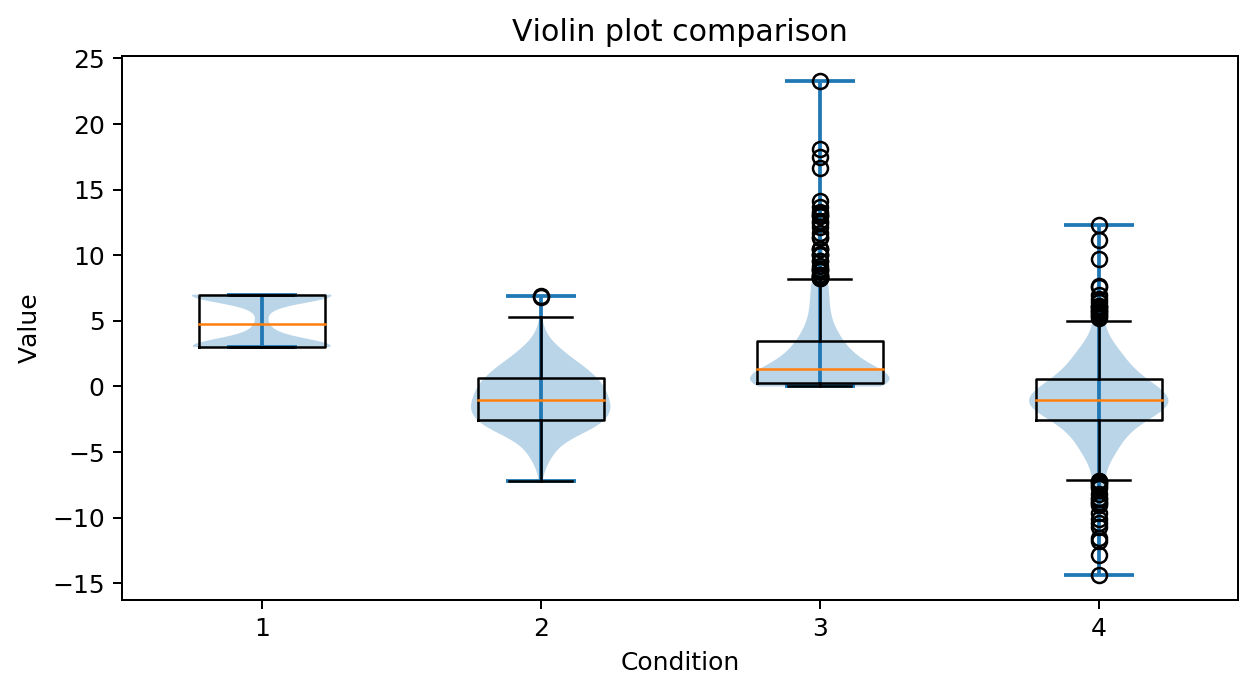

In [49]:
x, y, z, q, = (
    2*np.tanh(np.random.normal(0, 5, 500))+5,
    np.random.normal(-1, 2.25, 500),
    np.random.normal(1, 1.25, 500)**2,
    (np.random.laplace(-1, 2.25, 500))
    ,
)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([x, y, z, q])
ax.boxplot([x, y, z, q])
ax.set_xlabel("Condition")
ax.set_ylabel("Value")
ax.set_title("Violin plot comparison")

## Regression and smoothing
Regression involves finding an **approximating** function to some data; usually one which is *simpler* in some regard. The most 
familiar is **linear regression** -- fitting a line to data. 

$$ f(x) = mx + c,\   f(x) \approx y $$

We will not go into how such fits are computed here, but they are an important class of **stats** for proposing hypotheses which might *explain* data.


Text(0.5, 1.0, 'UK Gas usage 1960')

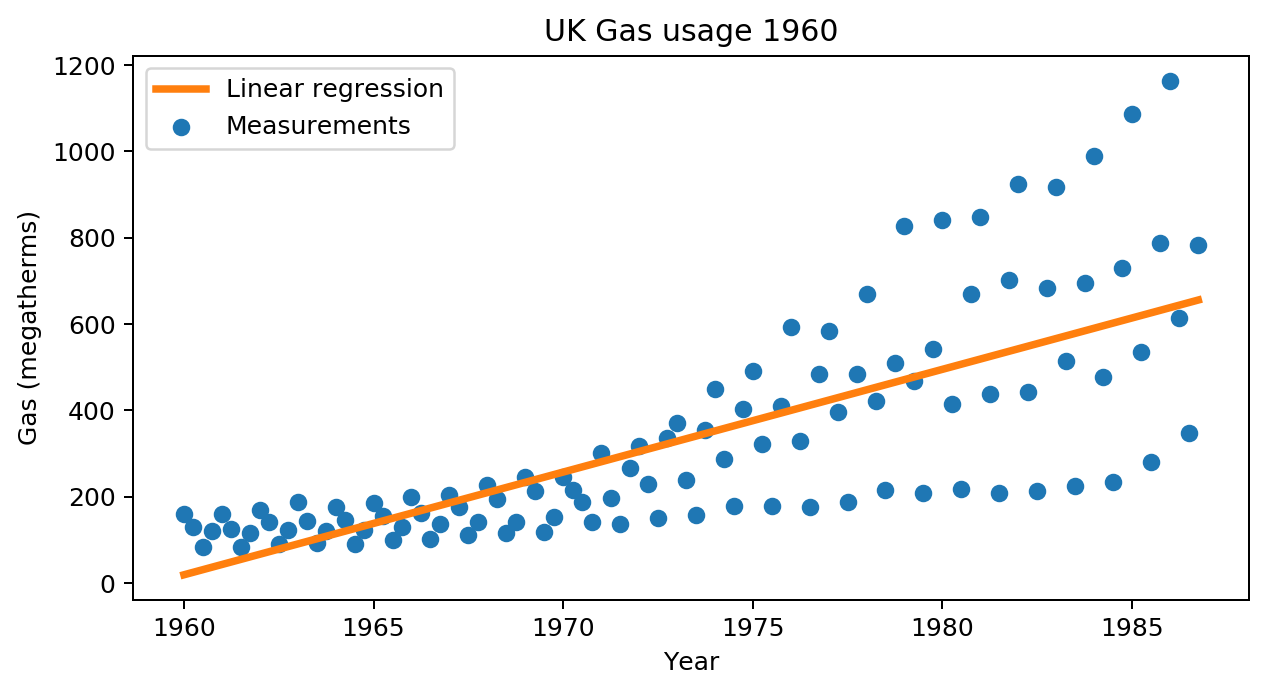

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

import scipy.stats
slope, intercept, r, p, sem = scipy.stats.linregress(gas[:,1], gas[:,2])

ax.scatter(gas[:,1], gas[:,2], label="Measurements")
ax.plot(gas[:,1], slope*gas[:,1]+intercept, label="Linear regression", color='C1', lw=3)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel("Gas (megatherms)")
ax.set_title("UK Gas usage 1960")

### Smoothing
Likewise, the moving average smoother we saw in the earlier gas example finds a "simplified" version of the data by removing fast changes in the values. There are many ways of smoothing data, all of which imply some assumption about how the data should behave. A good smoothing of data reveals the attributes of interest to the reader and obscures irrelevant details.

Text(0.5, 1.0, 'UK gas usage 1960-1986, 3 yr running mean')

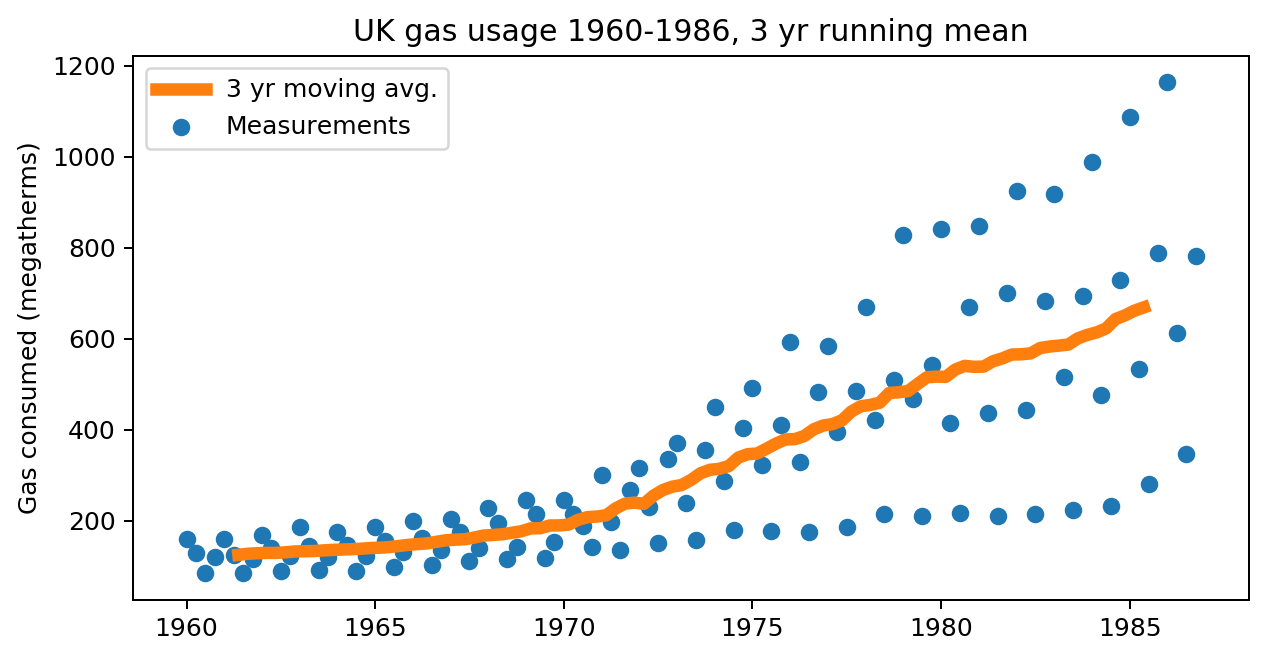

In [51]:
# use the xkcd style

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# don't worry how this works: but it computes a 12 element
# running mean of the data
N = 12
smoothed = np.convolve(gas[:, 2], np.ones((N,)) / N, mode="valid")
smoothed_t = np.convolve(gas[:, 1], np.ones((N,)) / N, mode="valid")
ax.plot(smoothed_t, smoothed, linewidth=5, label="3 yr moving avg.", c='C1')
ax.scatter(gas[:, 1], gas[:, 2], label="Measurements")
ax.legend()
ax.set_ylabel("Gas consumed (megatherms)")
ax.set_title("UK gas usage 1960-1986, 3 yr running mean")

----

# Geoms

### Markers
Markers are *geoms* that represent bare points in a coordinate system. These typically as a visual record of an discrete **observation**. In the simplest case, they are literally just points marked on a graph; however, they typically convey more information.
There are several important uses of markers:

#### Layer identification
The geom used for marking points can be used to differentiate different layers in a plot. Both the shape and the colouring can be modified to distinguish layers. Excessive numbers of markers quickly become hard to read!

<img src="imgs/marker_reference.png">

*Image: markers available in Matplotlib. [Adapted from the Matplotlib documentation]
(https://matplotlib.org/examples/lines_bars_and_markers/marker_reference.html)*


Text(0.5, 1.0, 'Layers denoted by marker geometry')

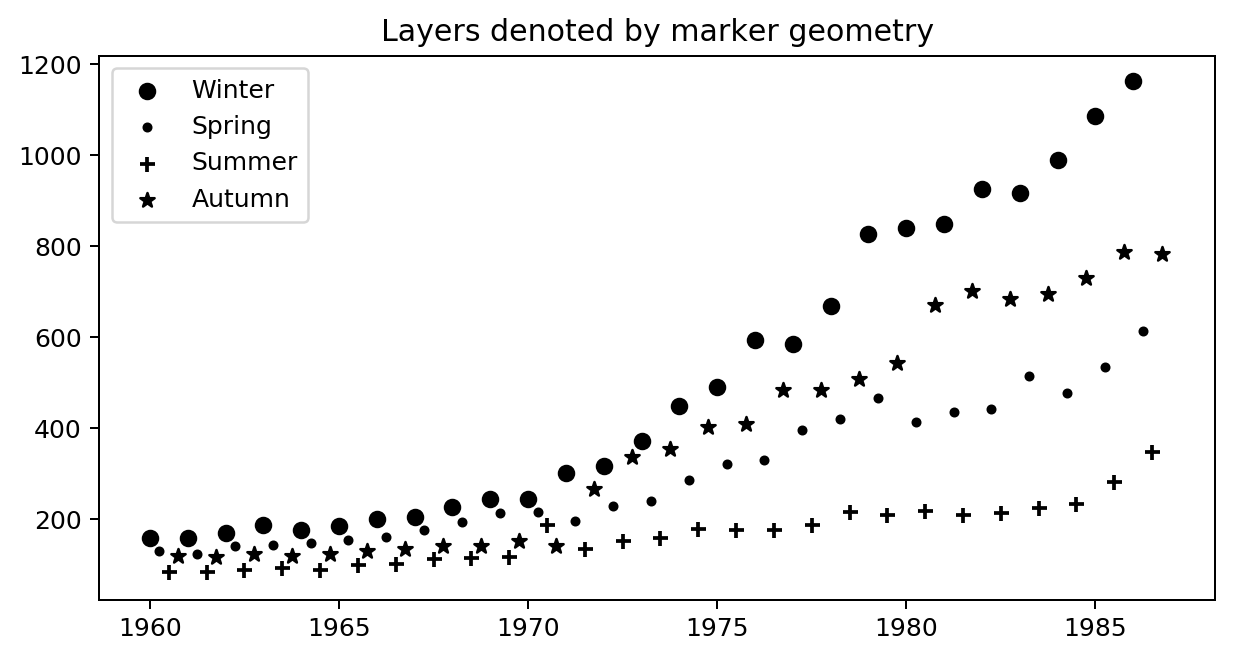

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


q1 = gas[::4, :]
q2 = gas[1::4, :]
q3 = gas[2::4, :]
q4 = gas[3::4, :]

ax.scatter(q1[:, 1], q1[:, 2], label="Winter", marker="o", color="k")
ax.scatter(q2[:, 1], q2[:, 2], label="Spring", marker=".", color="k")
ax.scatter(q3[:, 1], q3[:, 2], label="Summer", marker="+", color="k")
ax.scatter(q4[:, 1], q4[:, 2], label="Autumn", marker="*", color="k")
ax.legend()
ax.set_title("Layers denoted by marker geometry")

Text(0.5, 1.0, 'Layers denoted by marker colour')

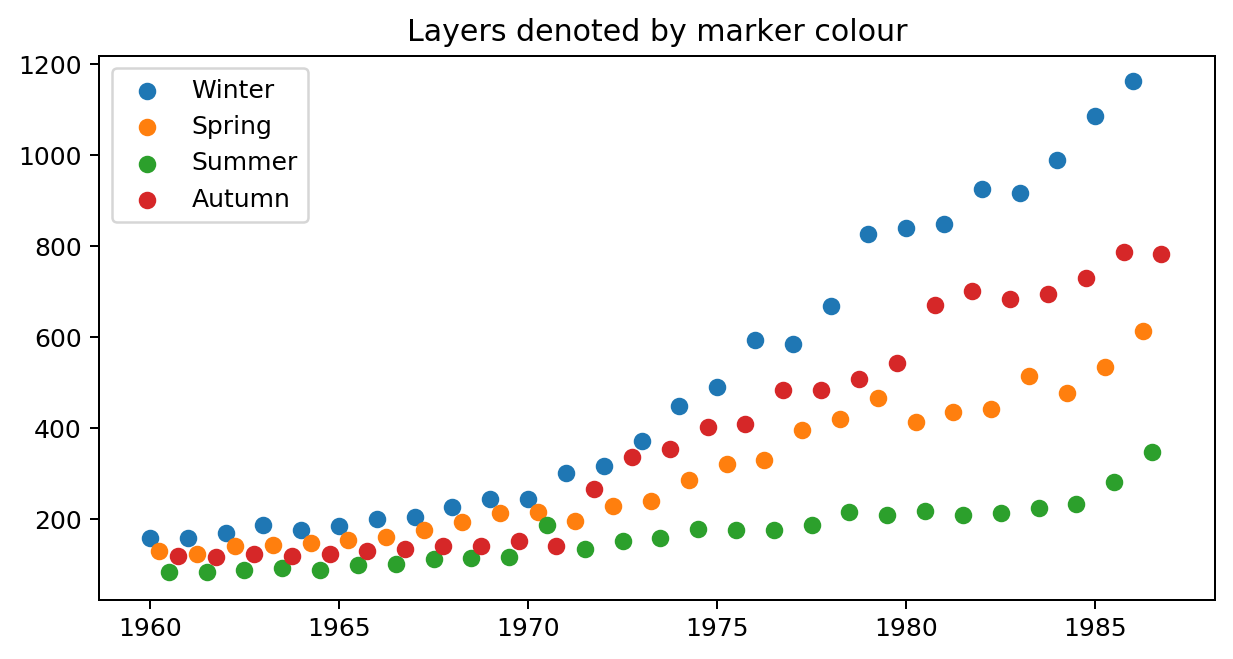

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(q1[:,1], q1[:,2], label='Winter', marker='o', color='C0')
ax.scatter(q2[:,1], q2[:,2], label='Spring', marker='o', color='C1')
ax.scatter(q3[:,1], q3[:,2], label='Summer', marker='o', color='C2')
ax.scatter(q4[:,1], q4[:,2], label='Autumn', marker='o', color='C3')
ax.legend()
ax.set_title("Layers denoted by marker colour")

## Colour choices
Choosing good colour for plots is essential in comprehension. Care should be taken if plots may be viewed in black and white printouts, where colour differences will become differences in shade alone.  Also, a significant portion of the population suffers from some form of colour blindness, and pure colour distinctions will not be visible to these readers.


## Markers: Scalar attributes
Markers can also be used to display a *third* or event *fourth* scalar attribute, instead of identifying layers in a plot. In this case we, are not visualising just a pair of vectors $\vec{x}, \vec{y}$, but $\vec{x}, \vec{y}, \vec{z}$ or possibly $\vec{x}, \vec{y}, \vec{z}, \vec{w}$. This is done by modulating the *scaling* or *colouring* of each marker. 

The plots below show measurements of earthquakes around Fiji. Each measurement has a 2D position (on the surface of the Earth), a depth (in km below surface) and a magnitude (in the Richter scale), for a total of four variables.

In [53]:
# earthquake data
# columns
# lat,long,depth,mag,n_stations
quakes = np.loadtxt("data/quakes.txt")

Text(0, 0.5, 'Latitude')

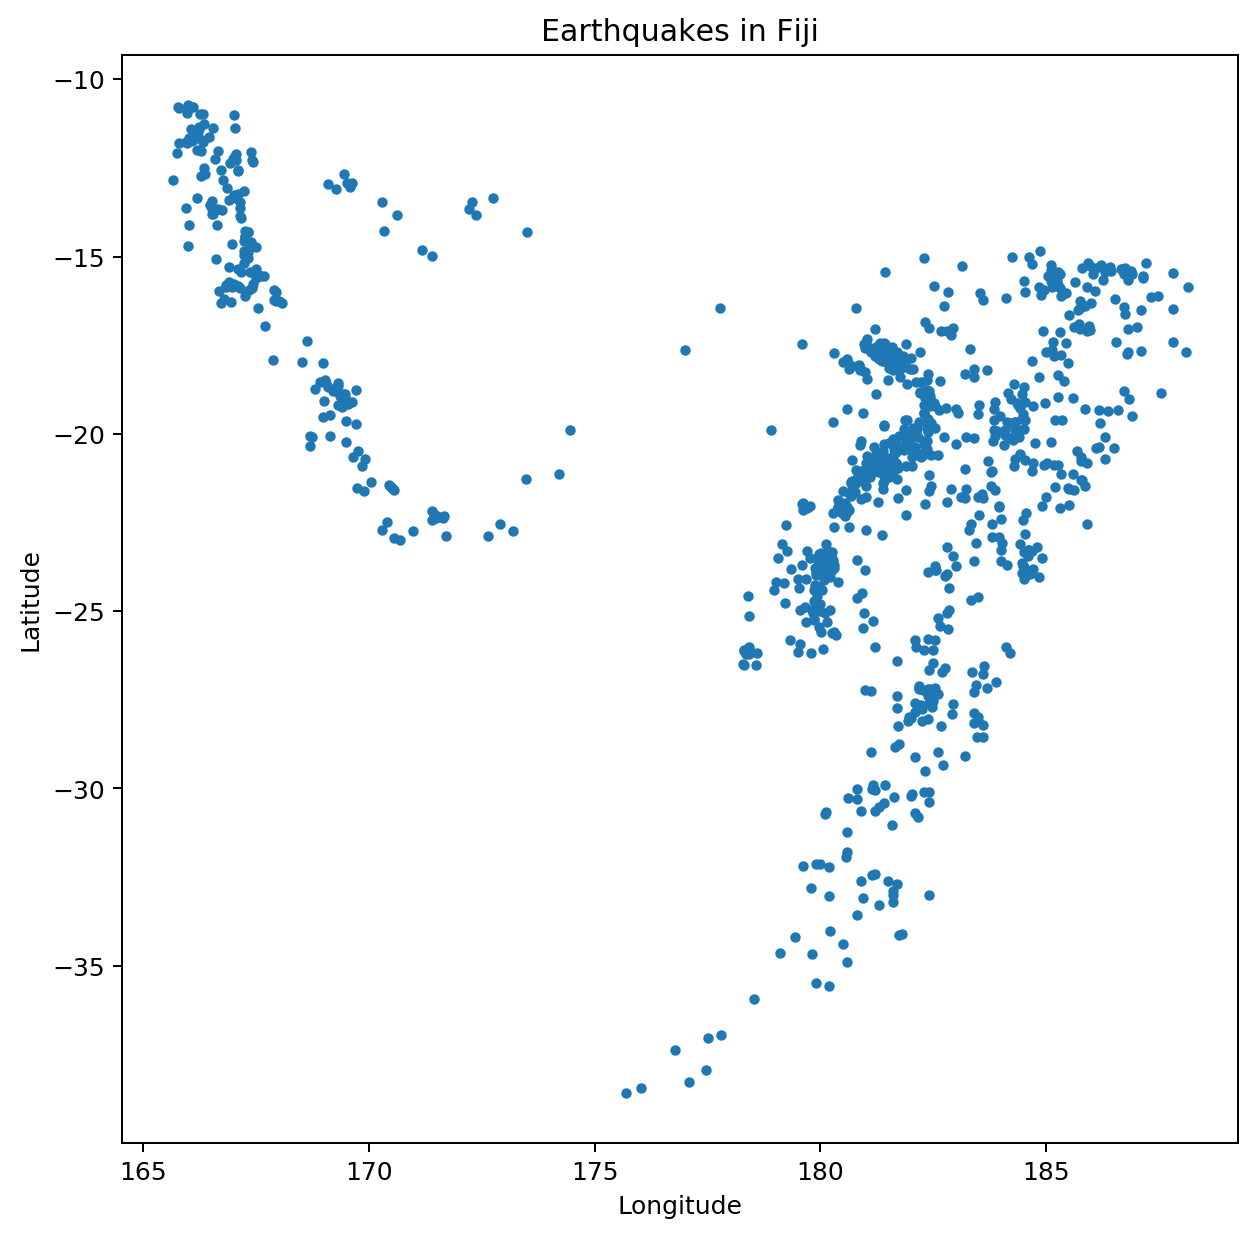

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
paths = ax.scatter(quakes[:, 1], quakes[:, 0], s=10)
ax.set_title("Earthquakes in Fiji")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

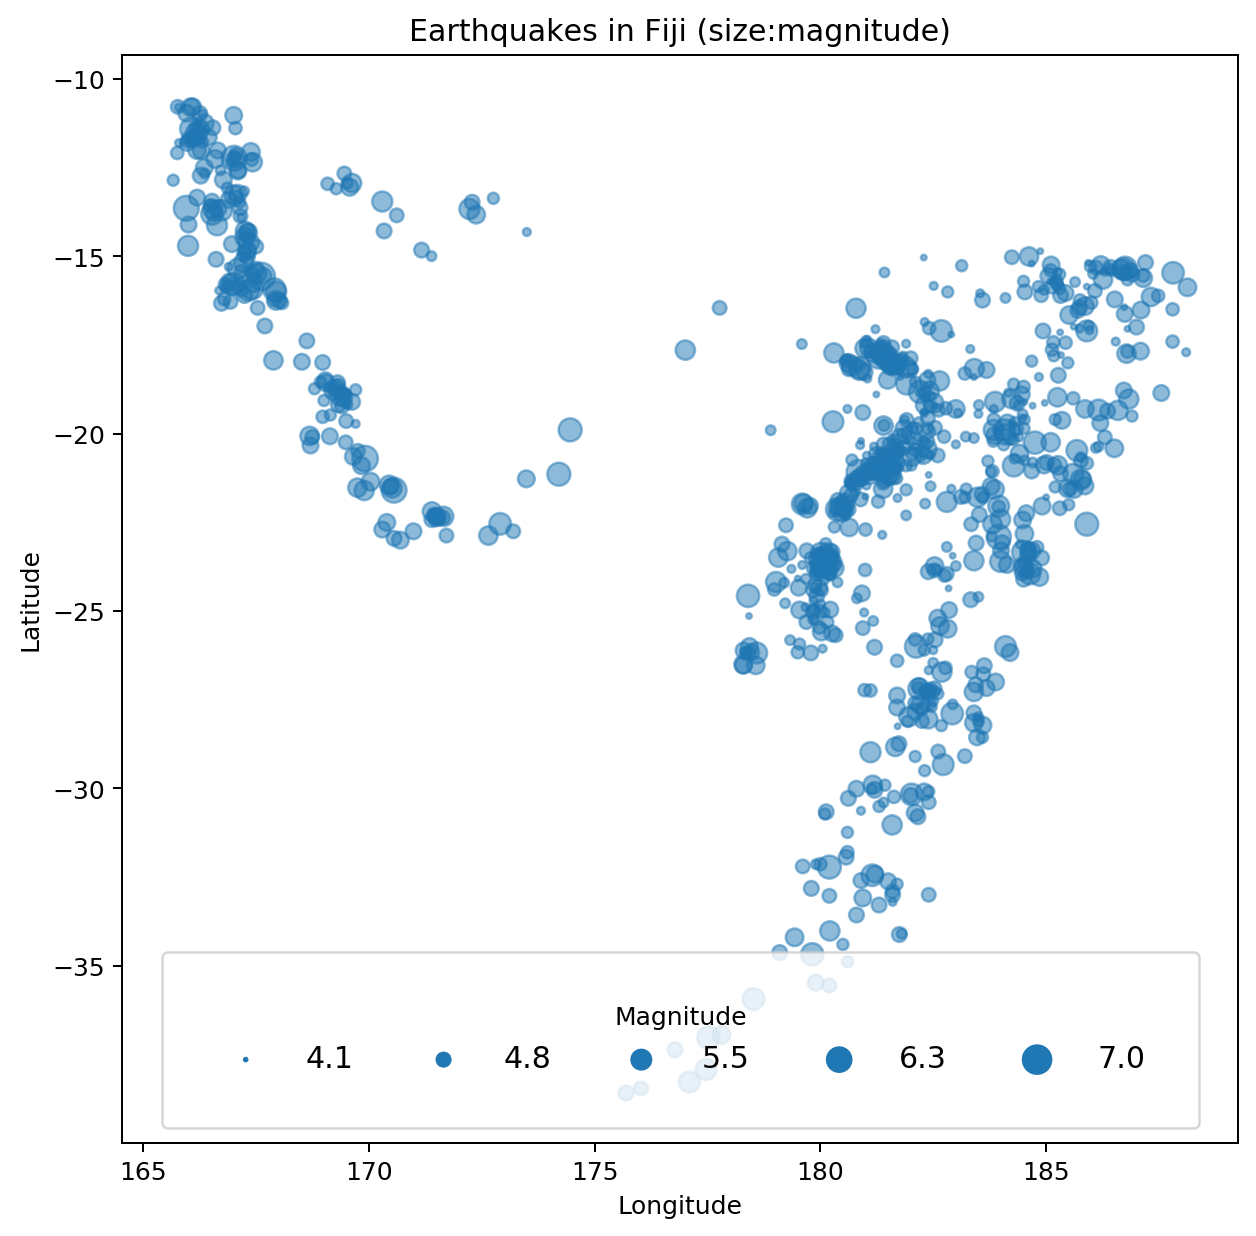

In [55]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
sizes = (quakes[:, 3] - 4.0) * 50
paths = ax.scatter(quakes[:, 1], quakes[:, 0], s=sizes, alpha=0.5)
ax.set_title("Earthquakes in Fiji (size:magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# generate a legend for the scales of markers
def scale_bar(real_scale, visual_scale):
    ls = []
    for scale in visual_scale:
        l = ax.scatter([], [], s=scale, edgecolors="none", facecolors="C0")
        ls.append(l)
    labels = ["%.1f" % i for i in real_scale]
    leg = ax.legend(
        ls,
        labels,
        ncol=len(real_scale),
        frameon=True,
        fontsize=12,
        handlelength=2,
        loc=8,
        borderpad=1.8,
        handletextpad=1,
        title="Magnitude",
        scatterpoints=1,
    )


scale_bar(np.linspace(4.1, 7.0, 5), np.linspace(5.0, 150.0, 5))

Text(0, 0.5, 'Latitude')

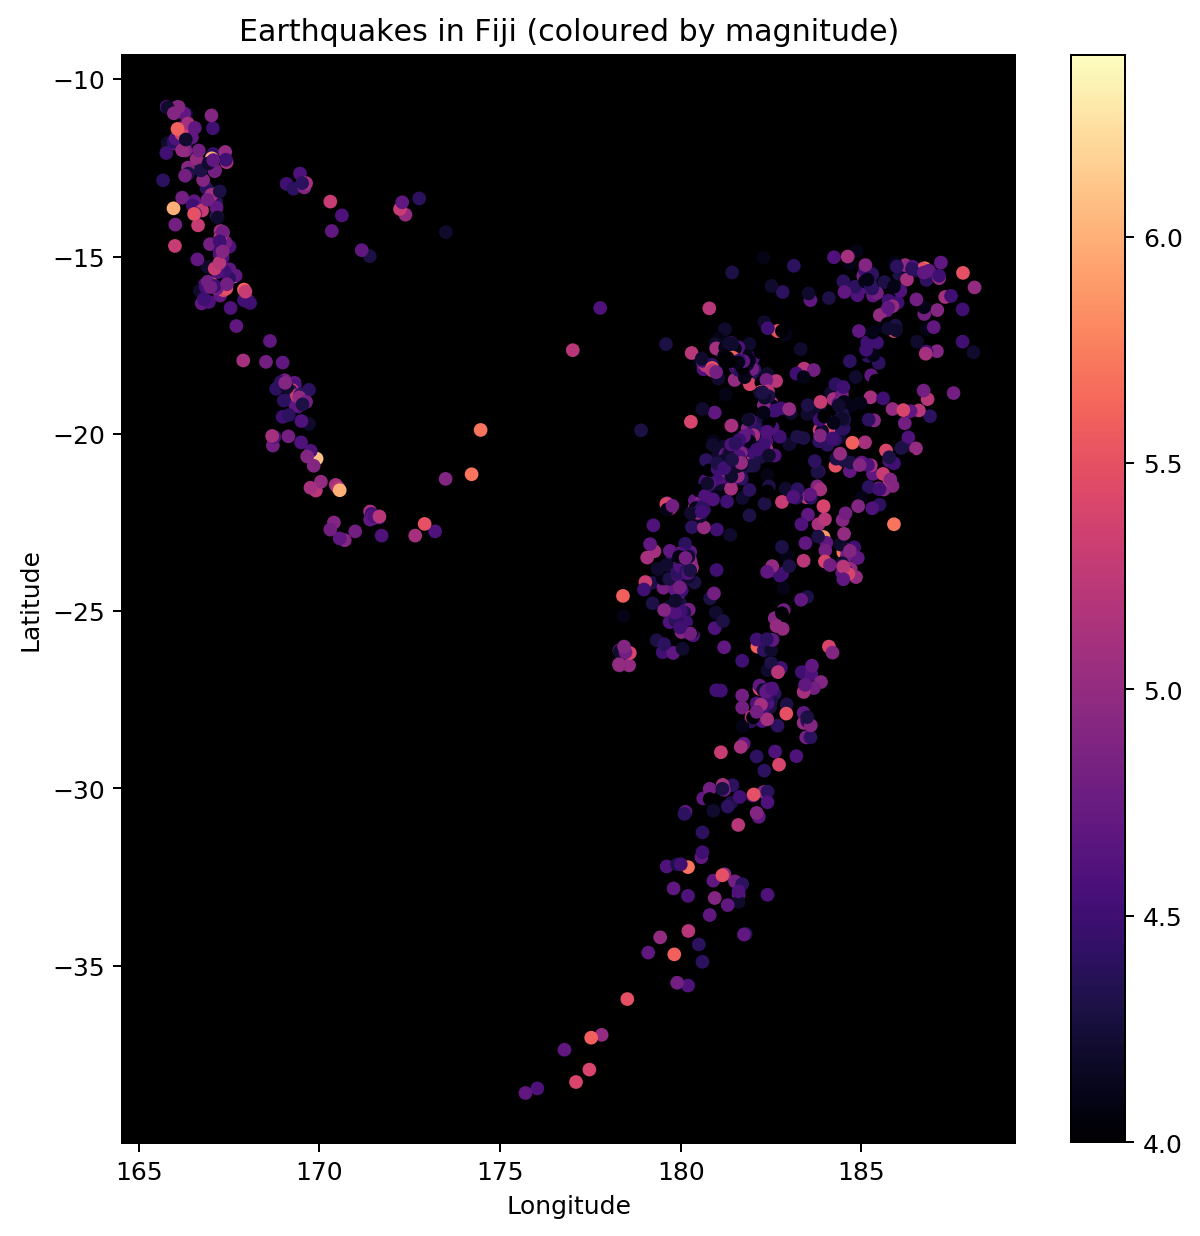

In [56]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("black")
paths = ax.scatter(quakes[:, 1], quakes[:, 0], c=quakes[:, 3], cmap="magma", s=20)
fig.colorbar(paths)
ax.set_title("Earthquakes in Fiji (coloured by magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

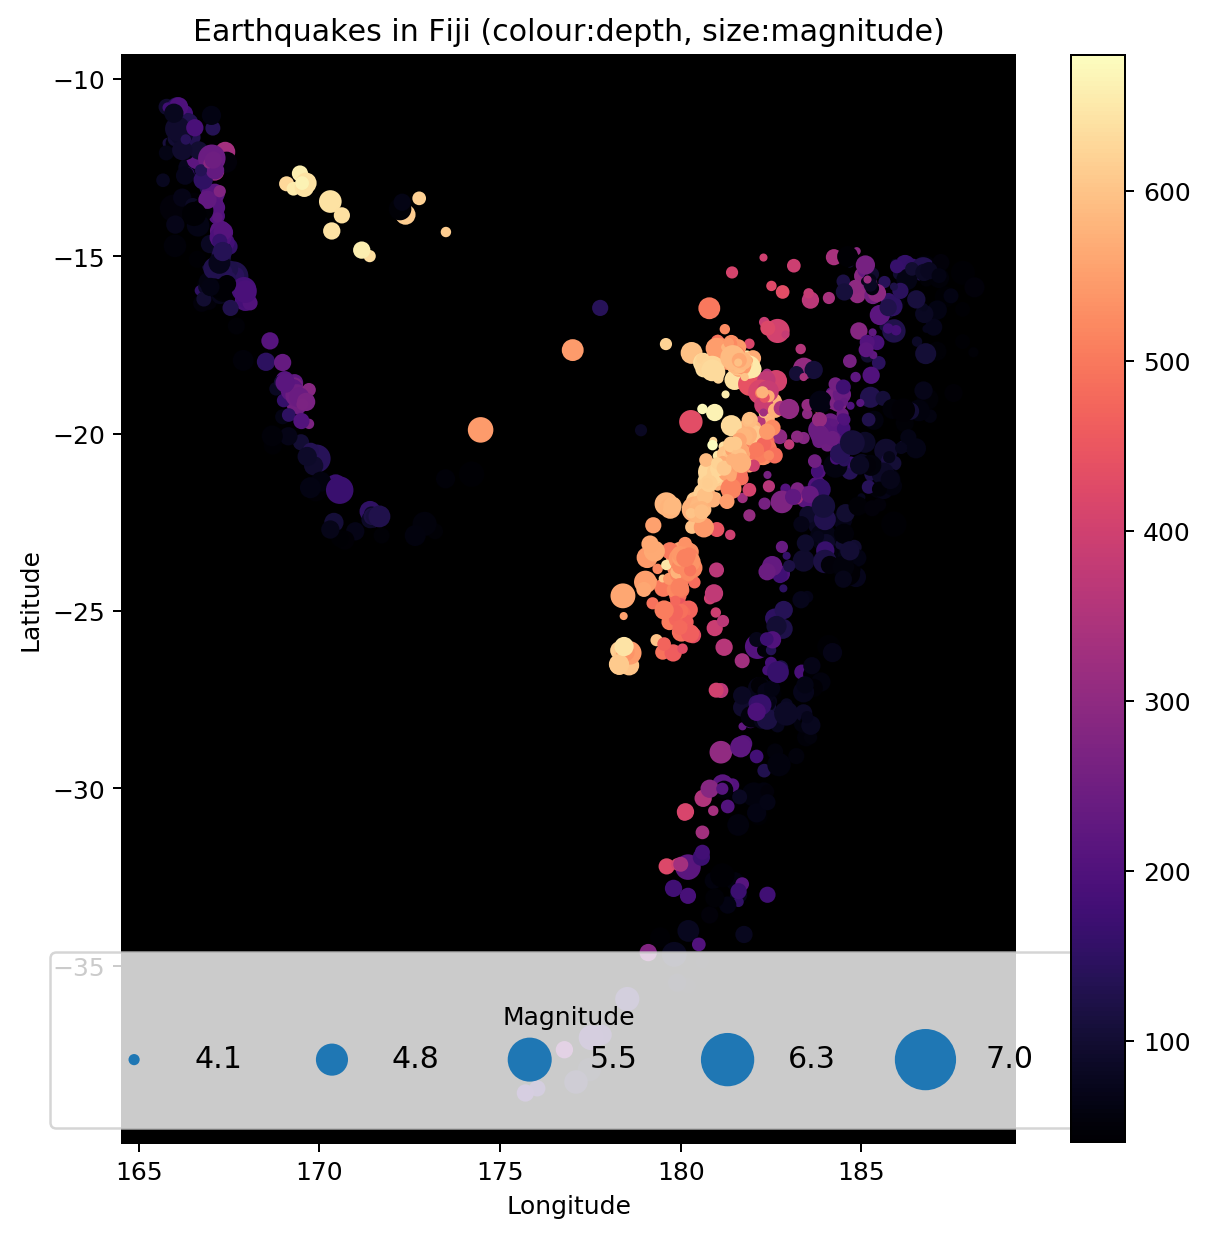

In [57]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("black")
paths = ax.scatter(quakes[:, 1], quakes[:, 0], c=quakes[:, 2], s=sizes, cmap="magma")
fig.colorbar(paths)
ax.set_title("Earthquakes in Fiji (colour:depth, size:magnitude)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
scale_bar(np.linspace(4.1, 7.0, 5), np.linspace(20.0, 600.0, 5))

#### Colour maps

Colouring of markers is done via a **colour map**, which maps scalar values to colours. 

Colour maps should always be presented with a **colour bar** which shows the mapping of values to colours. This is an example of a **guide** used for an aesthetic **mapping** beyond the 2D coordinate system.


The colour map choice is important. A colour map maps a continuous variable $x$ to a colour, usually specified in the form of (red,green,blue) triplets. There are many choices for this mapping, but only a few *good* ones.

<img src="imgs/colormaps.png">

*Image: colormaps in matplotlib. Adapted from the [matplotlib documentation](https://matplotlib.org/examples/color/colormaps_reference.html)*


### Unsigned scalar
* If the data to be represented is a positive scalar (e.g. heights of people), use a colour map with **monotonically varying brightness**. This means that as the attribute increases, the colour map should get consistently lighter or darker.  `viridis` is good, as is `magma`. These are **perceptually uniform**, such that a change in value corresponds to a perceptually uniform change in intensity across the whole scale (the human visual system is very nonlinear, and these scales compensate for this nonlinearity). Grayscale or monochrome maps can be used, but colours with brightness+hue are often easier to interpret.

* **monotonic brightness** increasing data value always leads to an increase in visual brightness
* **perceptually uniform** a constant interval increase in data value leads to a perceptually constant increase in value.

### Perceptual linearity

<img src="imgs/mpl_colormaps.png">

**Colormaps shown in grayscale. Good scales should be monotonic (i.e. always increase/decrease in brightness)**

<img src="imgs/nonlinear_jet.png">

**BAD and NONLINEAR: the notches do not appear to be even**

<img src="imgs/linear_colors.jpg">

**GOOD and LINEAR: notches are even**



#### Colour map examples

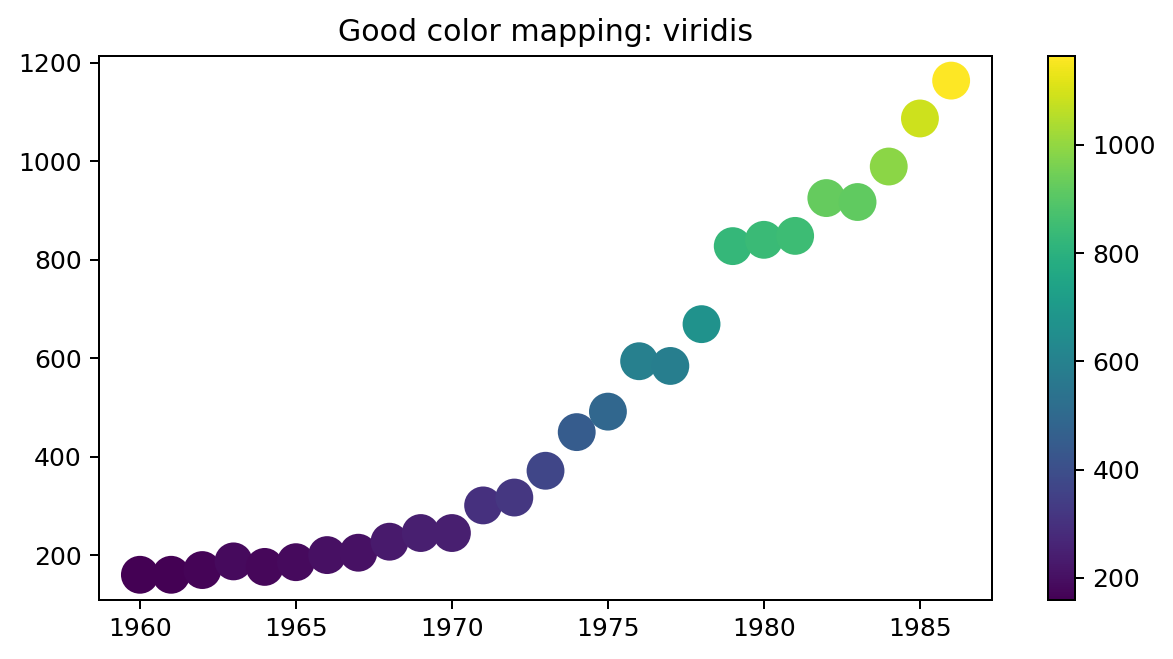

In [58]:
def plot_w_colorbar(x,y,cmap,title):    
    # chunky marker plot, using coloured markers with the given colour map
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    paths = ax.scatter(x, y, c=y, cmap=cmap, s=200)
    fig.colorbar(paths)
    ax.set_title(title)

plot_w_colorbar(q1[:,1], q1[:,2], cmap='viridis', title='Good color mapping: viridis')

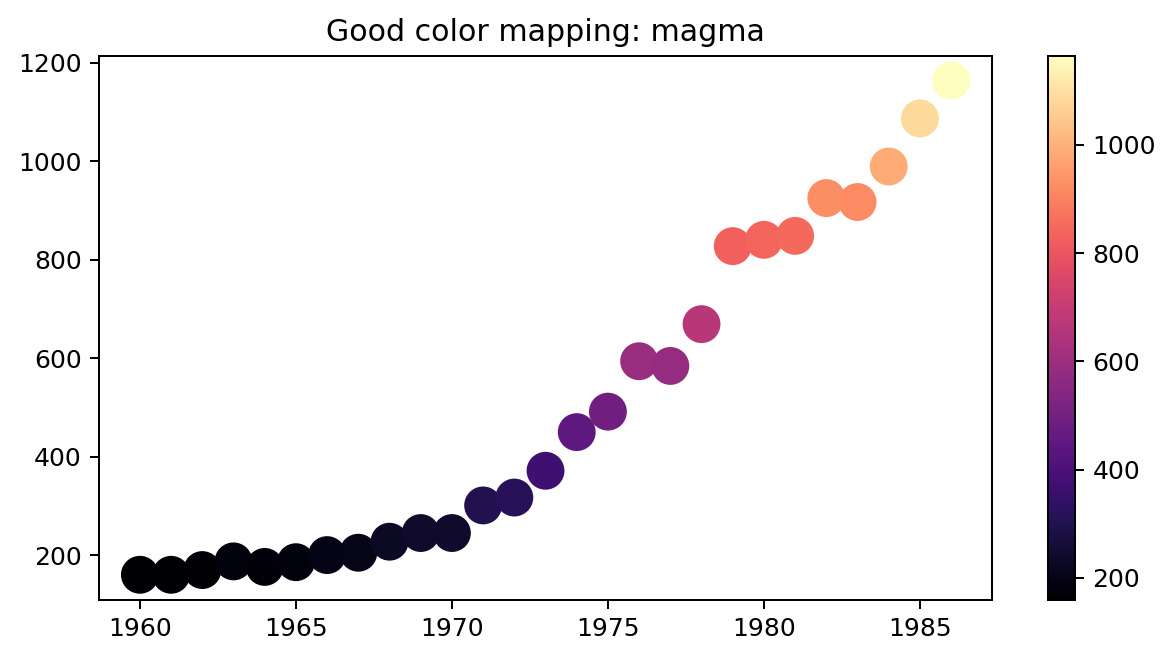

In [59]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='magma', title='Good color mapping: magma')

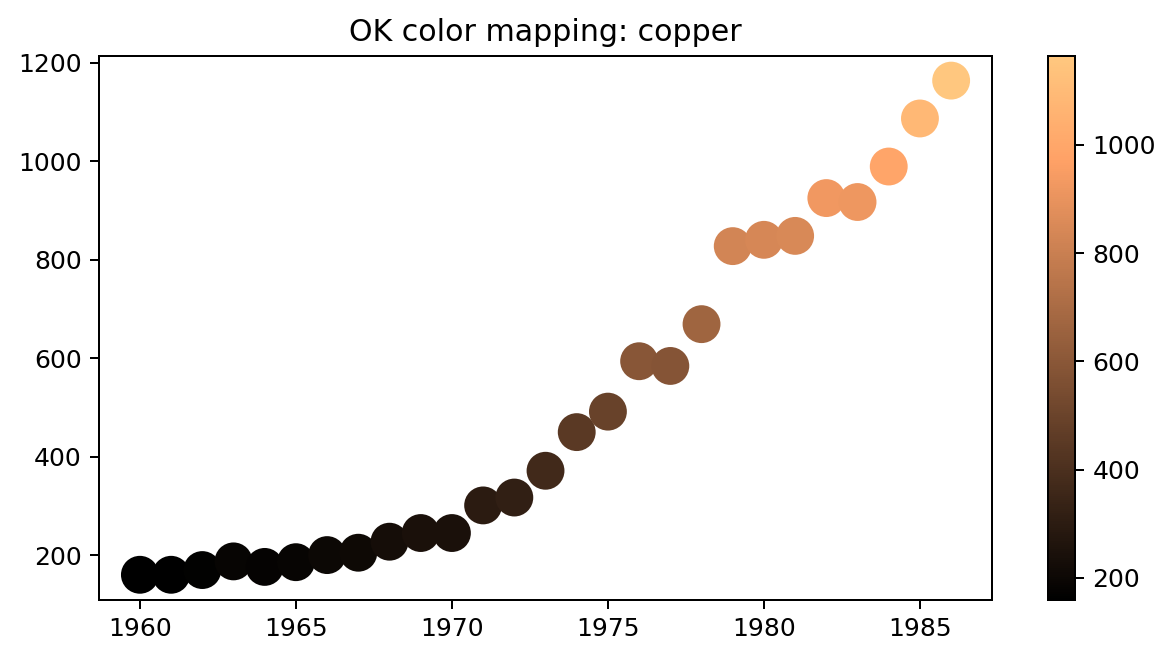

In [60]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='copper', title='OK color mapping: copper')

Some colour maps, like the old-fashioned `jet` colourmap are terrible for this. They introduce **false contours** in visualisations because they do not have the property of monotonic brightness. (see [this article](https://www.mathworks.com/tagteam/81137_92238v00_RainbowColorMap_57312.pdf) for details on why this is really bad and can lead to misleading results).

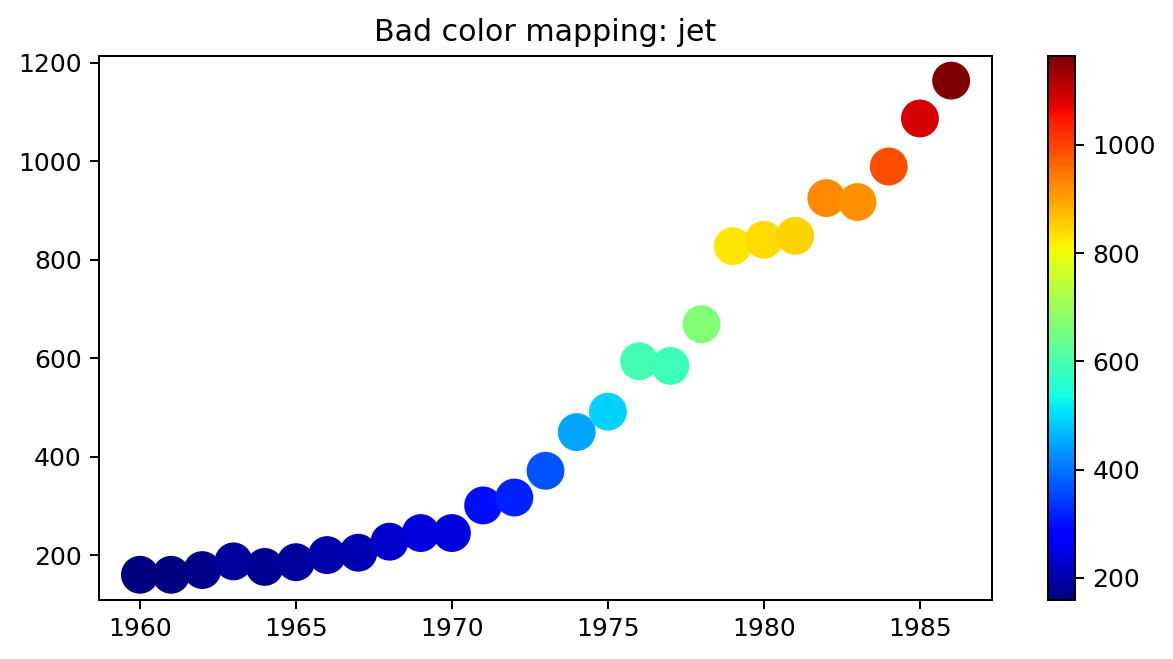

In [61]:
plot_w_colorbar(q1[:,1], q1[:,2], 
                cmap='jet', title='Bad color mapping: jet')

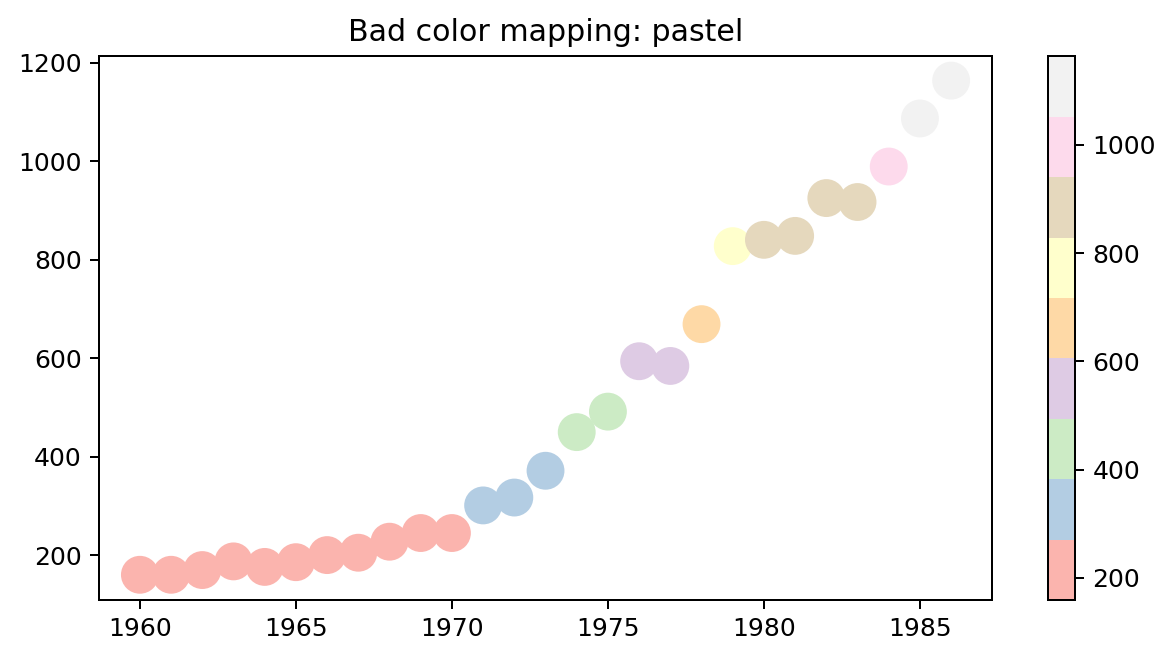

In [62]:
plot_w_colorbar(q1[:,1], q1[:,2], cmap='Pastel1',
                title='Bad color mapping: pastel')

## Make it pop
There is a web applet where you can experiment with the distortion in contrast that bad colourmaps produce:

https://predictablynoisy.com/makeitpop-intro 

### Signed scalar
* If your data is signed (and the sign matters), use a colour map which diverges around 0, and is monotonic in brightness in each side of 0. 

Text(0.5, 1.0, 'Divergent color mapping for signed values')

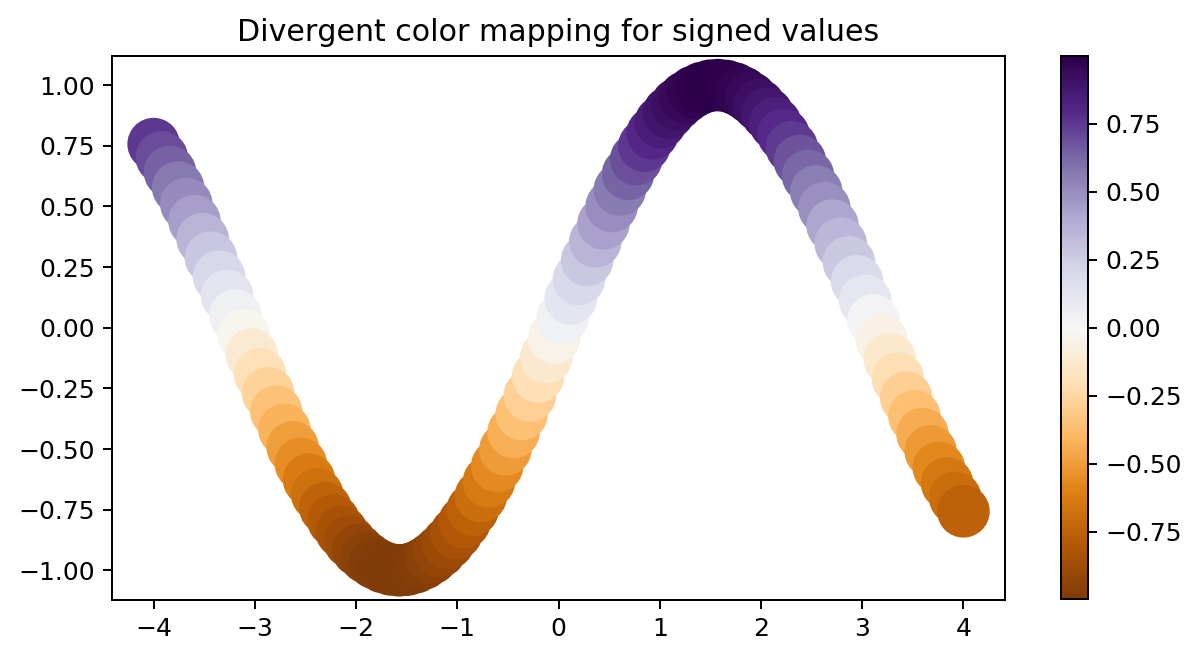

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='PuOr', s=400)
fig.colorbar(paths)
ax.set_title("Divergent color mapping for signed values")

Text(0.5, 1.0, 'Divergent color mapping for signed values')

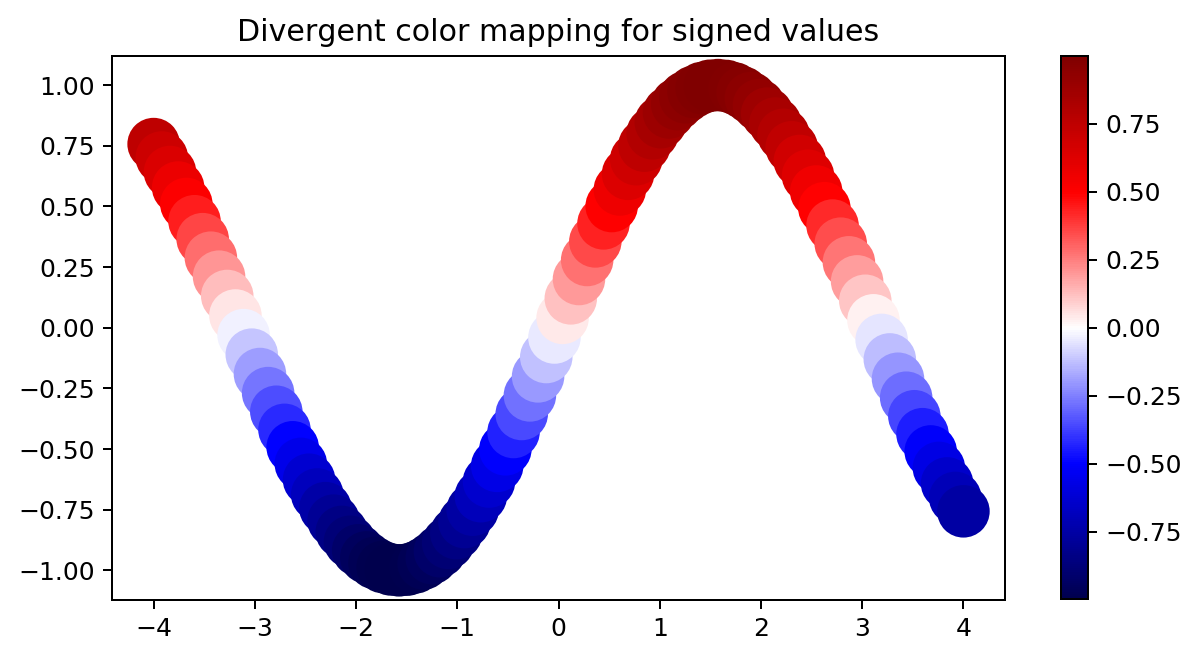

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='seismic', s=400)
fig.colorbar(paths)
ax.set_title("Divergent color mapping for signed values")

Text(0.5, 1.0, 'Very bad colour map for signed values')

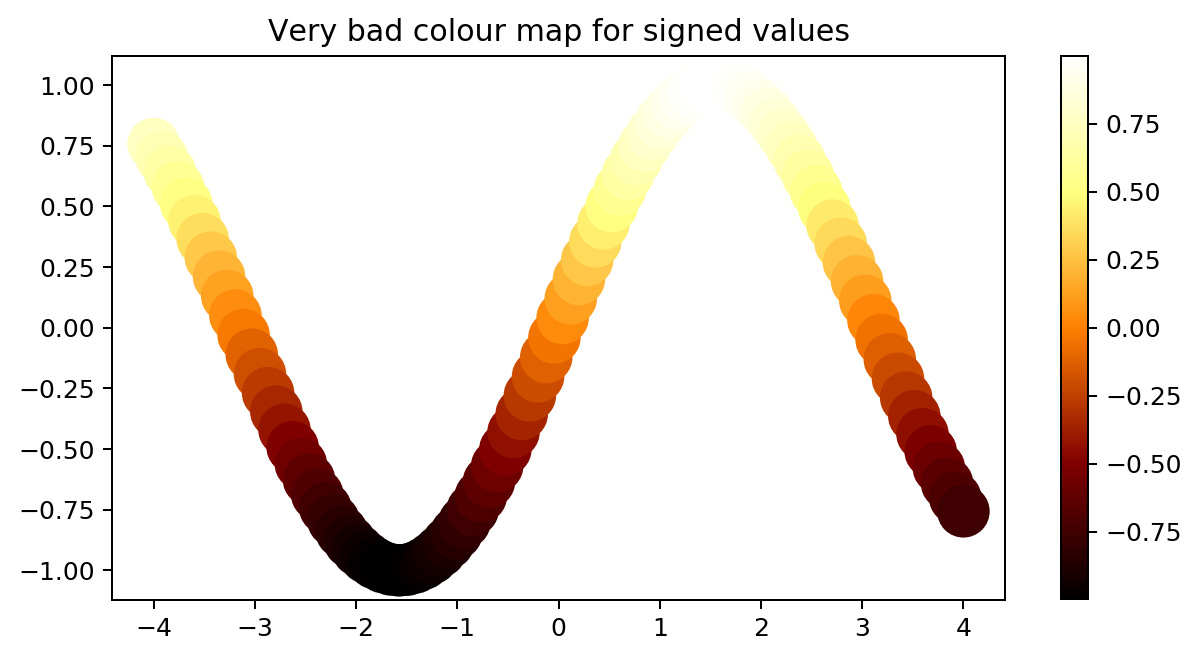

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
x = np.linspace(-4, 4, 100) 
y = np.sin(x)
paths = ax.scatter(x, y, c=y, cmap='afmhot', s=400)
fig.colorbar(paths)
ax.set_title("Very bad colour map for signed values")

### Scaling colourmaps

Scale data to colorscales appropriately, and always provide a colour bar for reference. It **must** be possible to invert the visual units to recover the data units, and the colour bar is the essential **guide** for that purpose.

## Lines
Lines are *geoms* that connect points together. A line should be used if it makes sense to ask what is *between* two data points; i.e. if there is a continuum of values. This makes sense if there are two *ordered* arrays which represent samples from a *continuous* function 

$$y=f(x).$$

### Linestyles
Line geoms can have
**variable thickness and variable colour**

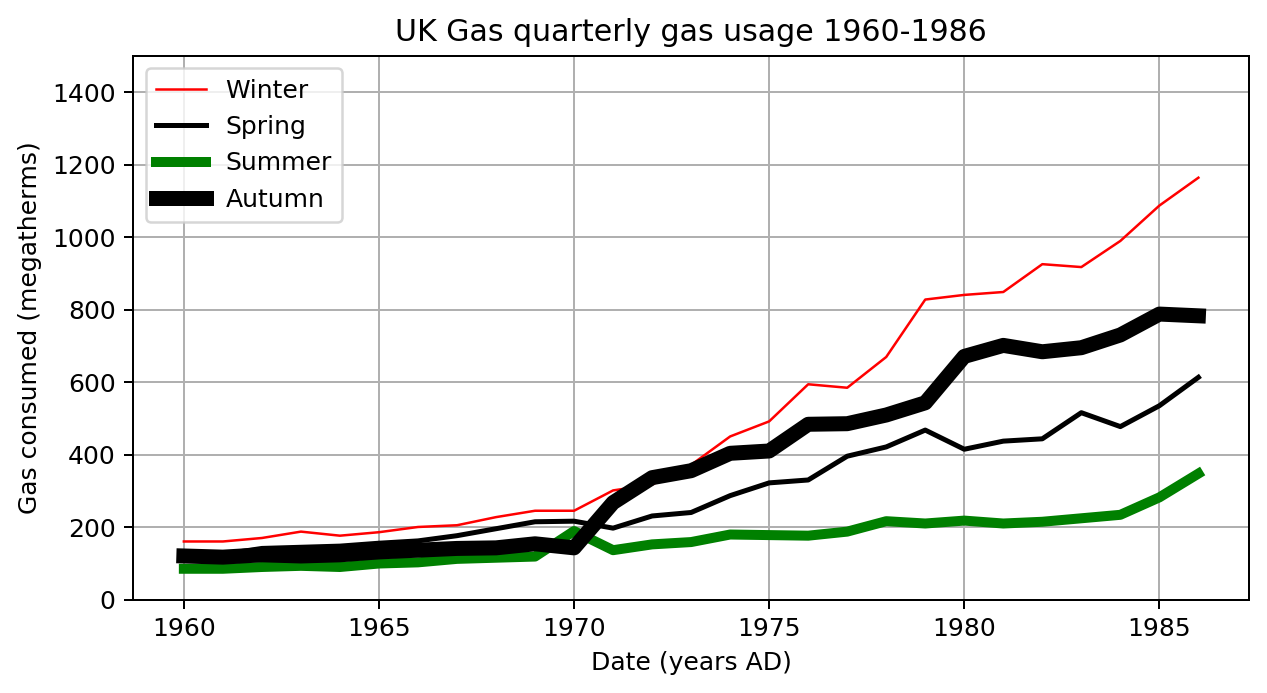

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', linewidth=1, color='red')
ax.plot(q1[:,1], q2[:,2], label='Spring', linewidth=2, color='black')
ax.plot(q1[:,1], q3[:,2], label='Summer', linewidth=4, color='green')
ax.plot(q1[:,1], q4[:,2], label='Autumn', linewidth=6, color='black')

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

They may also have different **dash patterns** which make it easy(ish) to distinguish different lines  without relying on colour. Colour may not be available in printed form, and excludes readers with colour blindness.

More than four dash patterns on one plot is bad idea, both from an aesthetic and a communication stand point.

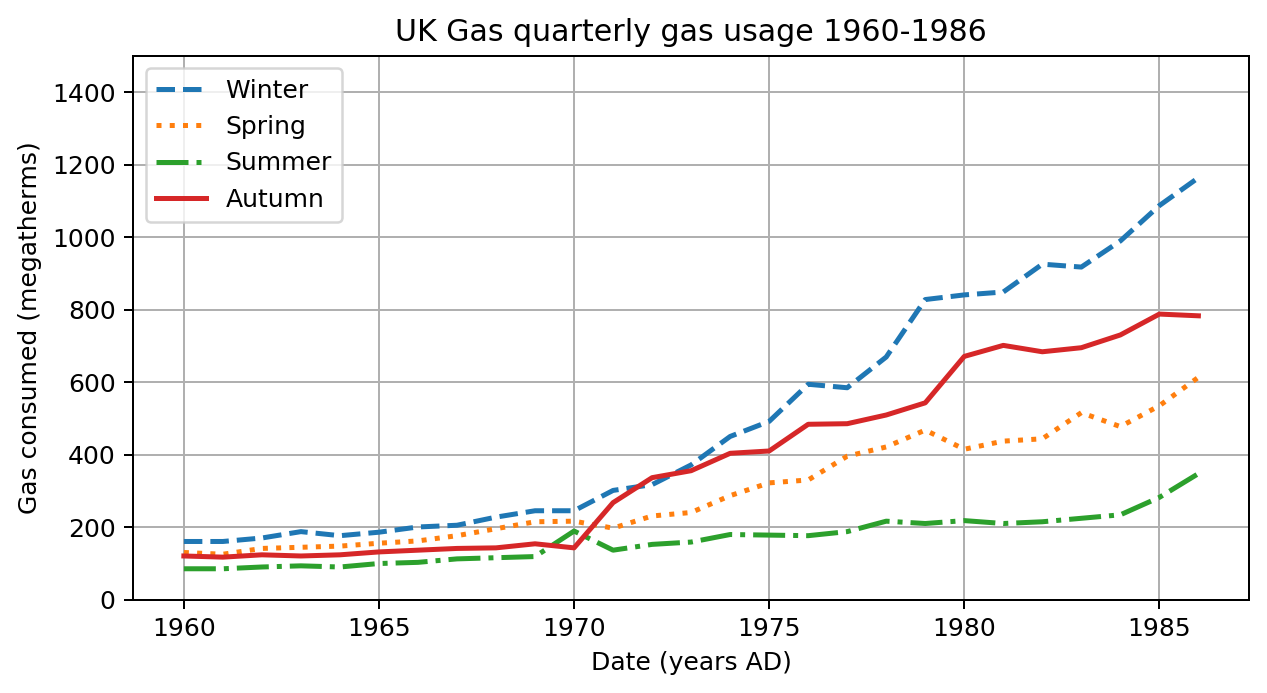

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', linestyle='--', linewidth=2)
ax.plot(q1[:,1], q2[:,2], label='Spring', linestyle=':', linewidth=2)
ax.plot(q1[:,1], q3[:,2], label='Summer', linestyle='-.', linewidth=2)
ax.plot(q1[:,1], q4[:,2], label='Autumn', linestyle='-', linewidth=2)

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

### The staircase and the bar
In some cases, it makes sense to join points with lines (because they form a continuous series), but we know that the value cannot have changed between measurements. For example, imagine a simulation of a coin toss experiment, plotting the cumulative sum of heads seen. 

In [68]:
np.random.seed(5)
coins = np.random.randint(0,2,(8,))
total_heads = np.cumsum(coins) 

This makes no sense as an ordinary line graph. We can't be half way through a coin toss!

Text(0.5, 1.0, 'Coin toss experiment')

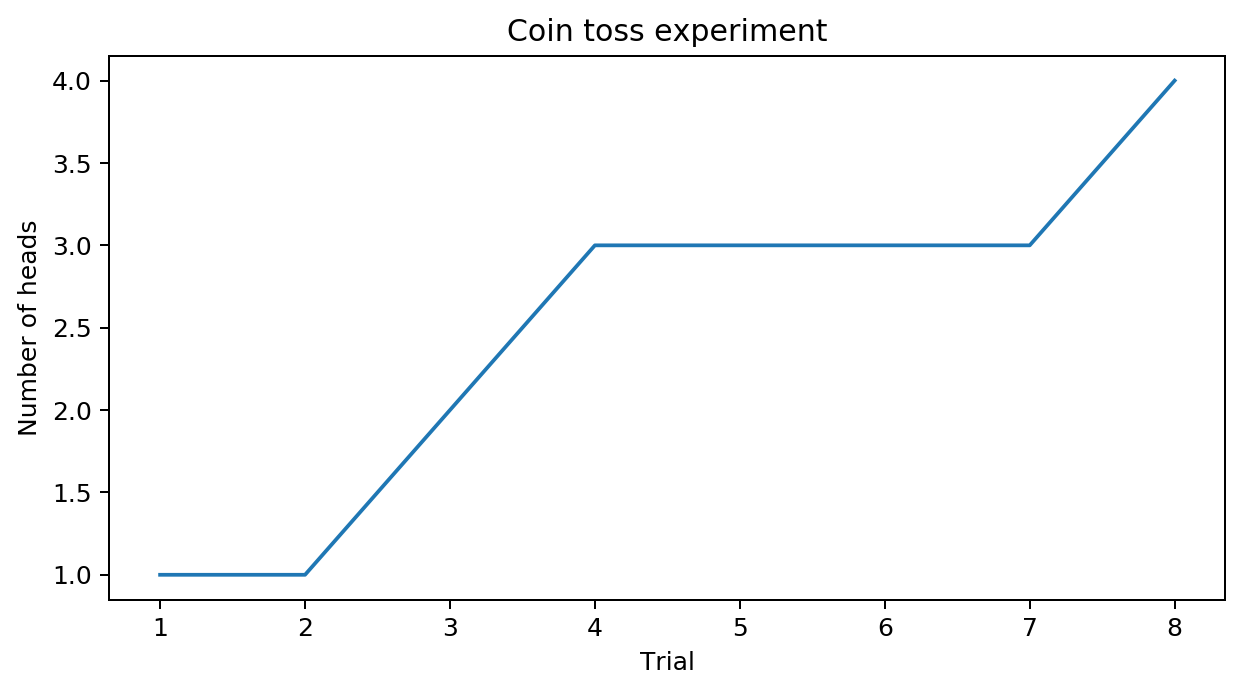

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
count = np.arange(len(total_heads))+1
ax.plot(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

In this case, a **staircase** (or **step**) plot is appropriate. This connects points with lines, but keeping the value fixed until a new data point is observed, rather than linearly interpolating in between.

Text(0.5, 1.0, 'Coin toss experiment')

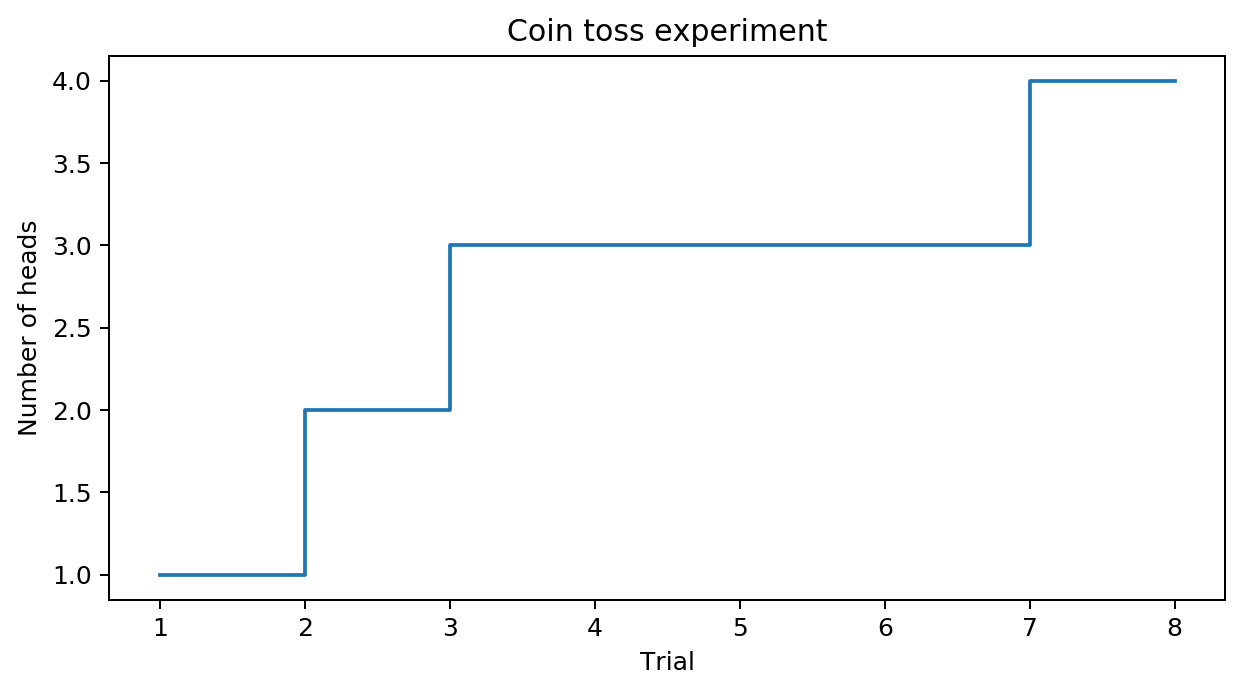

In [70]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.step(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

If measurements of $x$ are naturally discrete (e.g. days of the week, conditions in an experiment), then a **bar chart** may be suitable. For example, the quarterly minimum and maximum gas data from the previous example naturally falls into years. These can be plotted as bars

Text(0.5, 1.0, 'UK gas usage, 1960-1986')

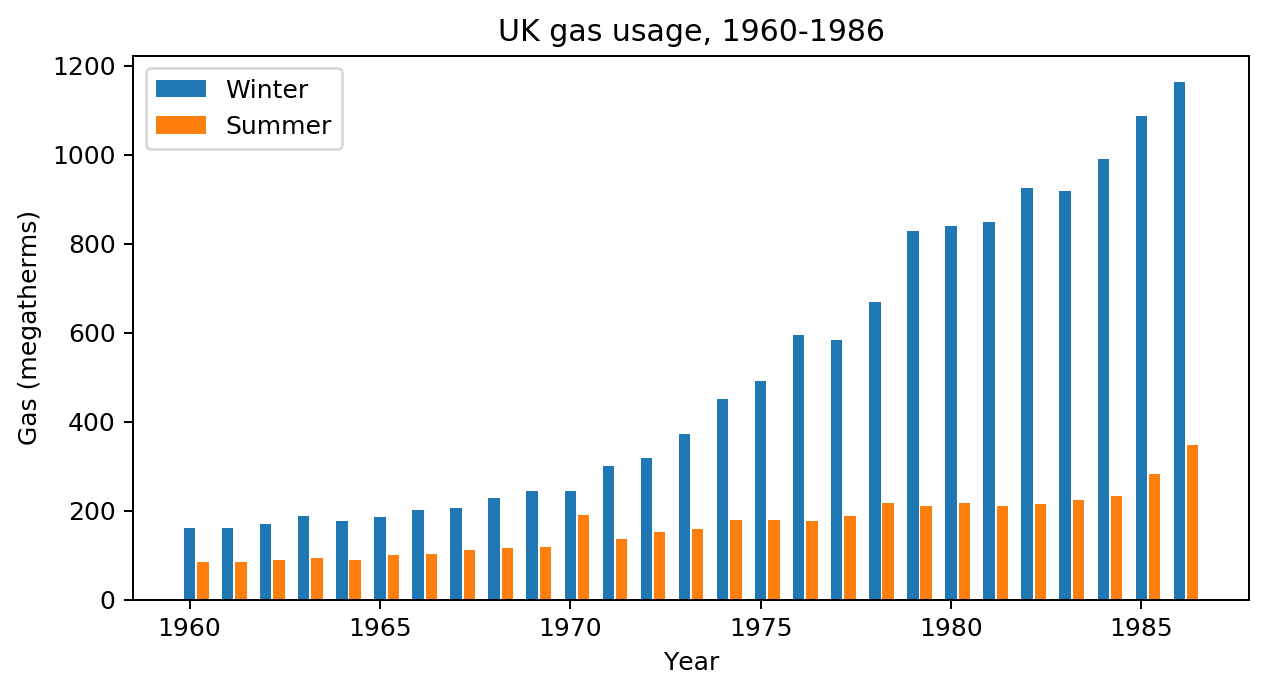

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(q2[:,1]-0.25, q1[:,2], label="Winter", width=0.3)
ax.bar(q2[:,1]+0.1, q3[:,2], label="Summer", width=0.3)
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Gas (megatherms)")
ax.set_title("UK gas usage, 1960-1986")

## Alpha and transparency

Geoms can be rendered with different **transparency**, so that geoms layered behind show through. This is referred to as **opacity** (the inverse of transparency) or the **alpha** (equivalent to opacity). This can be useful when plotting large numbers of geoms which overlap (e.g. on a dense scatterplot), or to emphasise/deemphasise certain geoms, as with line thickness.

Transparency should be used judiciously; a plot with many transparent layers may be hard to interpret, but it can be a very effective way of providing visual emphasis.


### Alpha to mitigate geom overlap

Text(0, 0.5, 'Latitude')

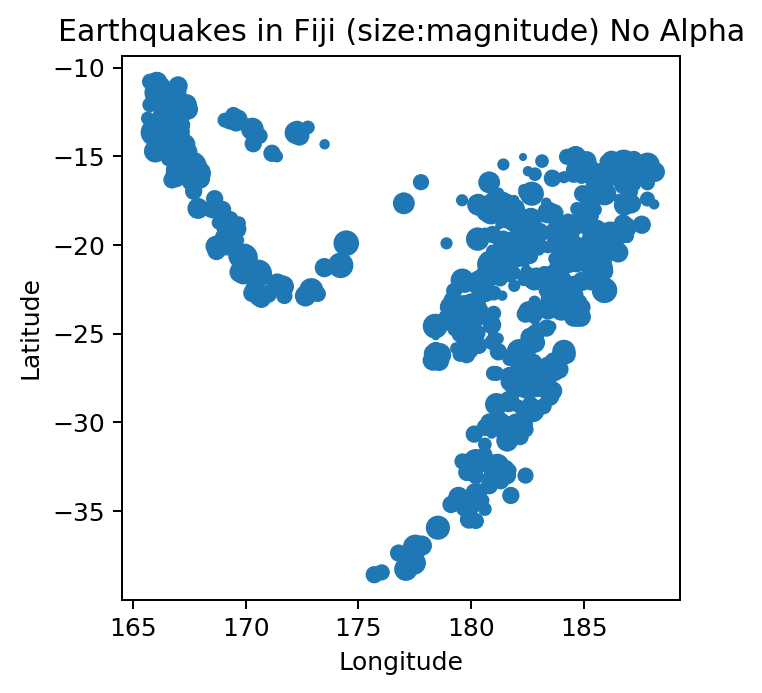

In [72]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, alpha=1.0)
ax.set_title("Earthquakes in Fiji (size:magnitude) No Alpha")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

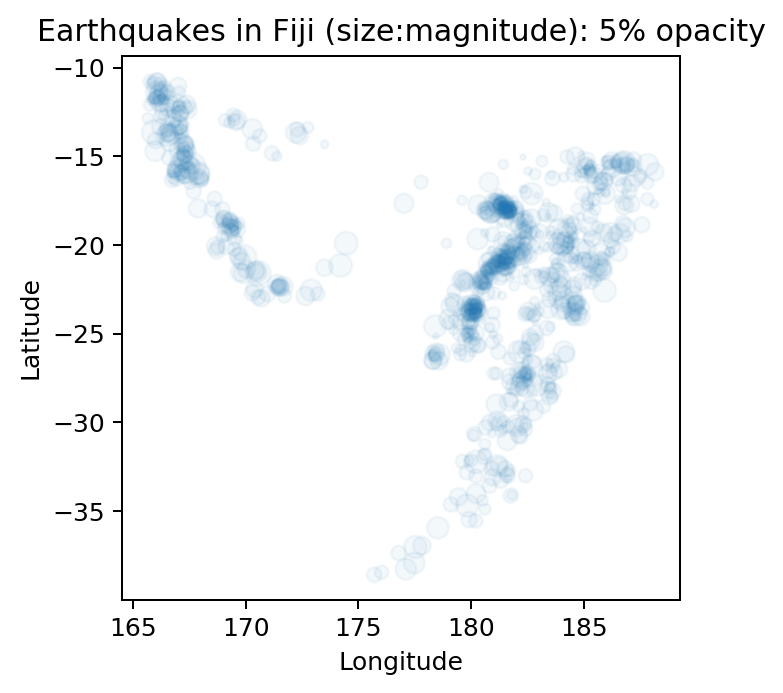

In [73]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, 
                   alpha=0.05)
ax.set_title("Earthquakes in Fiji (size:magnitude): 5% opacity")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

### Alpha for emphasising geoms

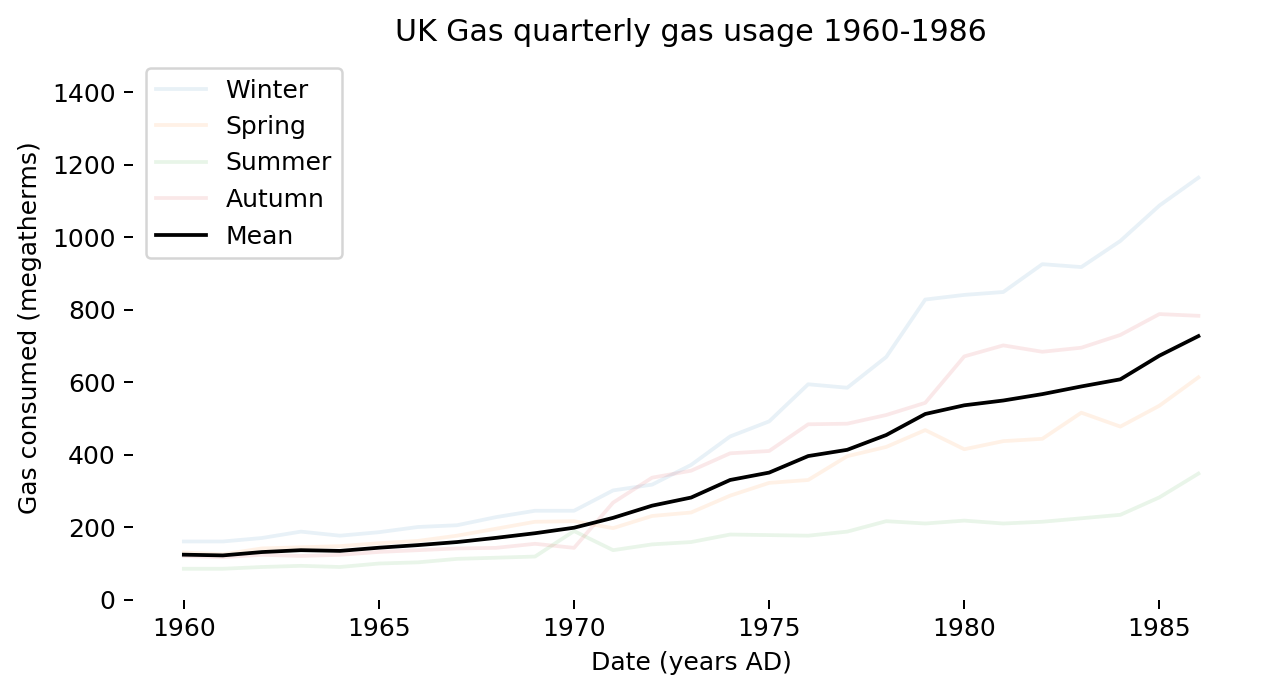

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q1[:,1], q1[:,2], label='Winter', color='C0', alpha=0.1)
ax.plot(q1[:,1], q2[:,2], label='Spring', color='C1', alpha=0.1)
ax.plot(q1[:,1], q3[:,2], label='Summer', color='C2', alpha=0.1)
ax.plot(q1[:,1], q4[:,2], label='Autumn', color='C3', alpha=0.1)

ax.plot(q1[:,1], (q1[:,2]+q2[:,2]+q3[:,2]+q4[:,2])/4, label='Mean', color='k', alpha=1.0)

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.legend()
ax.set_frame_on(False)
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

---

# Coords
So far, we have assumed a simple model for coordinate systems (**coords**). We have just mapped two dimensions onto a two dimensional image with some scaling. More precisely, we have assumed that the mapping from data to visual units is linear mapping of each independent data dimension $x$ and $y$ to a Cartesian coordinate frame defined by a set of **axis limits**.

An axis limit specifies a range in **data units** (e.g. 0 to 500 megatherms) which are then mapped onto the available space in the figure in **visual units** (e.g. 8cm or 800px).

In `matplotlib` for example, we can control the visual units of a figure using `figsize` when creating a figure (which, by default, are in inches).

The axes will span some portion of that figure, and these define the **coord** for the visualisation. The axis limit `ax.set_xlim()` and `ax.set_ylim()` commands specify the data unit range which is mapped on. 

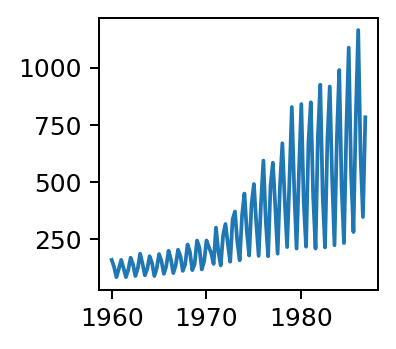

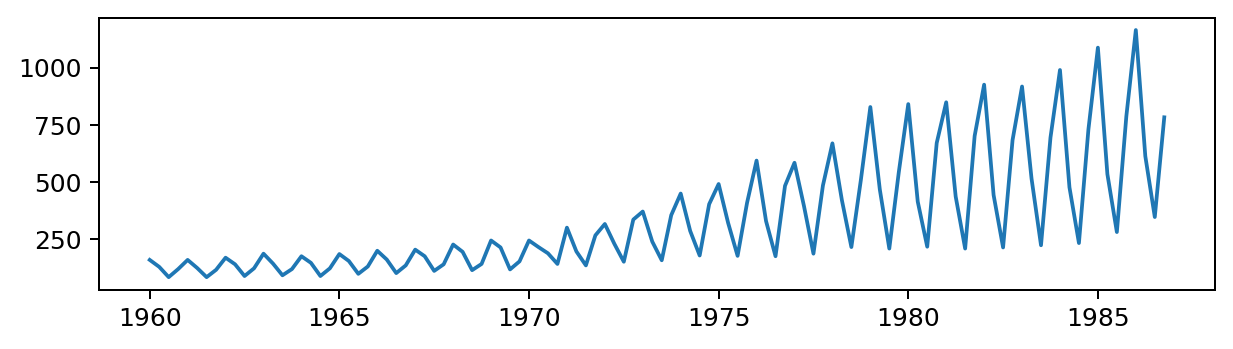

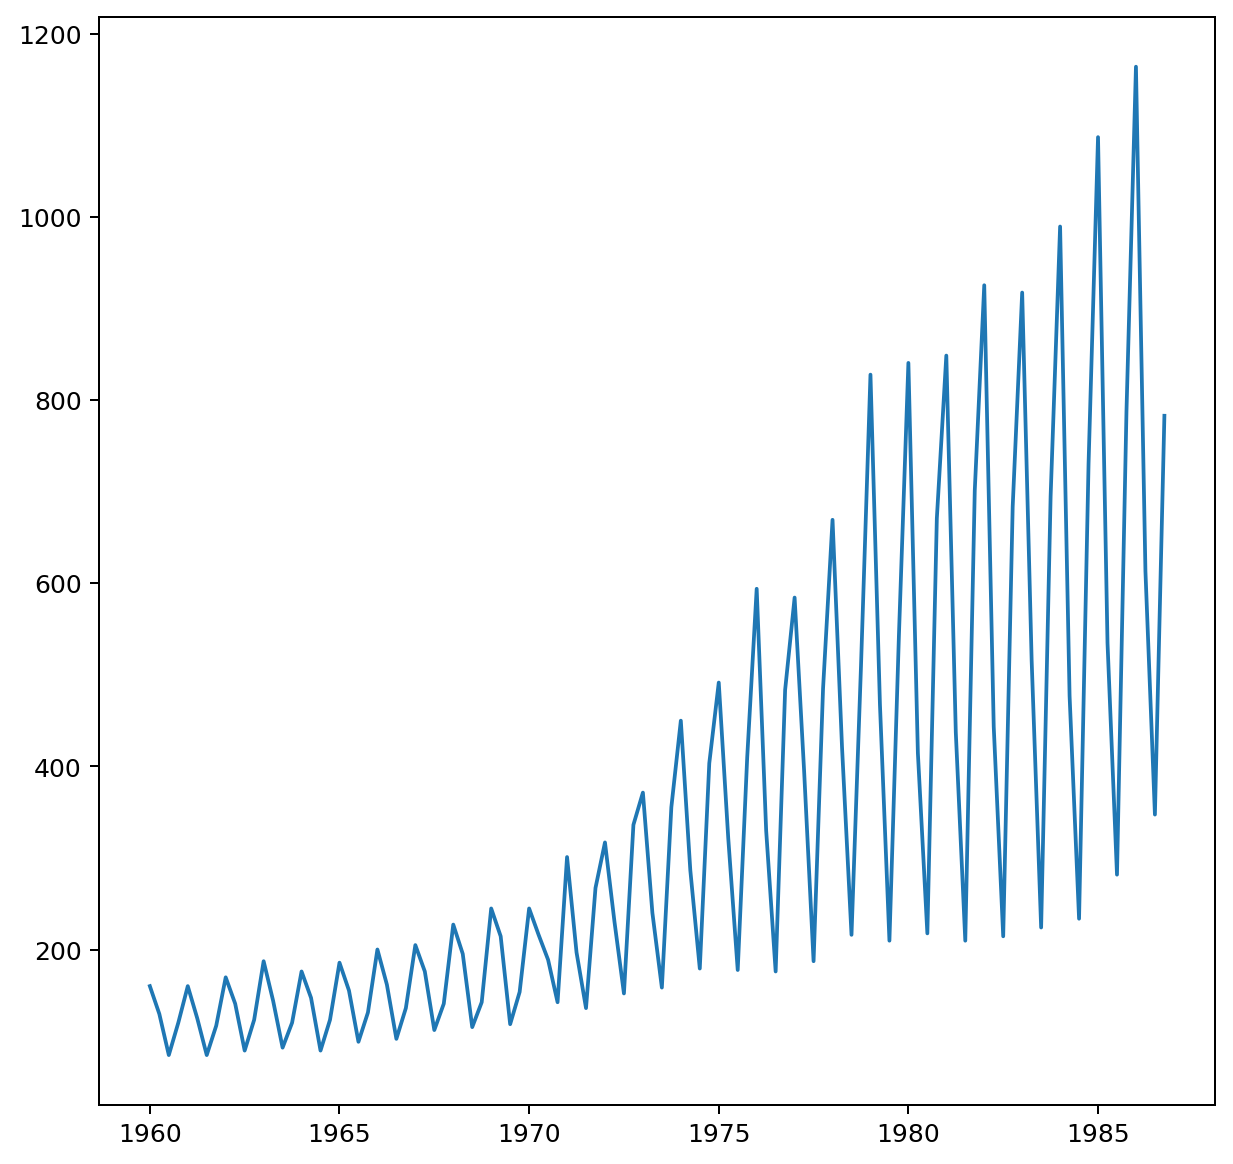

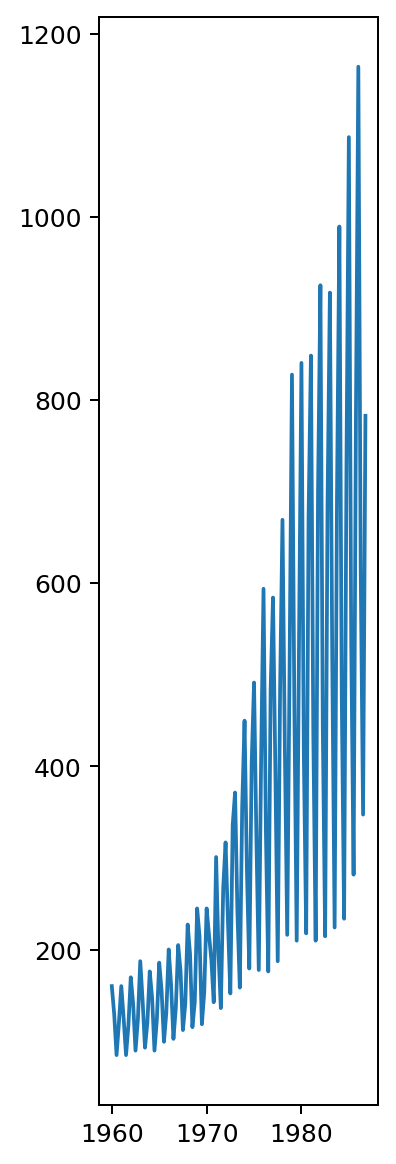

In [75]:
# different visual units, same data units
small_square_fig = plt.figure(figsize=(2,2))
small_long_fig = plt.figure(figsize=(8,2))
large_square_fig = plt.figure(figsize=(8,8))
large_long_fig = plt.figure(figsize=(2,8))

ax = small_square_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = small_long_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = large_square_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])

ax = large_long_fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])


(500, 600)

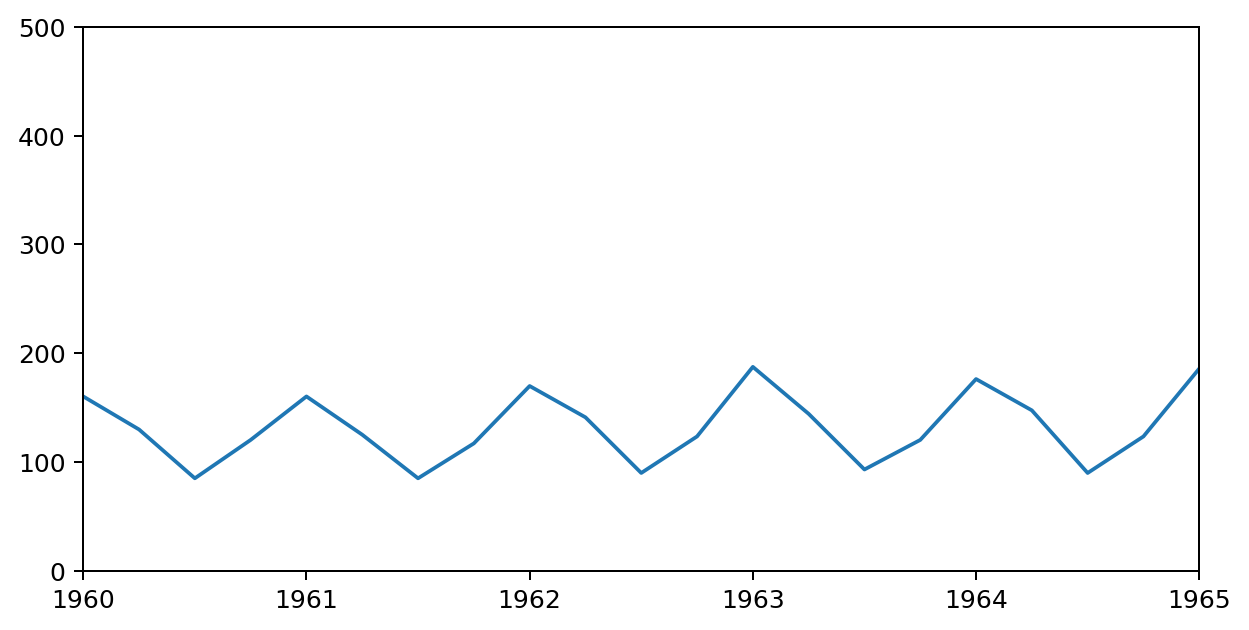

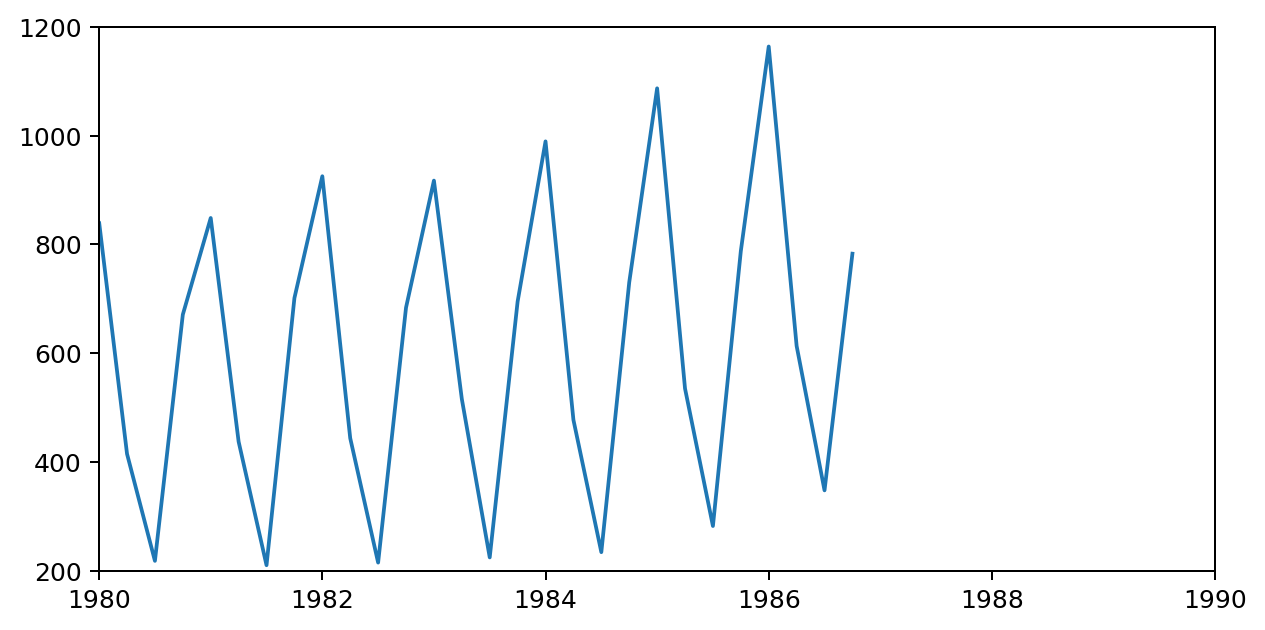

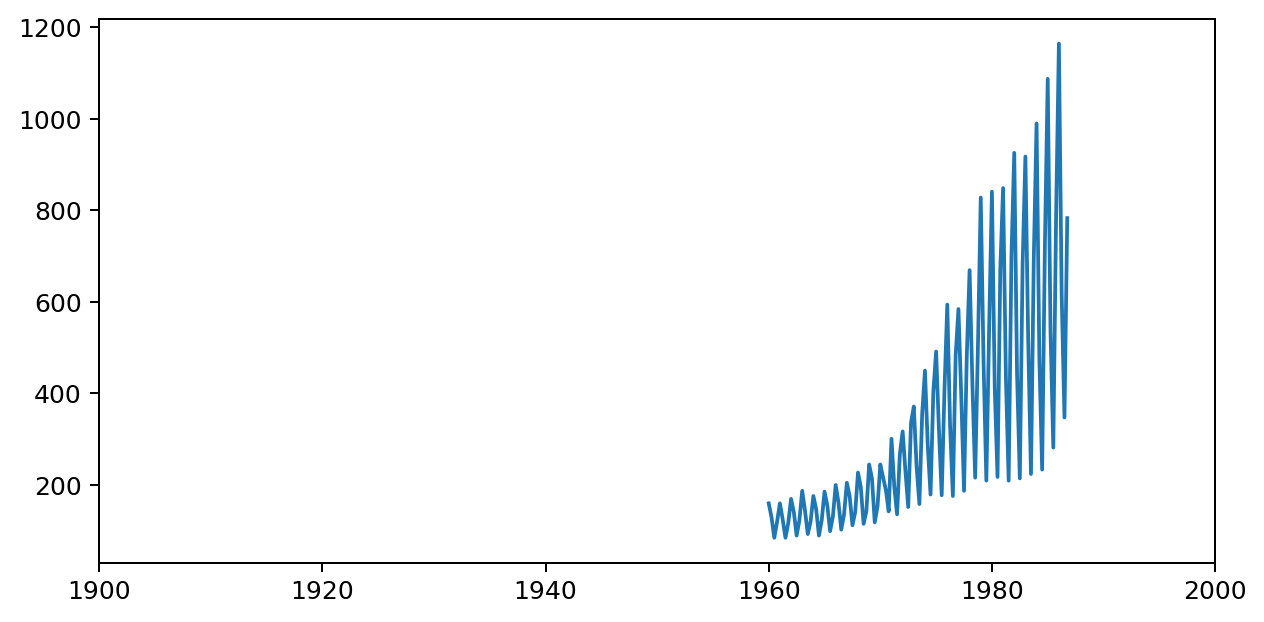

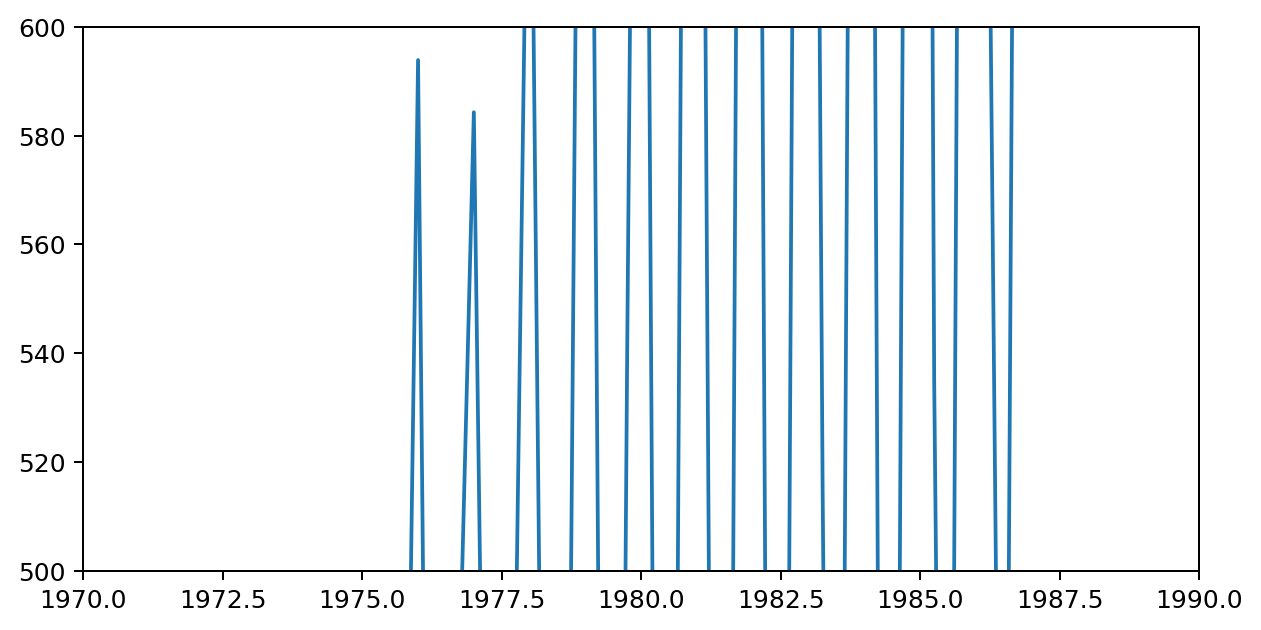

In [76]:
# same figure size, different axis limits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_ylim(0,500)
ax.set_xlim(1960, 1965)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_ylim(200,1200)
ax.set_xlim(1980, 1990)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_xlim(1900, 2000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gas[:,1], gas[:,2])
ax.set_xlim(1970, 1990)
ax.set_ylim(500,600)


## Aspect ratio

In some cases, the **aspect ratio** of a visualisation is important. For example, images should never be stretched or squashed when displayed. In the left plot below, the shape is circular but appears elliptical:


Text(0.5, 1.0, 'Forced oblate aspect circle')

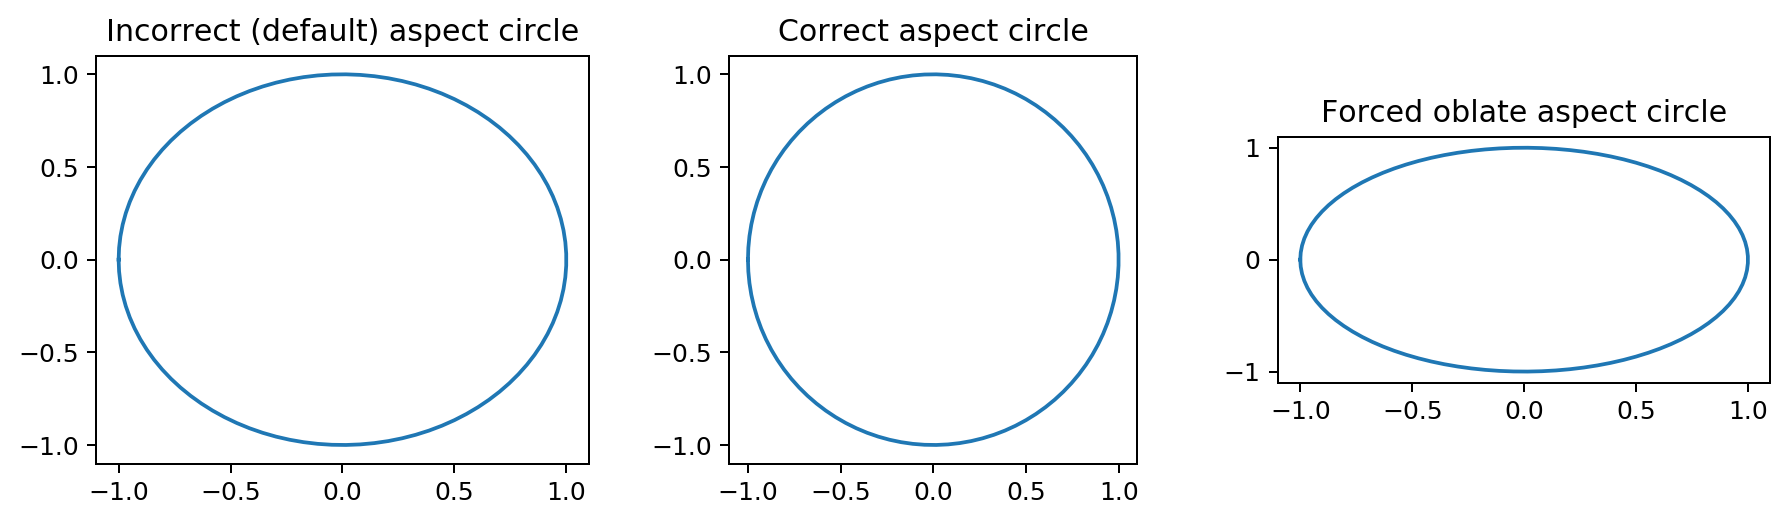

In [77]:
# this is definitely circular!
angle = np.linspace(-np.pi, np.pi, 100)
x, y = np.cos(angle), -np.sin(angle)


fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,3,1)
ax.plot(x,y)
ax.set_title("Incorrect (default) aspect circle")

# correct the aspect ratio to 1:1
ax = fig.add_subplot(1,3,2)
ax.plot(x,y)
ax.set_aspect(1.0) # 1.0 means height = 1 x width
ax.set_title("Correct aspect circle")

# force the aspect ratio to 2:1
ax = fig.add_subplot(1,3,3)
ax.plot(x,y)
ax.set_aspect(0.5) 
ax.set_title("Forced oblate aspect circle")

The aspect ratio of the **coord**  will  by default be defined by the size of the figure, and the portion of the figure dedicated to a subplot. It can be manually adjusted using `set_aspect()` to force the visual units to span equal data units.

### Coords in general
A coordinate system encompasses a **projection** onto the 2D plane, and might include transformations like polar coordinates, logarithmic coordinates or 3D perspective projection. We have so far seen only linear Cartesian coordinates, which are very simple projections. But there are other projections which can be useful to reveal structure in certain kinds of datasets.

### Log scales
Sometimes a linear scale is not an effective way to display data. This is particularly true when datasets have very large spans of magnitude. In this case, a **logarithmic** coordinate system can be used.

Log scales can be used either on the $x$-axis, $y$-axis or both, depending on which variable(s) have the large magnitude span.
If the plot is log in $y$ only, the plot is called "semilog $y$"; if $x$ only, "semilog $x$" and if logarithmic on both axes "log-log".

In `matplotlib`, `set_xscale`/`set_yscale` can be used to change between linear and log scales on each axis. (side note: there are also commands `semilogx`, `semilogy` and `loglog` which are just aliases for `plot` with the appropriate scale change).



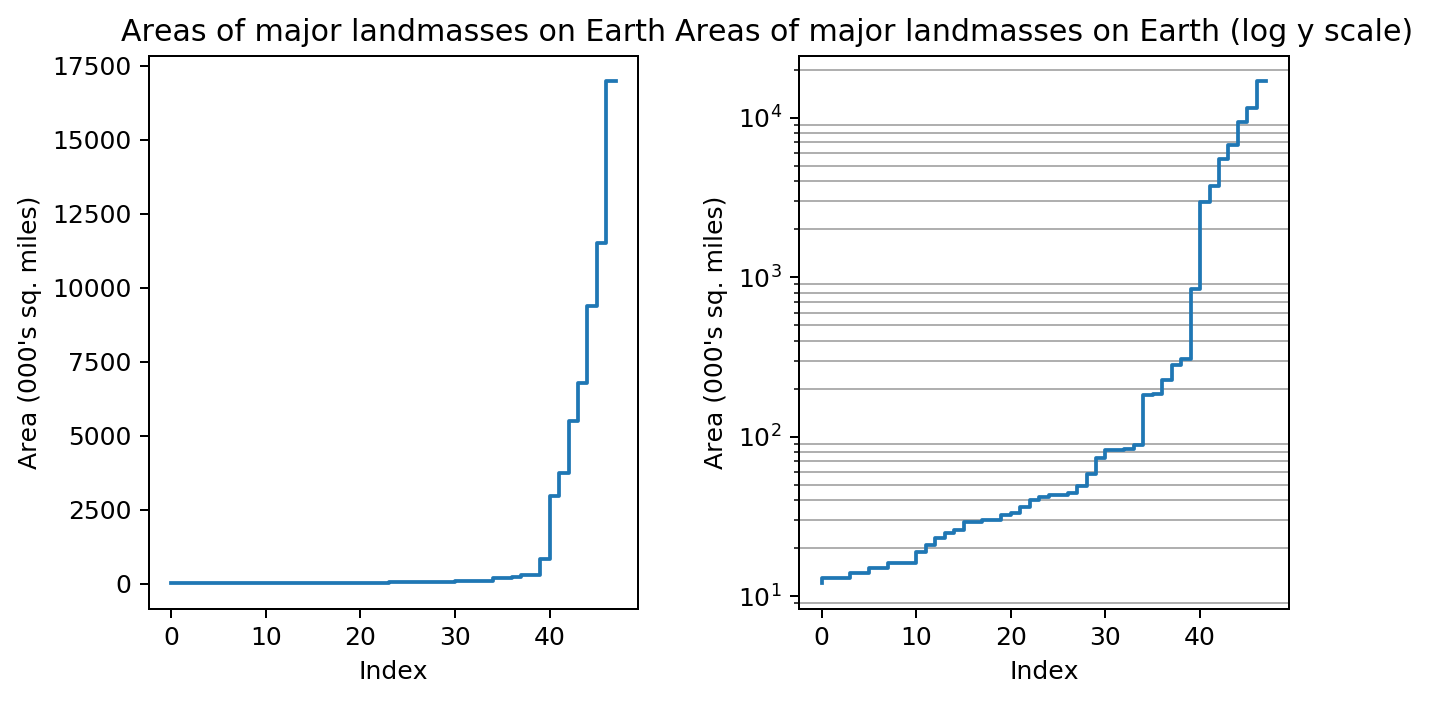

In [78]:
# what should we call a continent? 
islands = np.loadtxt("data/islands.txt")

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.step(np.arange(len(islands)), np.sort(islands))
ax.set_xlabel("Index")
ax.set_ylabel("Area (000's sq. miles)")
ax.set_title("Areas of major landmasses on Earth")

ax = fig.add_subplot(1, 2, 2)
ax.step(np.arange(len(islands)), np.sort(islands))
ax.set_xlabel("Index")
ax.set_ylabel("Area (000's sq. miles)")
ax.set_title("Areas of major landmasses on Earth (log y scale)")
ax.set_yscale("log")
ax.grid(True, which="minor")

fig.tight_layout()  # fix overlap

<function numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)>

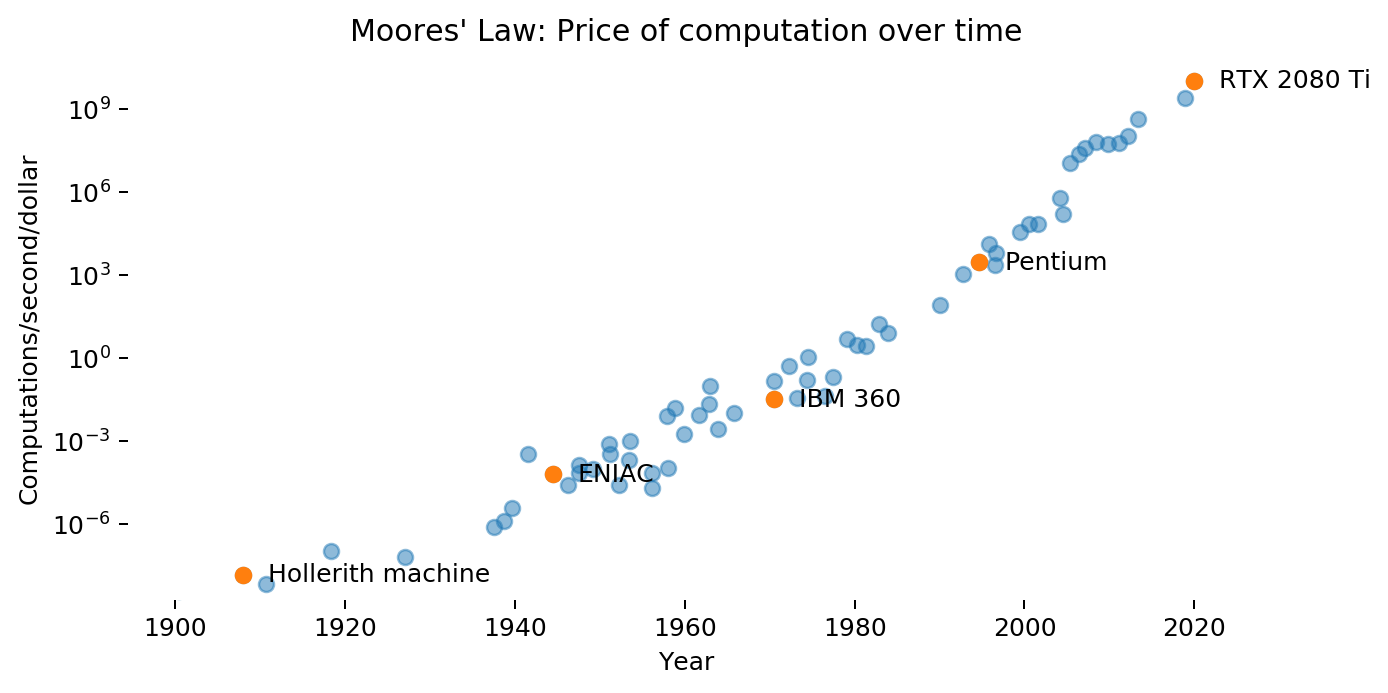

In [81]:
moores = np.loadtxt("data/moores.csv", delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(moores[:,0], moores[:,1], alpha=0.5)
#ax.set_ylim(1e-10, 1e10)
ax.set_yscale('log')
ax.set_xlabel("Year")
ax.set_ylabel("Computations/second/dollar")
ax.set_title("Moores' Law: Price of computation over time")

def annotate(point, label):
    ax.annotate(xy=(moores[point,0], moores[point,1]), s=label, xytext=(10,-3), textcoords='offset points')
    ax.plot(moores[point,0], moores[point,1], 'o', color='C1')

annotate(-1, "RTX 2080 Ti")
annotate(-19, "Pentium")
annotate(-34, "IBM 360")
annotate(-55, "ENIAC")
annotate(1, "Hollerith machine")
ax.set_frame_on(False)
np.logspace

#### Polynomial or power-law relationships
Log-log scales (log on both $x$ and $y$ axes) are useful when there is a (suspected) polynomial relationship between variables (e.g. $y=x^2$ or $y=x^\frac{1}{3}$). The relationship will appear as a straight line on a log-log plot. 

$$ f(x) = x^k $$

looks linear if plot on `loglog`. The gradient of the line tells you the value of `k`.

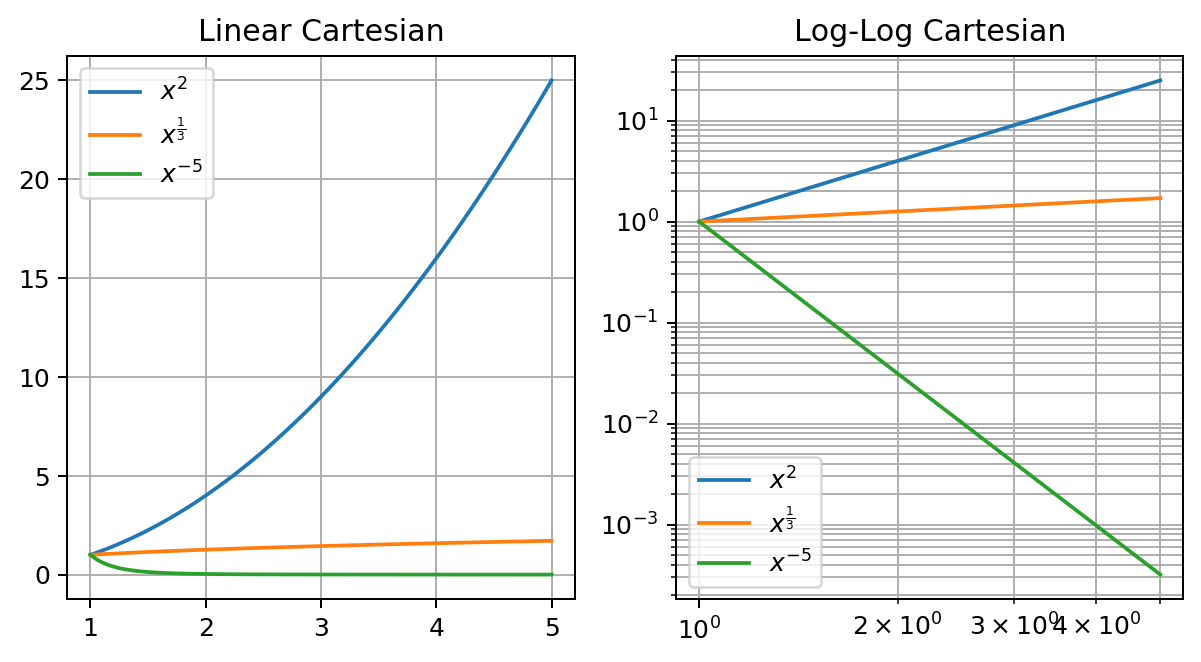

In [82]:
x = np.linspace(1.0, 5, 100)
y1 = x ** 2  # k = 2
y2 = x ** (1 / 3.0)  # k = 1/3
y3 = x ** (-5.0)  # k = -5

# left: linear-linear plot
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, label="$x^2$")
ax.plot(x, y2, label="$x^\\frac{1}{3}$")
ax.plot(x, y3, label="$x^{-5}$")
ax.set_title("Linear Cartesian")
ax.grid(True, which="both")
ax.legend()

# right: log-log plot
ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, label="$x^2$")
ax.plot(x, y2, label="$x^\\frac{1}{3}$")
ax.plot(x, y3, label="$x^{-5}$")
ax.set_title("Log-Log Cartesian")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(True, which="both")
ax.legend()

#### Negative numbers
Note that log scales have one downside: the log of a negative number is undefined, and in fact the logarithm diverges to -infinity at 0.

In [83]:
print(np.log(-1))
print(np.log(0))

nan
-inf


c:\local\conda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
c:\local\conda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


This means that signed data cannot easily be plotted on a log scale (at least if the sign is meaningful and can't just be shifted to a positive number by adding on a constant). 

Text(0.5, 1.0, 'Linear plot of cos(x)*tan(x/2)*exp(x)')

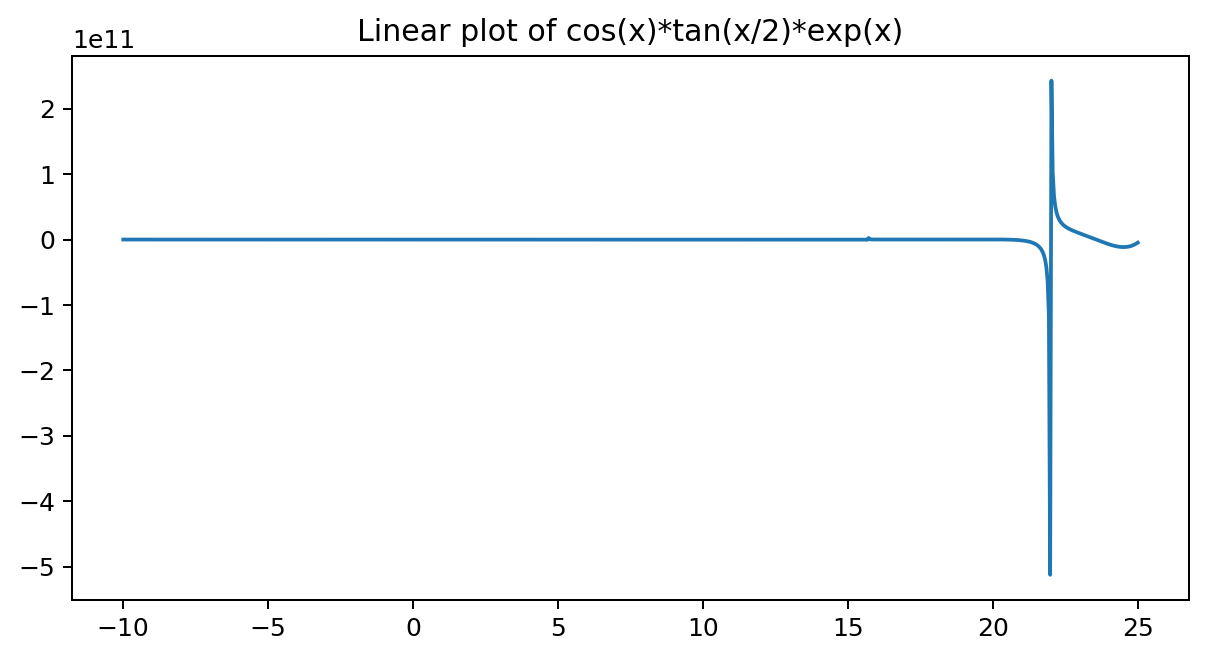

In [83]:
x = np.linspace(-10, 25, 800)
# tricky function that has a very large change in magnitude
y = np.cos(x) * np.tan(x * 0.5) * np.exp(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
ax.set_title("Linear plot of cos(x)*tan(x/2)*exp(x)")

Text(0.5, 1.0, 'semi log y plot of cos(x)*tan(x/2)*exp(x)')

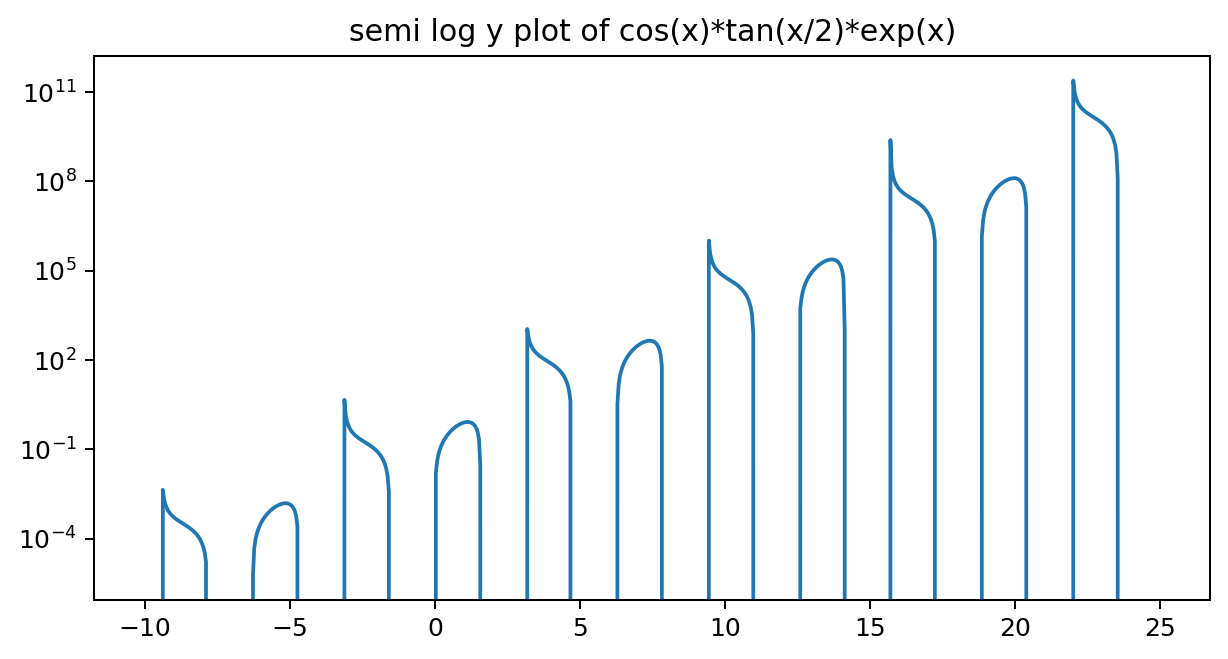

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)
# just cuts off the portion below 0, which isn't very helpful
ax.set_yscale("log")
ax.set_title("semi log y plot of cos(x)*tan(x/2)*exp(x)")

There are modified log scales that "cut out" a small region around 0, and then plot `log(abs(x)) * sign(x)` -- the symmetric logarithm or `symlog`. The "cut out" region is plotted as linear in that range. This distort the plot slightly, but is usually acceptable.

Text(0.5, 1.0, 'symlog plot of $\\cos(x)*\\tan(x/2)*\\exp(x)$')

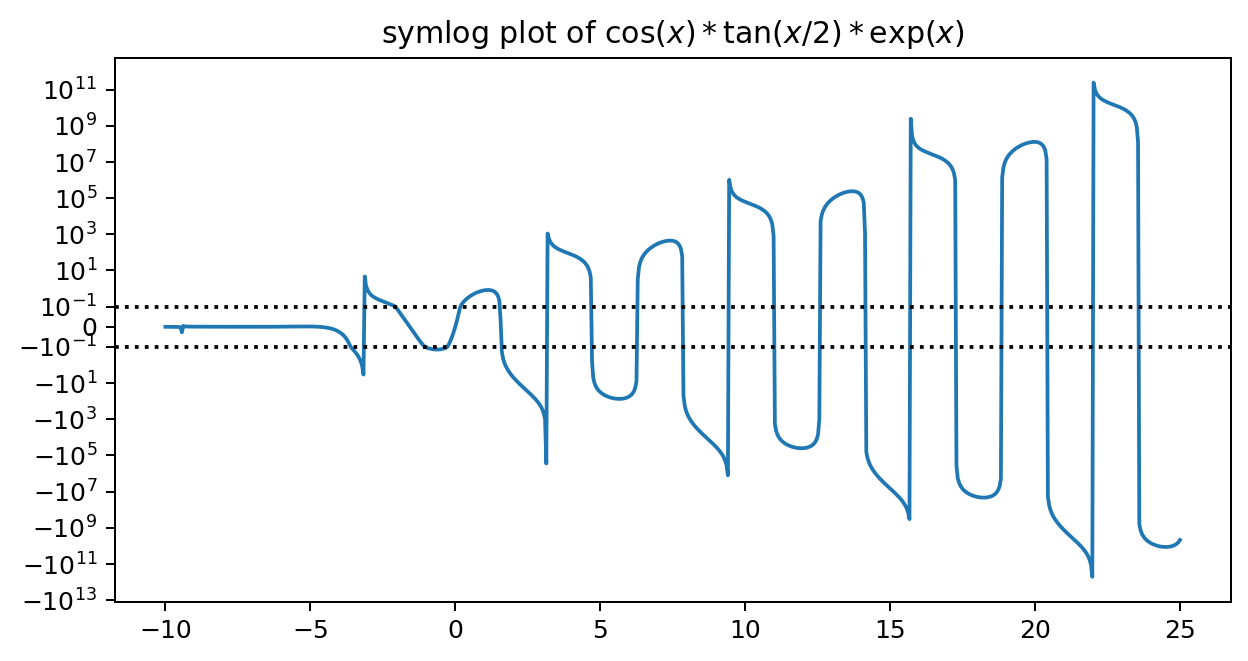

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x,y)
# mark the linear region on the plot
ax.axhline(0.1, color='k', ls=':')
ax.axhline(-0.1, color='k', ls=':')
# this will plot the scale linear between -0.1 and 0.1, and as log(abs(x)) * sign(x) everywhere else
ax.set_yscale("symlog", linthreshy=0.1)
ax.set_title("symlog plot of $\cos(x)*\\tan(x/2)*\exp(x)$")

### Polar
Cartesian plots are the most familiar coords. But some data is naturally represented in different mappings. The most notable of these is **polar coordinates**, in which two values are mapped onto an *angle* $\theta$ and a *radius* $r$. 

This most widely used for data that originated from an angular measurement, but it can be used any time it makes sense for one of the axes to "wrap around" smoothly. The classic example is *radar data* obtained from a spinning dish, giving the reflection distance at each angle of the dish rotation. Similarly, wind data from weather stations typically records the direction and speed of the strongest gusts.

<img src="imgs/radar.jpg"> *[[Image](https://flickr.com/photos/24931020@N02/16096731164 "Radar") by [Ozzy Delaney](https://flickr.com/people/24931020@N02) license [CC BY](https://creativecommons.org/licenses/by/2.0/)]*








Text(0, 0.5, 'Speed (mph)')

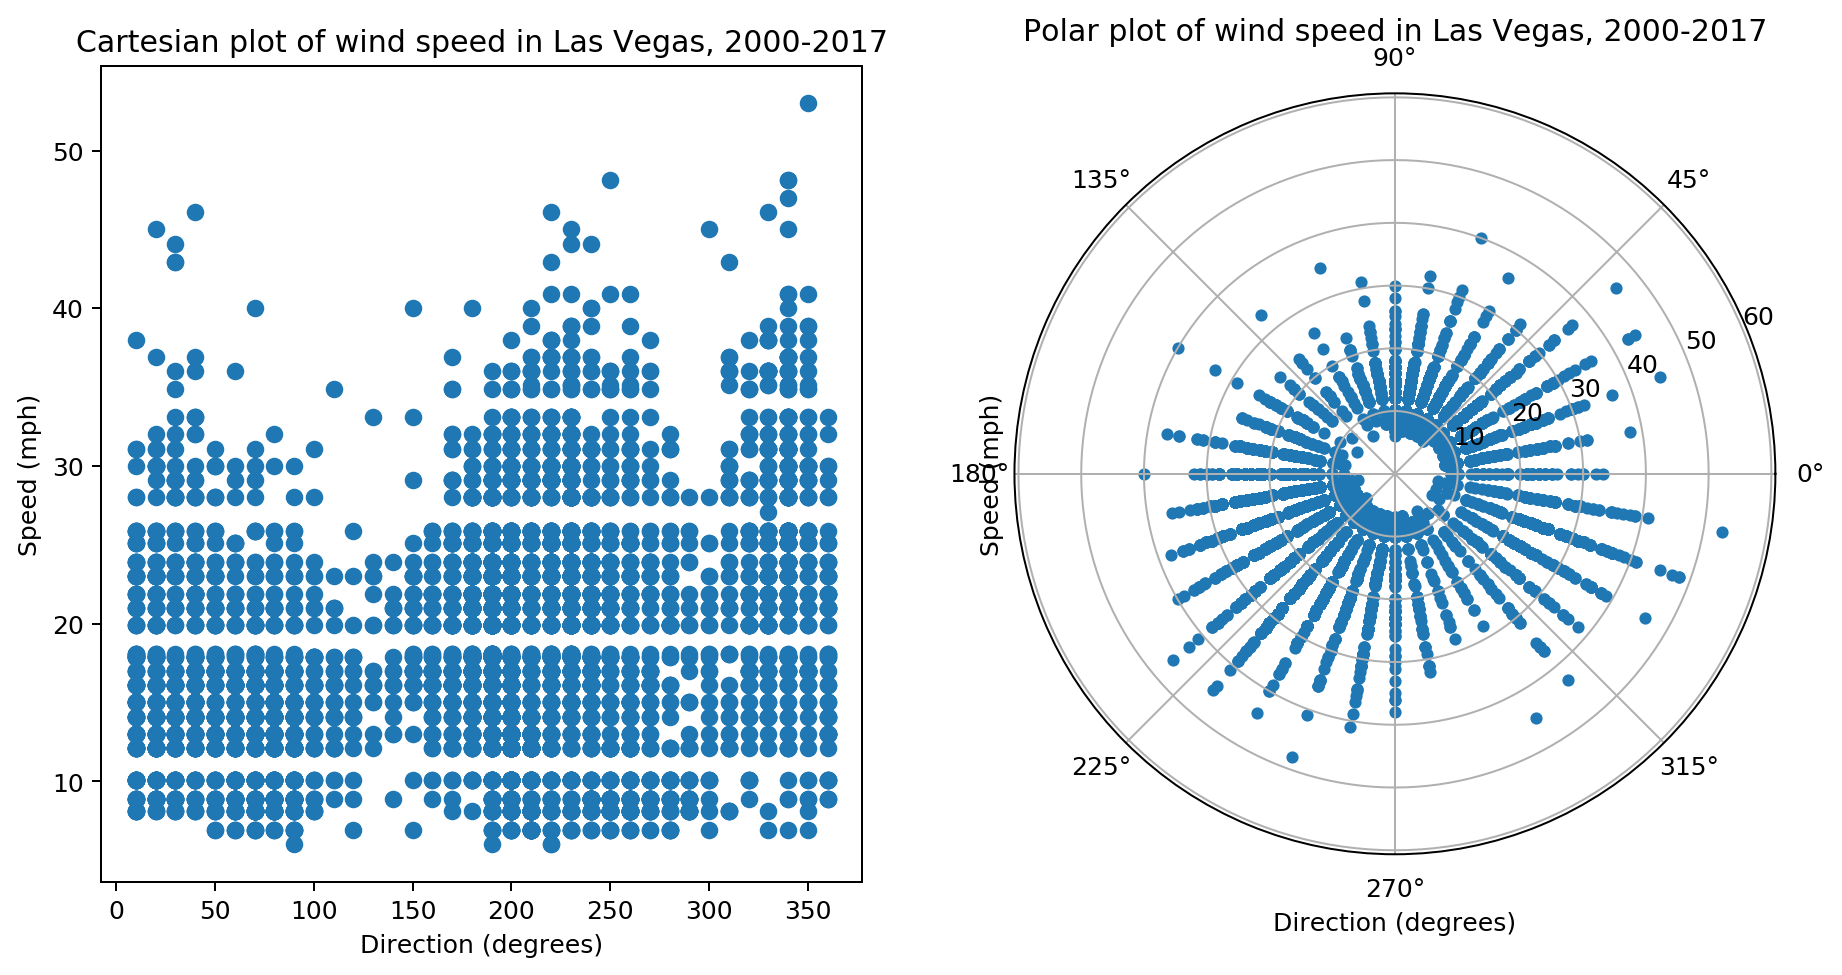

In [86]:
las_vegas = np.loadtxt("data/las_vegas_wind_2000_to_2017.csv", delimiter=',')
direction = las_vegas[:,0]
speed = las_vegas[:,1]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(direction, speed)
ax.set_title("Cartesian plot of wind speed in Las Vegas, 2000-2017")
ax.set_xlabel("Direction (degrees)")
ax.set_ylabel("Speed (mph)")


ax = fig.add_subplot(1,2,2, projection='polar')
ax.scatter(np.radians(direction), speed, s=15)
ax.set_title("Polar plot of wind speed in Las Vegas, 2000-2017")
ax.set_xlabel("Direction (degrees)")
ax.set_ylabel("Speed (mph)")



#### Negative numbers (again)
The sign issue raises it head again with polar plots -- there isn't a natural way to represent radii below zero on a polar plot. In general, polar plots should be reserved for mappings where the data mapping onto $r$ is positive.

---

# Facets and layers

We have seen several examples where multiple **geoms** have been used in a single visualisation. 

There are two ways in which this can be rendered:
* as distinct **layers** superimposed on the same set of **coords**
* as distinct **facets** on separate sets of **coords** (with separate **scales** and **guides**)

<img src="imgs/layered_faceted.svg">


## Layers
Layering is appropriate when two or more views on a dataset are closely related, and the data mapping are in the same units. For example, the historical wheat price data can be shown usefully as a layered plot. A **legend** is an essential **guide** to distinguish the different layers that are present. If multiple layers are used, a legend should (almost) always be present to indicate which **geom** relates to which dataset attribute.


Text(0.5, 1.0, 'Price of wheat and weekly wage of a skilled worker')

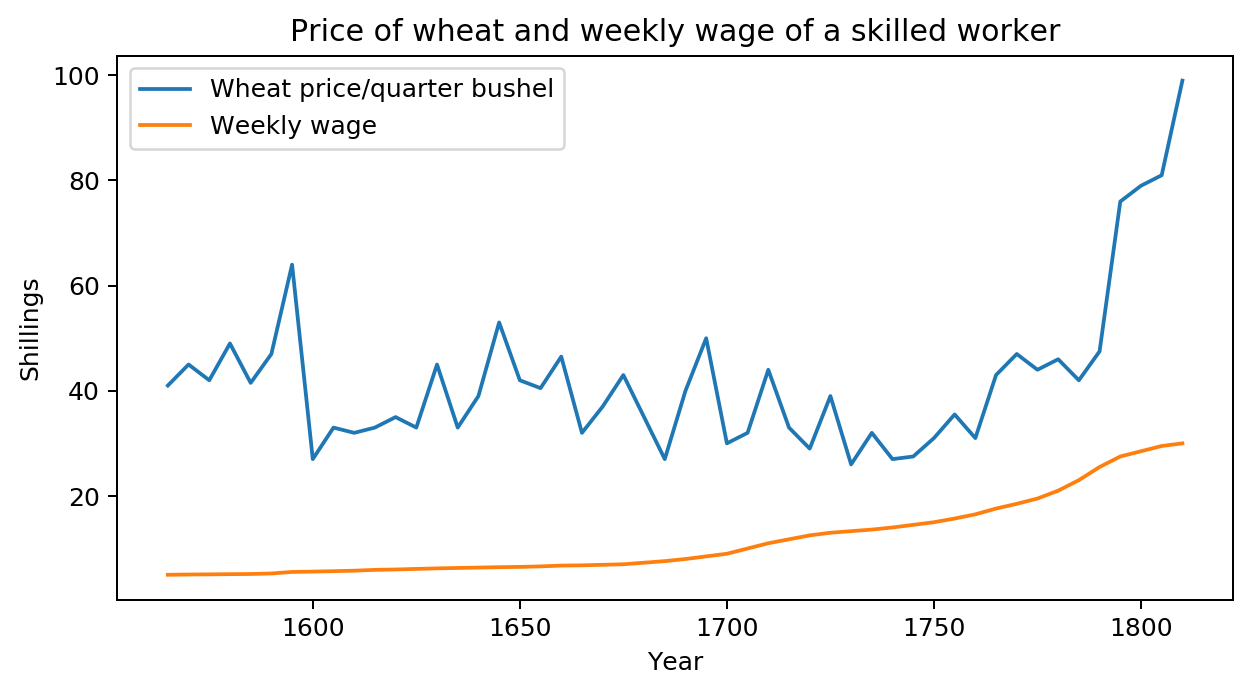

In [87]:
wheat = np.loadtxt("data/Wheat.csv", delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax.set_title("Price of wheat and weekly wage of a skilled worker")

It would not make any sense to plot the ratio of the wage to the price of wheat on the same graph. The ratio does not have units of shillings, and cannot be overlaid on the same set of **coords**.

Text(0.5, 1.0, '[Bad plot] Price of wheat and weekly wage of a skilled worker')

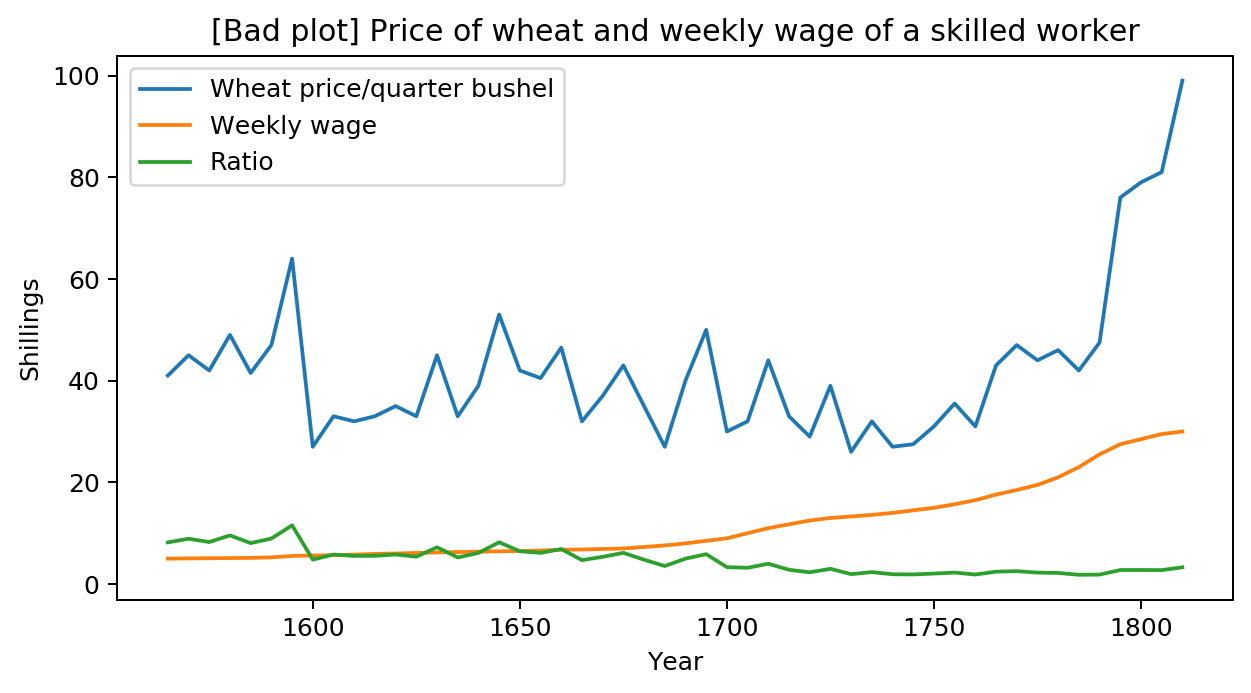

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax.set_title("[Bad plot] Price of wheat and weekly wage of a skilled worker")

Occasionally you will see visualisations with **double $y$ axes**. This is a layering which has a common $x$ mapping but uses two different $y$ mappings -- two (slightly) different **coords** layered over each other. This style of visualisation should be avoided, as it can be difficult to interpret and mislead the reader.

Text(0.5, 1.0, '[Bad-ish plot] Price of wheat and weekly wage of a skilled worker')

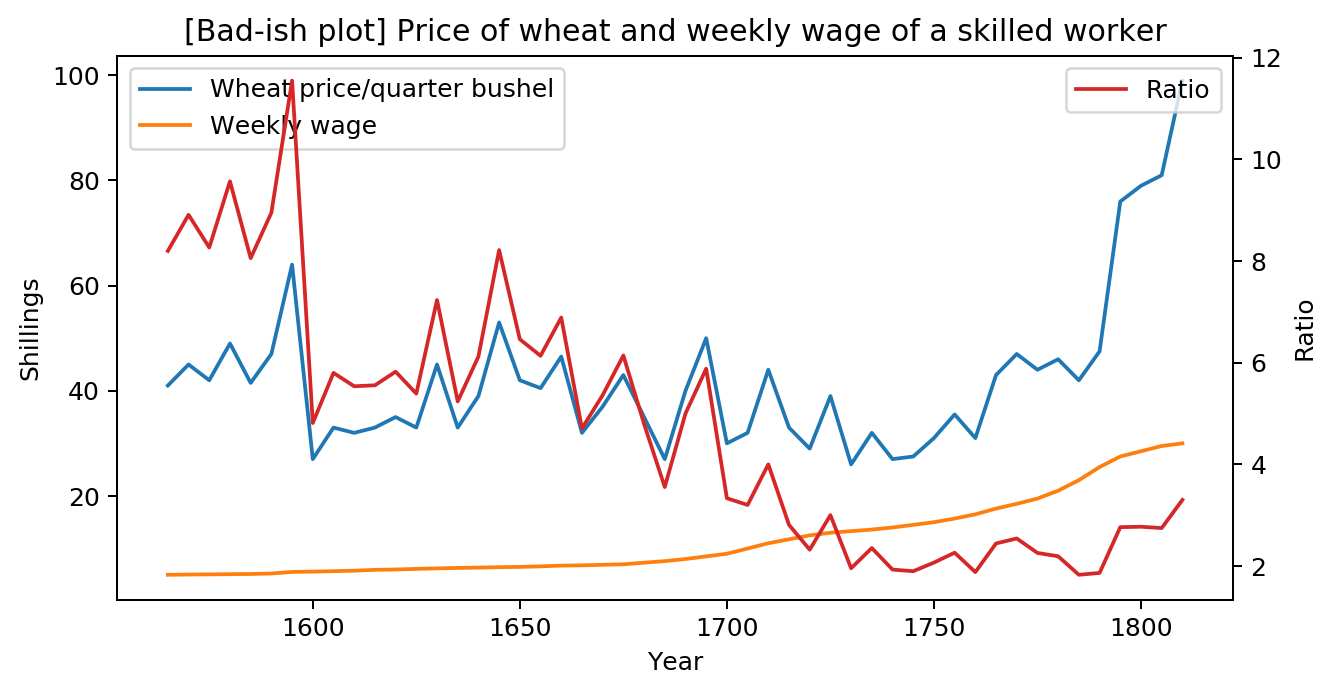

In [89]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax2 = ax.twinx()
ax2.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio", color='C3')
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")
ax2.set_ylabel("Ratio")
ax2.legend()
ax.set_title("[Bad-ish plot] Price of wheat and weekly wage of a skilled worker")


## Facets
A much better approach is to use **facets**; separate **coords** to show separate aspects of the dataset. Facets have no need to show the same scaling or range of data. However, if two facets show the same attribute (e.g. two facets showing shillings) they should if possible have the same scaling applied to make comparisons easy.

Text(0, 0.5, 'Ratio')

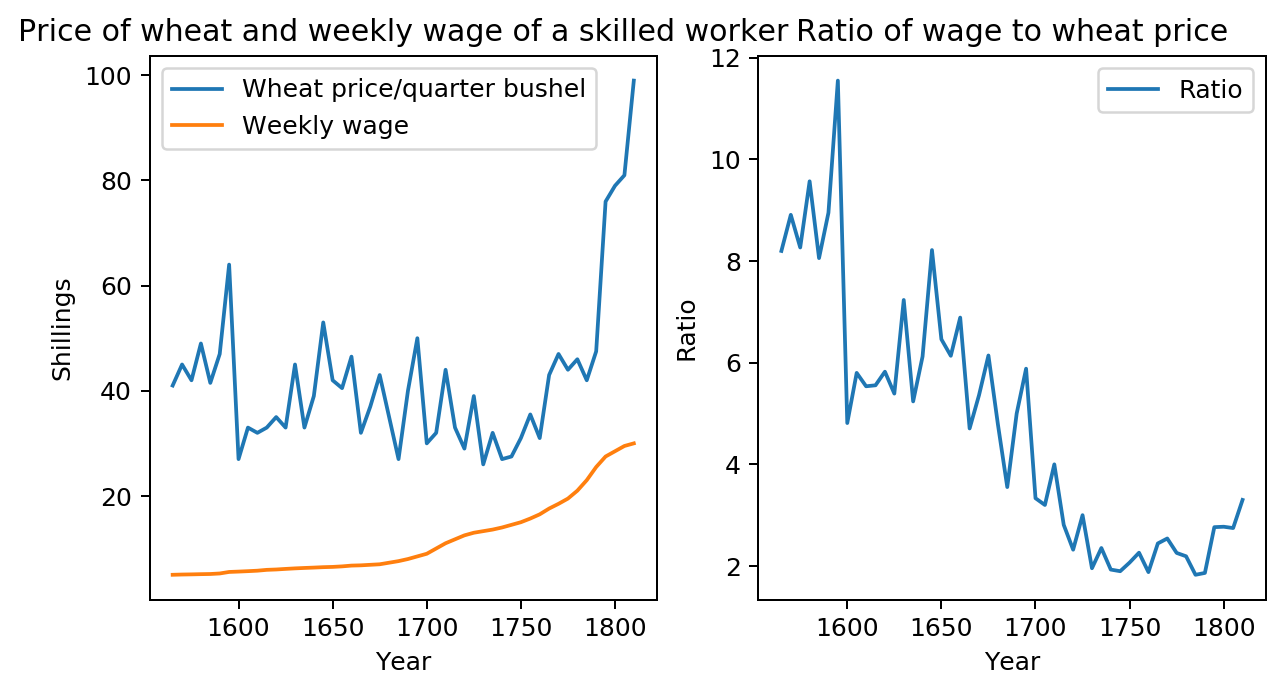

In [90]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_title("Price of wheat and weekly wage of a skilled worker")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")


ax = fig.add_subplot(1,2,2)
ax.plot(wheat[:,1], wheat[:,2]/wheat[:,3], label="Ratio")
ax.set_title("Ratio of wage to wheat price")
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Ratio")


Text(0.5, 0.98, "Bad -- don't use different scalings for the same variable in different facets!")

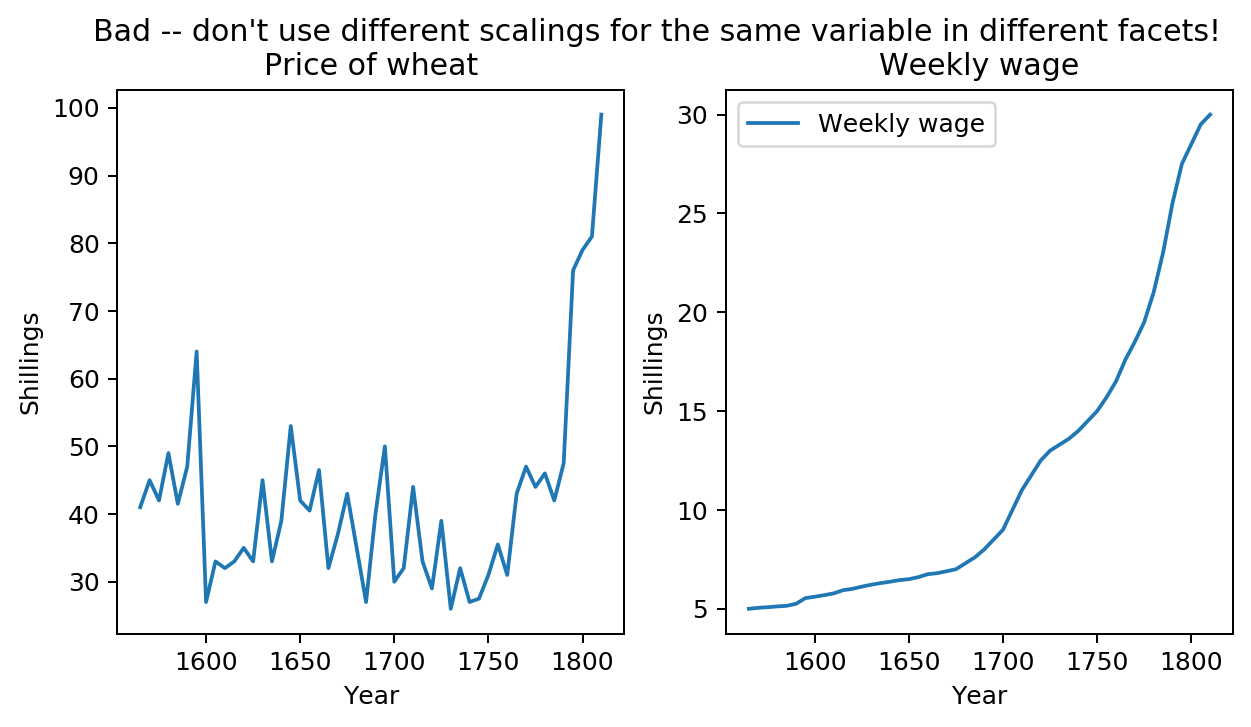

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(wheat[:,1], wheat[:,2], label="Wheat price/quarter bushel")
ax.set_title("Price of wheat")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")

ax = fig.add_subplot(1,2,2)
ax.plot(wheat[:,1], wheat[:,3], label="Weekly wage")
ax.legend()
ax.set_title("Weekly wage")
ax.set_xlabel("Year")
ax.set_ylabel("Shillings")

fig.suptitle("Bad -- don't use different scalings for the same variable in different facets!")

### Facet layout
There are many ways to lay out **facets** in a **figure**, but by far the most common is to use a regular grid. This is the notation that `matplotlib` uses in `fig.add_subplot(rows, columns, index)`. Calling this function creates a notional grid of `rows` x `columns` and then returns the axis object (representing a **coord**) to draw in the grid element indexed by `index`. Indices are counted starting from 1, running left to right then bottom to top. 

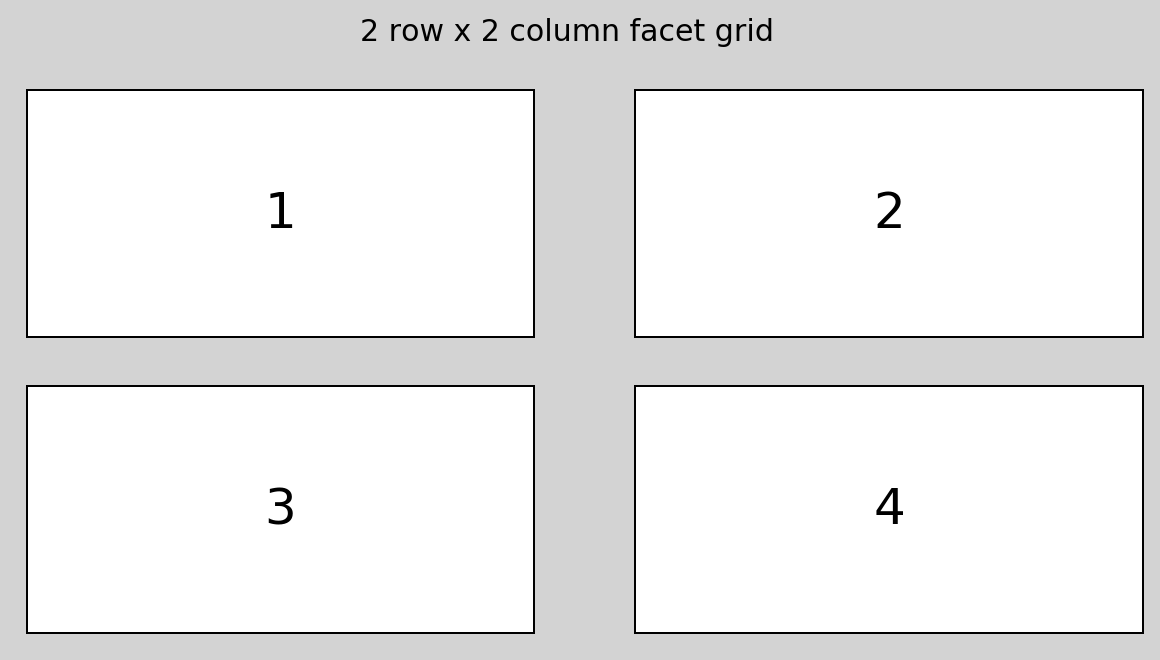

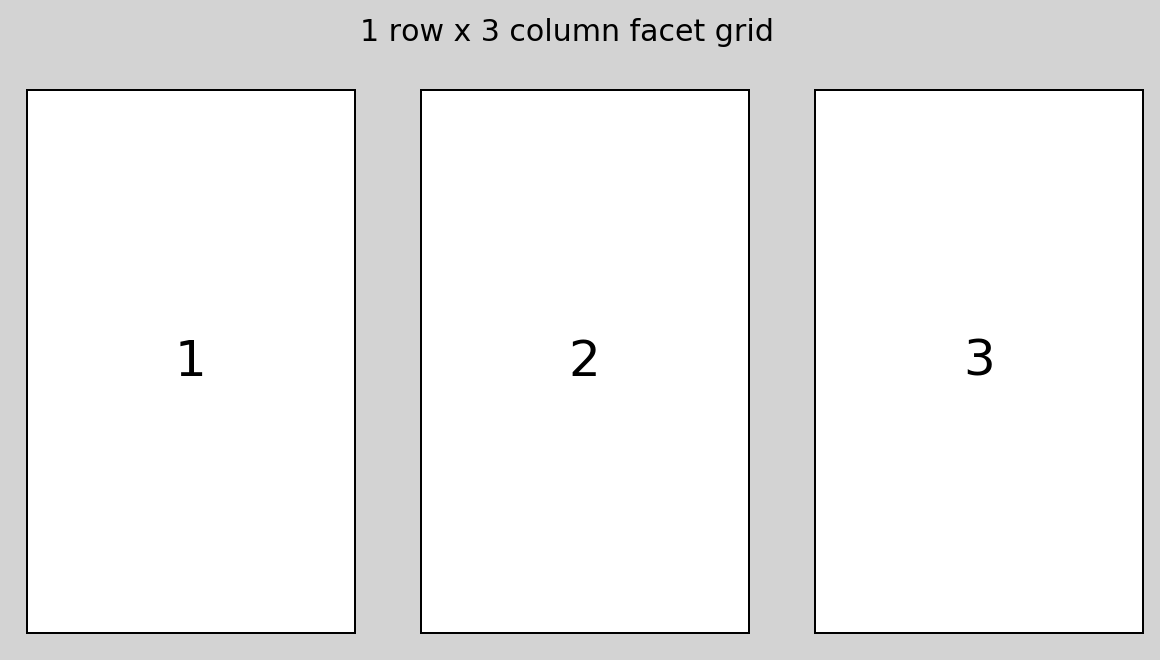

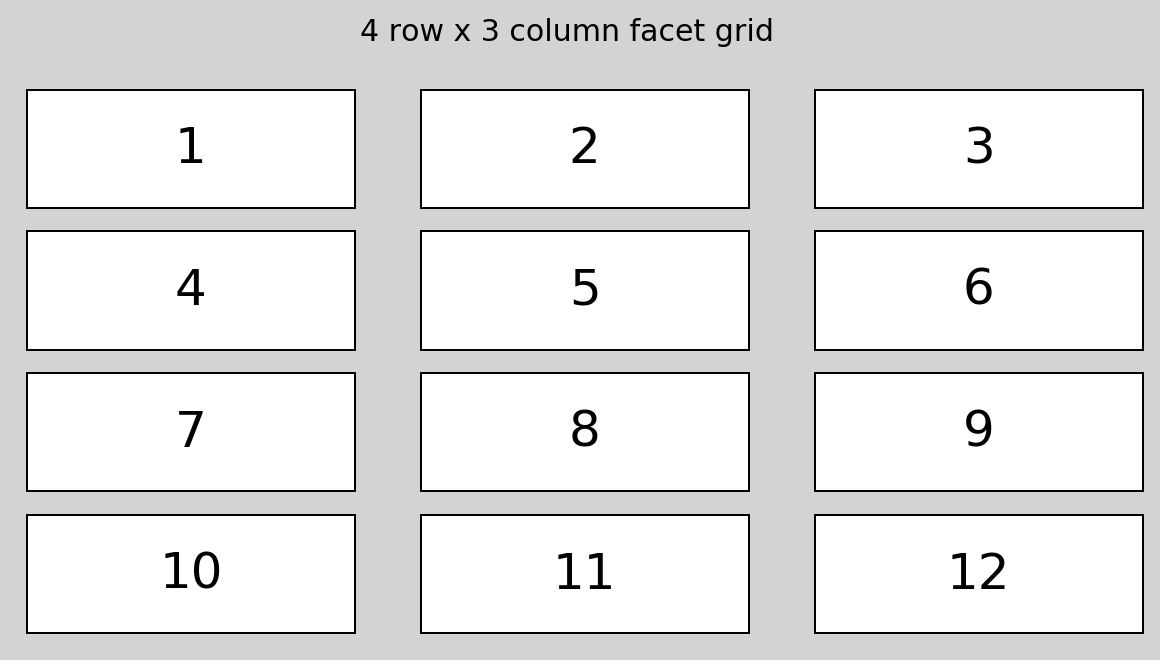

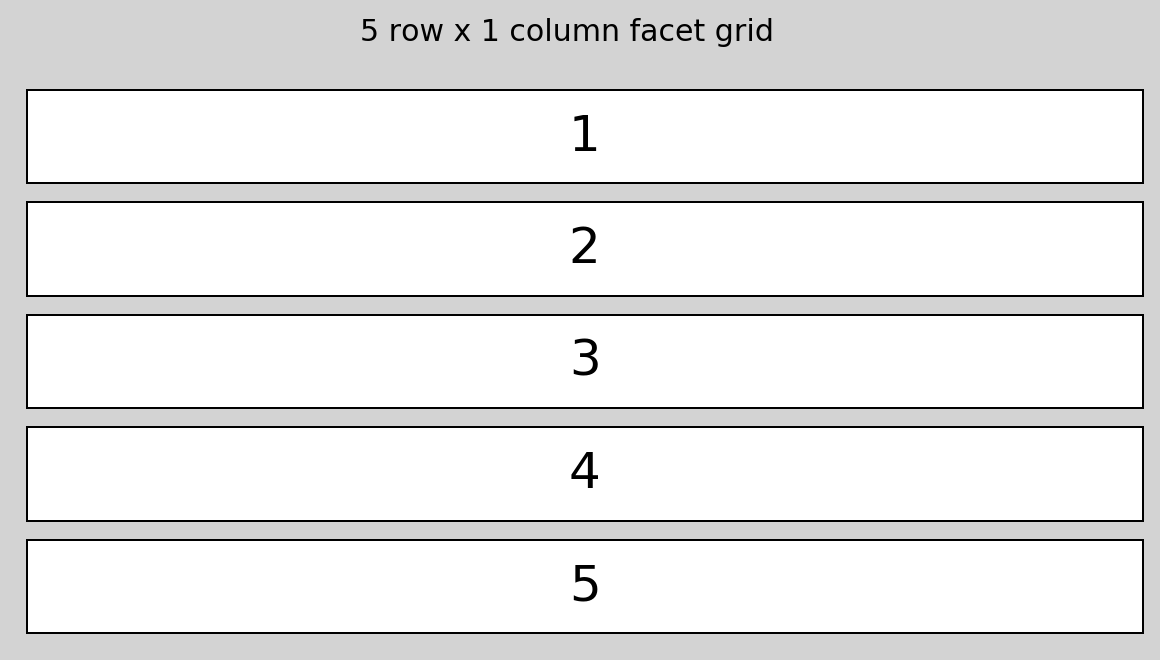

In [92]:
def subplot_test(rows, columns):
    # show the subplot layout and indexing for the given number of rows and columns
    fig = plt.figure(facecolor='lightgray')
    for i in range(rows):
        for j in range(columns):
            index = j+i*columns+1 # indexing starts at 1!
            ax = fig.add_subplot(rows, columns, index)
            # draw a centered label
            ax.text(0.5,0.5,index, fontsize=20, ha='center', va='center')            
            ax.set_xticks([]) 
            ax.set_yticks([]) 
    fig.suptitle("%d row x %d column facet grid" % (rows, columns))
            
subplot_test(2,2)
subplot_test(1,3)
subplot_test(4,3)
subplot_test(5,1)

            

# Communicating Uncertainty
It is critical that scientific visualisations be **honest**; and that means representing **uncertainty** appropriately. Data are often collected from measurements with **observation error**, so the values obtained are corrupted versions of the true values. For example, the reading on a thermometer is not the true temperature of the air.

Other situations may introduce other sources of error; for example, roundoff error in numerical simulations; or uncertainty over the right choice of a mathematical model or its parameters used to model data.

These must be represented so that readers can understand the uncertainty involved and not make judgements unsupported by evidence.

We have already seen the basic tools to represent uncertainty in plots: **stats** like the standard deviation or interquartile range can be used to show summaries of a collection of data.

### Error bars
For example, let's look at the guinea pig data again, this time as a bar chart:

In [93]:
interventions = [0.5, 1.0, 2.0]
plt.figure()
# split into groups and aggregate across groups
vcs = []
ojs = []
for i,interv in enumerate(interventions):
    vcs.append(vc_pigs[(vc_pigs[:,3]==interv),:])
    ojs.append(oj_pigs[(oj_pigs[:,3]==interv),:])
vcs = np.array(vcs)
ojs = np.array(ojs)

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

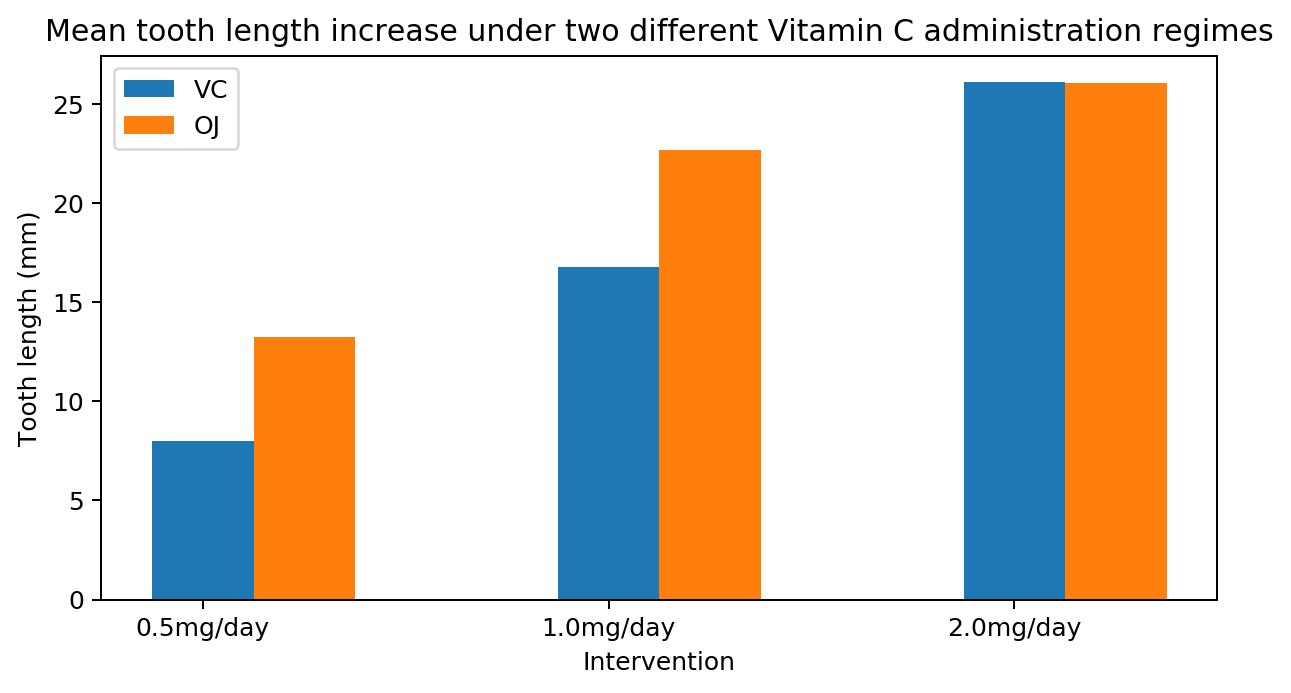

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(np.arange(len(interventions)), 
       np.mean(vcs,axis=1)[:,1], color='C0', 
       width=0.25, label="VC")

ax.bar(np.arange(len(interventions))+0.25, 
       np.mean(ojs, axis=1)[:,1], color='C1',
       width=0.25, label="OJ")

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Mean tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

This is a bad visualisation. It summarises the results using a mean, and compares them. But the data consists of a **sample** of measurements and the variation is important. Is OJ consistently better than VC? How much should we believe this? How certain can we be of these results?

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

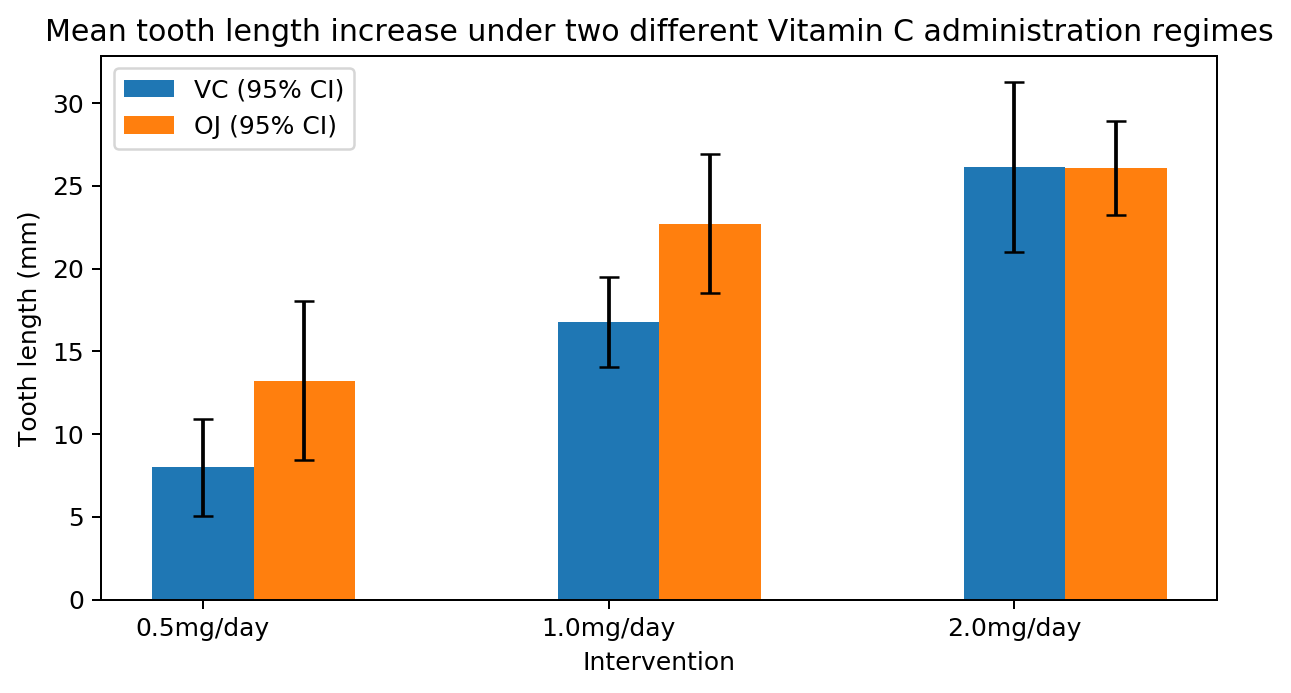

In [95]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# plot the 95% CI for these means, which is 1.96 times the standard error

def ci95(x, axis):
    return 1.96 * (np.std(x,axis=axis) / np.sqrt(len(x)))

ax.bar(np.arange(len(interventions)), np.mean(vcs,axis=1)[:,1], color='C0', 
       width=0.25, label="VC (95% CI)", yerr=ci95(vcs,axis=1)[:,1], capsize=4)
ax.bar(np.arange(len(interventions))+0.25, np.mean(ojs, axis=1)[:,1], color='C1', 
       width=0.25, label="OJ (95% CI)", yerr=ci95(ojs,axis=1)[:,1], capsize=4)

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Mean tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

#### Error bar choice
There are several choices for the error bars:
* the **standard deviation**
* the **standard error**
* **confidence intervals** (e.g. 95%)
* **nonparametric intervals** such as interquartile ranges.

We won't cover the details of these choices here.  Whichever is used, it should be made clear in the plot what the error bars mean. There is no universal standard, and it must be labeled in the plot or in the accompanying caption.

### Box plots
A very good choice for this type of plot is to use a **Box plot**, as we saw earlier. This makes clear the spread of values that were encountered in a very compact form.

No handles with labels found to put in legend.


[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

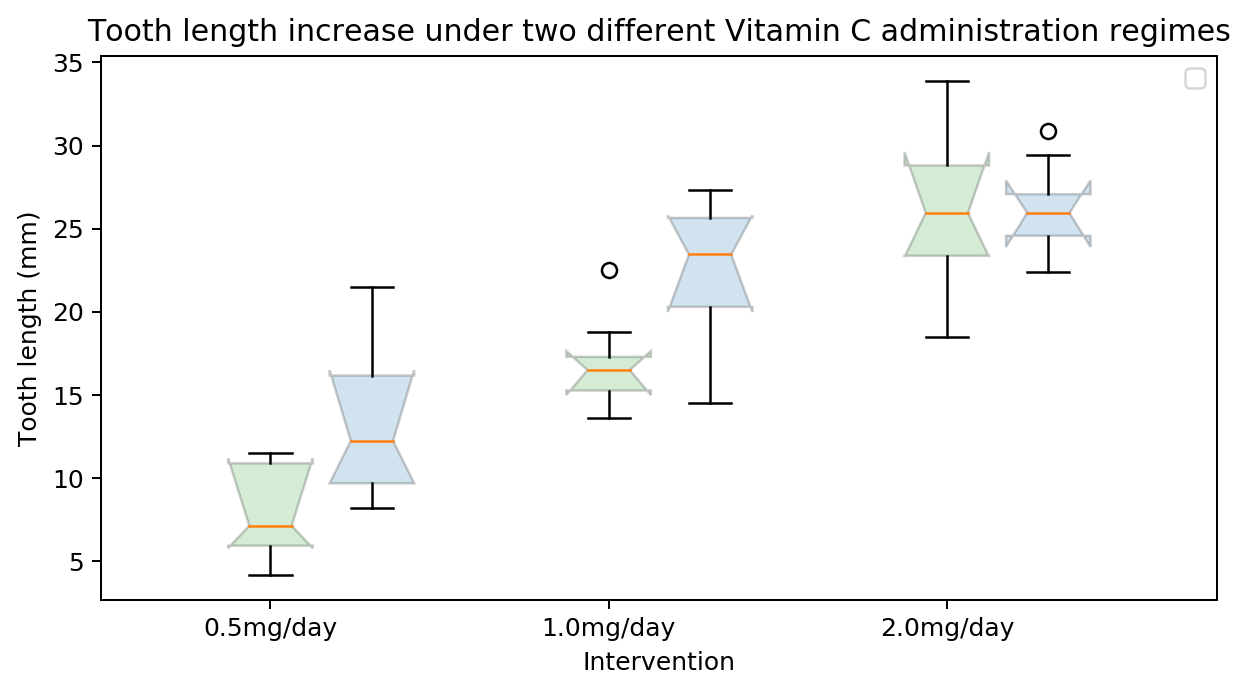

In [96]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


ax.boxplot(vcs[:,:,1].T, positions = np.arange(3), widths=0.25, notch=True, bootstrap=1000, 
           patch_artist=True, boxprops={"facecolor":'C2', "alpha":0.2})
ax.boxplot(ojs[:,:,1].T, positions = np.arange(3)+0.3, widths=0.25, 
          notch=True, bootstrap=1000,
          patch_artist=True, boxprops={"facecolor":'C0', "alpha":0.2})

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

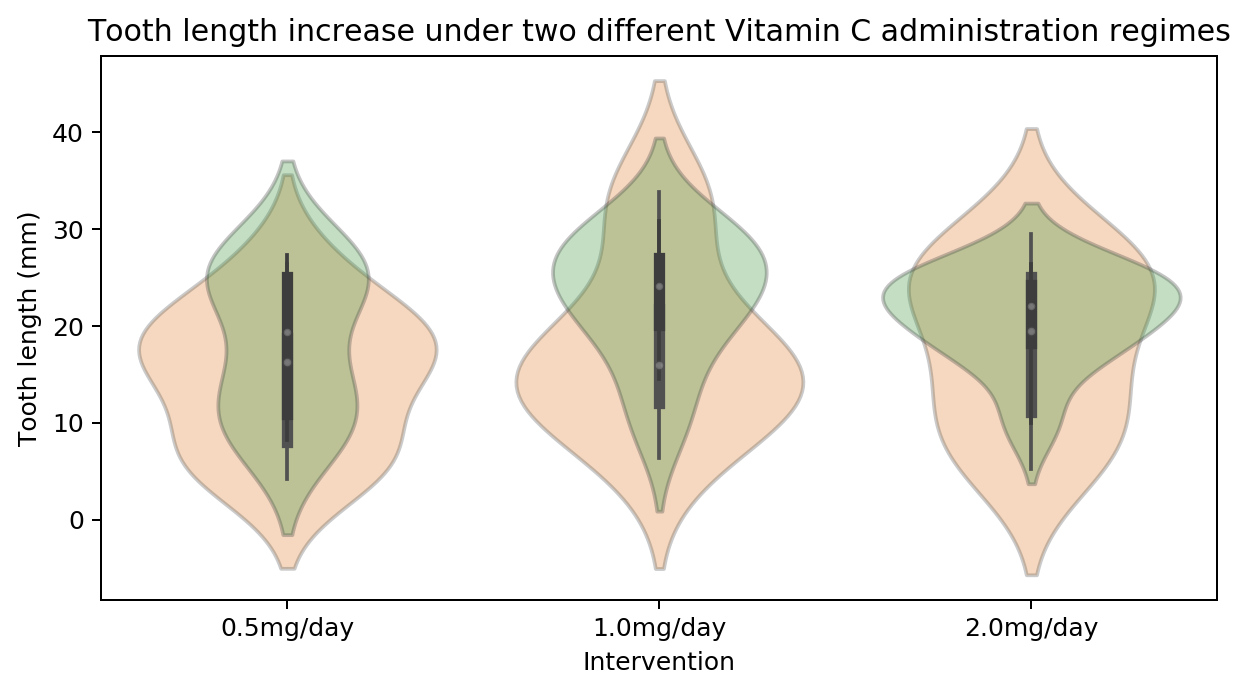

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

xs = np.tile(np.arange(3), (1,10))
sns.violinplot(xs.ravel(), vcs[:,:,1].ravel(), color='C1')
sns.violinplot(x=xs.ravel(), y=ojs[:,:,1].ravel(), color='C2')
plt.setp(ax.collections, alpha=.3)
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

## Dot plot
An alternative is simply to jitter the points on the x-axis slightly:


No handles with labels found to put in legend.


(3, 10, 4)


[Text(0, 0, '0.5mg/day'), Text(0, 0, '1.0mg/day'), Text(0, 0, '2.0mg/day')]

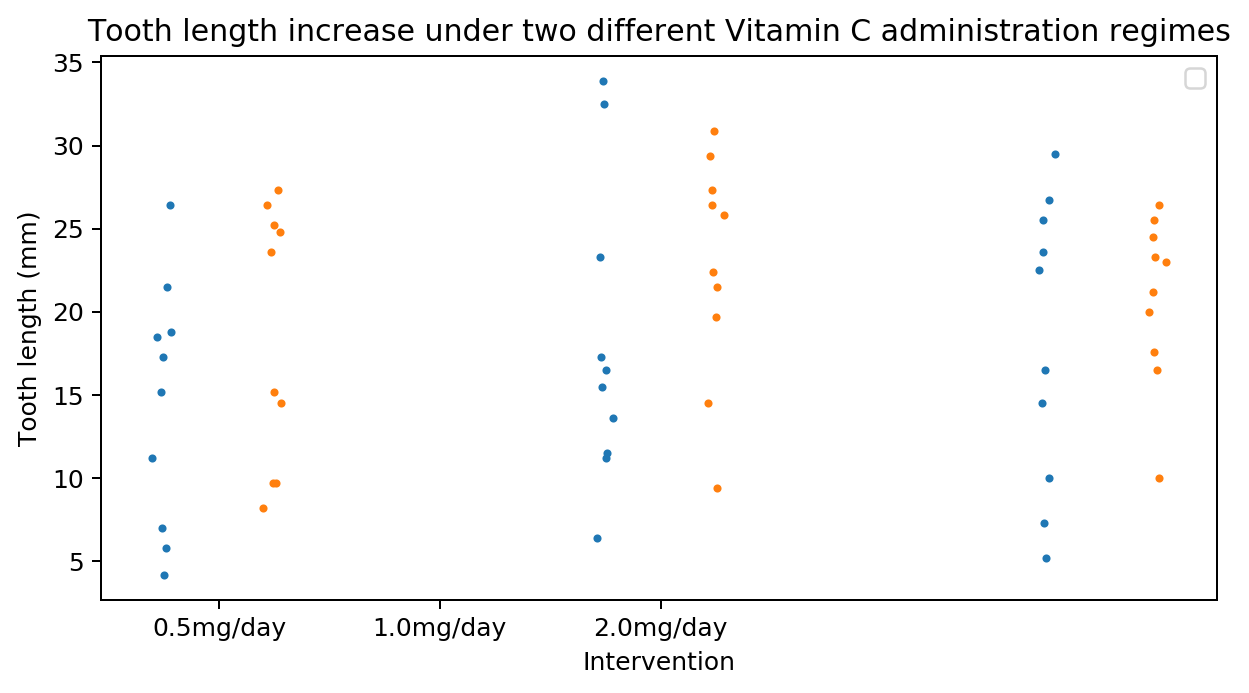

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print(vcs.shape)

xs = np.tile(np.arange(3), (1,10))
noise = np.random.normal(0,0.02,xs.shape) + xs

ax.scatter(xs-0.25+noise, vcs[:,:,1], s=5)
ax.scatter(xs+0.25+noise, ojs[:,:,1], s=5)

ax.legend()
ax.set_ylabel("Tooth length (mm)")
ax.set_xlabel("Intervention")
ax.set_xticks([0,1,2])
ax.set_title("Tooth length increase under two different Vitamin C administration regimes")
ax.set_xticklabels(["0.5mg/day","1.0mg/day","2.0mg/day"])

This is especially effective with larger amounts of data

No handles with labels found to put in legend.


(27, 4) (27, 3)


[Text(0, 0, 'Winter'),
 Text(0, 0, 'Spring'),
 Text(0, 0, 'Summer'),
 Text(0, 0, 'Autumn')]

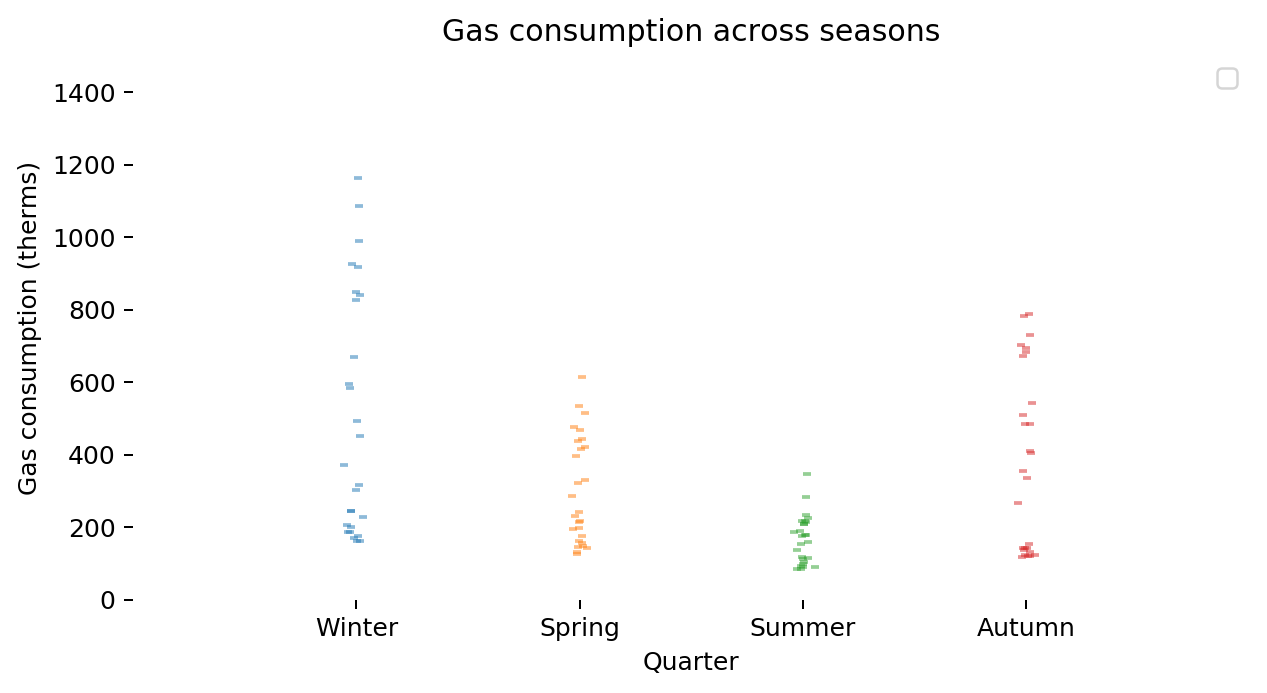

In [99]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)



xs = np.tile(np.arange(4), (len(q1), 1))
noise = np.random.normal(0,0.02,xs.shape) + xs
print(xs.shape, q1.shape)
ax.scatter(noise[:,0], q1[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,1], q2[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,2], q3[:,2], s=9, alpha=0.5, marker='_')
ax.scatter(noise[:,3], q4[:,2], s=9, alpha=0.5, marker='_')


ax.legend()
ax.set_xlim(-1,4)
ax.set_ylim(0, 1500)

ax.set_ylabel("Gas consumption (therms)")
ax.set_xlabel("Quarter")
ax.set_xticks([0,1,2,3])
ax.set_frame_on(False)

ax.set_title("Gas consumption across seasons")
ax.set_xticklabels(["Winter", "Spring", "Summer", "Autumn"])

### Areas we haven't covered

There are many other areas of visualisation which we will not be able to cover in this course.

* **Discrete structure visualisations** are focused on visualising discrete structures like graphs, networks and trees (e.g. for genome analysis). Representing connectivity between elements is an important part of such visualisations.
<img src="imgs/connect_graph.png">

*Image a discrete graph visualisation credit: screenshot from Mike Bostock's [d3.js blog](https://bl.ocks.org/mbostock/4063550)*

* **Geographical visualisations**  are focused on relaying geographical information (e.g. maps of gravitational field strength across the Earth). Correct *projection* and *interpolation* of data with geographical coordinates is key in these visualisations.
<img src="imgs/grav_map.jpg">

*Image: gravitational variations across the planet credit: [NASA](https://eoimages.gsfc.nasa.gov/images/imagerecords/3000/3666/PIA04652_lrg.jpg); public domain*

* **High dimensional visualisations** are used to represent data with many variables (e.g. a table with many rows) in a single 2D (or 3D) plot. Various mathematical techniques are used to "squeeze" data onto a space so that important relationships are preserved. Faithful representation of original structure and dealing with clutter are important issues in high-d visualisation.
<img src="imgs/tsne.png"> 

*[Image](https://flickr.com/photos/kylemcdonald/25478228166 "Parametric t-SNE on MNIST"): low dimensional embedding of digits by [Kyle McDonald](https://flickr.com/people/kylemcdonald) shared [CC BY](https://creativecommons.org/licenses/by/2.0/)*
(see [here](http://fontjoy.com/projector/) for a cool example of embedding fonts in high dimensions).

* **Volume visualisations** are intended to reveal the structure of solid 3D bodies (e.g. from computer-aided tomography; CAT scans). Representing depth and dealing with **occlusion** are key challenges in volume visualisations.
<img src="imgs/ct_scan.gif">

*Image: Volume rendering of a human skull  credit: By [Arielinson - Own work, CC BY-SA 4.0](https://commons.wikimedia.org/w/index.php?curid=50903553)*

* **Interactive visualisations** There is a whole field of research into experimental visualisations, dealing with large scale data, high dimensional data, data with complex structures, among other topics. Many of these visualisations involve interactive elements to allow users to *explore* as well as *view* them. You can see lots of these in browser at the [excellent d3.js gallery](https://github.com/d3/d3/wiki/Gallery)

## Resources

* **Ten simple rules for better figures** http://journals.plos.org/ploscompbiol/article/file?id=10.1371/journal.pcbi.1003833&type=printable (and the accomapnying video https://www.youtube.com/watch?v=p7Mj-4kASmI) (**recommended; read this and watch the video**)

* **Layered Grammar of Graphics** http://vita.had.co.nz/papers/layered-grammar.pdf (long, but detailed)

* **How to choose a chart for data** http://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

#### Beyond this course:
* **Randal Olson's blog** http://www.randalolson.com has many, many examples of good visualization, mainly using Python for graph preparation.
* **How to Lie with Statistics** Darrel Huff (short, easy to read, worth reading)
* **Grammar of Graphics** by Leland Wilkinson (ISBN-13: 978-0387245447): **the** book on a computational approach to scientific visualisation.
* **Information Visualization: Perception for Design** Colin Ware: a serious book on advanced visualisations.

##### The classic Tufte books
<img src="imgs/tufte.jpg">

* **The Visual Display of Quantitative Information** by Edward Tufte
* **Visual Explanations: Images and Quantities, Evidence and Narrative** by Edward Tufte
* **Envisioning Information** by Edward Tufte

---
    